***
# Model Deployment : Estimating Heart Failure Survival Risk Profiles From Cardiovascular, Hematologic And Metabolic Markers

***
### John Pauline Pineda <br> <br> *September 28, 2024*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Predictive Model Development](#1.6)
        * [1.6.1 Pre-Modelling Data Preparation](#1.6.1)
        * [1.6.2 Data Splitting](#1.6.2)
        * [1.6.3 Modelling Pipeline Development](#1.6.3)
            * [1.6.3.1 Cox Proportional Hazards Regression](#1.6.3)
            * [1.6.3.2 Cox Net Survival](#1.6.3)
            * [1.6.3.3 Survival Tree](#1.6.3)
            * [1.6.3.4 Random Survival Forest](#1.6.3)
            * [1.6.3.5 Gradient Boosted Survival](#1.6.3)    
        * [1.6.4 Cox Proportional Hazards Regression Model Fitting | Hyperparameter Tuning | Validation](#1.6.4)
        * [1.6.5 Cox Net Survival Model Fitting | Hyperparameter Tuning | Validation](#1.6.5)
        * [1.6.6 Survival Tree Model Fitting | Hyperparameter Tuning | Validation](#1.6.6)
        * [1.6.7 Random Survival Forest Model Fitting | Hyperparameter Tuning | Validation](#1.6.7)
        * [1.6.8 Gradient Boosted Survival Model Fitting | Hyperparameter Tuning | Validation](#1.6.9)
        * [1.6.9 Model Selection](#1.6.9)
        * [1.6.10 Model Testing](#1.6.10)
        * [1.6.11 Model Inference](#1.6.11)
    * [1.7 Predictive Model Deployment Using Streamlit and Streamlit Community Cloud](#1.7)
        * [1.7.1 Model Prediction Application Code Development](#1.7.1)
        * [1.7.2 Model Application Programming Interface Code Development](#1.7.2)
        * [1.7.3 User Interface Application Code Development](#1.7.3)
        * [1.7.4 Web Application](#1.7.4)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) relates the time until an event occurs (such as death or disease progression) to one or more predictor variables. The model is expressed through its hazard function, which represents the risk of the event happening at a particular time for an individual, given that the individual has survived up to that time. The mathematical equation is represented by the baseline hazard function (referring to the hazard for an individual when all of their covariates are zero, representing the inherent risk of the event happening over time, but is not directly estimated in the Cox model. Instead, the focus is on how the covariates influence the hazard relative to this baseline) and an exponential term that modifies the baseline hazard based on the individual's covariates (Each covariate is associated with a regression coefficient which measures the strength and direction of the effect of the covariate on the hazard. The exponential function ensures that the hazard is always positive, as hazard values can’t be negative). The proportional hazards assumption in this model means that the ratio of hazards between any two individuals is constant over time and is determined by the differences in their covariates. The Cox model doesn’t require a specific form for the baseline hazard, making it flexible, while properly accounting for censored data, which is common in survival studies.

[Accelerated Failure Time Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) are a class of survival analysis models used to analyze time-to-event data by directly modelling the survival time itself. An AFT model assumes that the effect of covariates accelerates or decelerates the life time of an event by some constant factor. The mathematical equation is represented by the logarithm of the survival time being equal to the sum of the vector of covariates multiplied to the vector of regression coefficients; and the product of the scale parameter and a random variable with a specified distribution. In an AFT model, the coefficients represent the multiplicative effect on the survival time. An exponentiated regression coefficient greater than one prolongs survival time, while a value less than one shortens it. The scale parameter determines the spread or variability of survival times. AFT models assume that the effect of covariates on survival time is multiplicative and that the survival times can be transformed to follow a specific distribution.

[Regularization Methods](http://appliedpredictivemodeling.com/), in the context of binary classification using Logistic Regression, are primarily used to prevent overfitting and improve the model's generalization to new data. Overfitting occurs when a model is too complex and learns not only the underlying pattern in the data but also the noise. This leads to poor performance on unseen data. Regularization introduces a penalty for large coefficients in the model, which helps in controlling the model complexity. In Logistic Regression, this is done by adding a regularization term to the loss function, which penalizes large values of the coefficients. This forces the model to keep the coefficients small, thereby reducing the likelihood of overfitting. Addiitonally, by penalizing the complexity of the model through the regularization term, regularization methods also help the model generalize better to unseen data. This is because the model is less likely to overfit the training data and more likely to capture the true underlying pattern.

[Shapley Additive Explanations](https://proceedings.neurips.cc/paper_files/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf) are based on Shapley values developed in the cooperative game theory. The process involves explaining a prediction by assuming that each explanatory variable for an instance is a player in a game where the prediction is the payout. The game is the prediction task for a single instance of the data set. The gain is the actual prediction for this instance minus the average prediction for all instances. The players are the explanatory variable values of the instance that collaborate to receive the gain (predict a certain value). The determined value is the average marginal contribution of an explanatory variable across all possible coalitions.

[FastAPI](https://fastapi.tiangolo.com/) is a modern, fast (high-performance) web framework for building APIs with Python. It’s designed to make it easy to create APIs quickly, while still providing strong validation and type hints that improve both code quality and performance. FastAPI allows building APIs by defining endpoints, which are essentially routes that handle HTTP requests. Routes are defined in Python functions, and FastAPI takes care of handling the request, validating input data, and generating responses. Significant features include high performance (FastAPI is one of the fastest Python frameworks, comparable to Node.js and Go, making it ideal for production use, especially in applications that require low latency, such as machine learning model inference), asynchronous support (FastAPI natively supports asynchronous programming, which is great for handling multiple requests concurrently, improving performance in scenarios with high traffic), data validation (FastAPI automatically validates the data coming into the API based on type annotations. If the user sends incorrect data (e.g., wrong data type), FastAPI generates informative error messages), and auto-generated documentation (FastAPI automatically generates API documentation in both Swagger UI and ReDoc formats. This makes testing and understanding the created API simple and fast for developers and stakeholders). In the context of machine learning model deployment, FastAPI acts as the backend API that handles requests for predictions. When a client or application (like a frontend UI) sends data to the API, FastAPI passes it to the model, retrieves the model’s prediction, and sends the result back to the client.

[Streamlit](https://streamlit.io/) is an open-source Python library that simplifies the creation and deployment of web applications for machine learning and data science projects. It allows developers and data scientists to turn Python scripts into interactive web apps quickly without requiring extensive web development knowledge. Streamlit seamlessly integrates with popular Python libraries such as Pandas, Matplotlib, Plotly, and TensorFlow, allowing one to leverage existing data processing and visualization tools within the application. Streamlit apps can be easily deployed on various platforms, including Streamlit Community Cloud, Heroku, or any cloud service that supports Python web applications.

[Streamlit Community Cloud](https://streamlit.io/cloud), formerly known as Streamlit Sharing, is a free cloud-based platform provided by Streamlit that allows users to easily deploy and share Streamlit apps online. It is particularly popular among data scientists, machine learning engineers, and developers for quickly showcasing projects, creating interactive demos, and sharing data-driven applications with a wider audience without needing to manage server infrastructure. Significant features include free hosting (Streamlit Community Cloud provides free hosting for Streamlit apps, making it accessible for users who want to share their work without incurring hosting costs), easy deployment (users can connect their GitHub repository to Streamlit Community Cloud, and the app is automatically deployed from the repository), continuous deployment (if the code in the connected GitHub repository is updated, the app is automatically redeployed with the latest changes), 
sharing capabilities (once deployed, apps can be shared with others via a simple URL, making it easy for collaborators, stakeholders, or the general public to access and interact with the app), built-in authentication (users can restrict access to their apps using GitHub-based authentication, allowing control over who can view and interact with the app), and community support (the platform is supported by a community of users and developers who share knowledge, templates, and best practices for building and deploying Streamlit apps).

## 1.1. Data Background <a class="anchor" id="1.1"></a>

An open [Heart Failure Dataset](https://paperswithcode.com/dataset/survival-analysis-of-heart-failure-patients) from [Papers With Code](https://paperswithcode.com/) (with all credits attributed to [Saurav Mishra](https://paperswithcode.com/search?q=author%3ASaurav+Mishra)) was used for the analysis as consolidated from the following primary source: 
1. Research Paper entitled **A Comparative Study for Time-to-Event Analysis and Survival Prediction for Heart Failure Condition using Machine Learning Techniques** from the [Journal of Electronics, Electromedical Engineering, and Medical Informatics](http://jeeemi.org/index.php/jeeemi/article/view/225/94)
2. Research Paper entitled **Machine Learning Can Predict Survival of Patients with Heart Failure from Serum Creatinine and Ejection Fraction Alone** from the [BMC Medical Informatics and Decision Making](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5) Journal

This study hypothesized that cardiovascular, hematologic, and metabolic markers influence heart failure survival risks between patients.

The event status and survival duration variables for the study are:
* <span style="color: #FF0000">DEATH_EVENT</span> - Status of the patient within the follow-up period (0, censored | 1, death)
* <span style="color: #FF0000">TIME</span> - Follow-up period (Days)

The predictor variables for the study are:
* <span style="color: #FF0000">AGE</span> - Patient's age (Years)
* <span style="color: #FF0000">ANAEMIA</span> - Hematologic marker for the indication of anaemia (decrease of red blood cells or hemoglobin level in the blood) (0, Absent | 1 Present)
* <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span> - Metabolic marker for the level of the CPK enzyme in the blood (mcg/L)
* <span style="color: #FF0000">DIABETES</span> - Metabolic marker for the indication of diabetes (0, Absent | 1 Present)
* <span style="color: #FF0000">EJECTION_FRACTION</span> - Cardiovascular marker for the ejection fraction (percentage of blood leaving the heart at each contraction) (%)
* <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span> - Cardiovascular marker for the indication of hypertension (0, Absent | 1 Present)
* <span style="color: #FF0000">PLATELETS</span> - Hematologic marker for the platelets in the blood (kiloplatelets/mL)
* <span style="color: #FF0000">SERUM_CREATININE</span> - Metabolic marker for the level of creatinine in the blood (mg/dL)
* <span style="color: #FF0000">SERUM_SODIUM</span> - Metabolic marker for the level of sodium in the blood (mEq/L)
* <span style="color: #FF0000">SEX</span> - Patient's sex (0, Female | 1, Male)
* <span style="color: #FF0000">SMOKING</span> - Cardiovascular marker for the indication of smoking (0, Absent | 1 Present)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **299 rows** (observations)
    * **13 columns** (variables)
        * **2/13 event | duration** (object | numeric)
             * <span style="color: #FF0000">DEATH_EVENT</span>
             * <span style="color: #FF0000">TIME</span>
        * **6/13 predictor** (numeric)
             * <span style="color: #FF0000">AGE</span>
             * <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span>
             * <span style="color: #FF0000">EJECTION_FRACTION</span>
             * <span style="color: #FF0000">PLATELETS</span>
             * <span style="color: #FF0000">SERUM_CREATININE</span>
             * <span style="color: #FF0000">SERUM_SODIUM</span>
        * **5/13 predictor** (object)
             * <span style="color: #FF0000">ANAEMIA </span>
             * <span style="color: #FF0000">DIABETES</span>
             * <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span>
             * <span style="color: #FF0000">SEX</span>
             * <span style="color: #FF0000">SMOKING</span>

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import joblib
%matplotlib inline

from operator import add,mul,truediv
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest

from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import pointbiserialr

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.utils import concordance_index
from lifelines.statistics import logrank_test

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest, GradientBoostingSurvivalAnalysis
from sksurv.tree import SurvivalTree
from sksurv.metrics import concordance_index_censored
from sksurv.nonparametric import kaplan_meier_estimator

import shap

import warnings
warnings.filterwarnings('ignore')

In [2]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"
DATASETS_PREPROCESSED_PATH = r"datasets\preprocessed"
DATASETS_FINAL_PATH = r"datasets\final\complete"
DATASETS_FINAL_TRAIN_PATH = r"datasets\final\train"
DATASETS_FINAL_TRAIN_FEATURES_PATH = r"datasets\final\train\features"
DATASETS_FINAL_TRAIN_TARGET_PATH = r"datasets\final\train\target"
DATASETS_FINAL_VALIDATION_PATH = r"datasets\final\validation"
DATASETS_FINAL_VALIDATION_FEATURES_PATH = r"datasets\final\validation\features"
DATASETS_FINAL_VALIDATION_TARGET_PATH = r"datasets\final\validation\target"
DATASETS_FINAL_TEST_PATH = r"datasets\final\test"
DATASETS_FINAL_TEST_FEATURES_PATH = r"datasets\final\test\features"
DATASETS_FINAL_TEST_TARGET_PATH = r"datasets\final\test\target"
MODELS_PATH = r"models"

In [3]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
heart_failure = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "heart_failure_clinical_records_dataset.csv"))

In [4]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(heart_failure.shape)

Dataset Dimensions: 


(299, 13)

In [5]:
##################################
# Verifying the column names
##################################
print('Column Names: ')
display(heart_failure.columns)

Column Names: 


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
##################################
# Removing trailing white spaces
# in column names
##################################
heart_failure.columns = [x.strip() for x in heart_failure.columns]

In [7]:
##################################
# Standardizing the column names
##################################
heart_failure.columns = ['AGE', 
                         'ANAEMIA', 
                         'CREATININE_PHOSPHOKINASE', 
                         'DIABETES', 
                         'EJECTION_FRACTION',
                         'HIGH_BLOOD_PRESSURE', 
                         'PLATELETS', 
                         'SERUM_CREATININE', 
                         'SERUM_SODIUM', 
                         'SEX',
                         'SMOKING', 
                         'TIME', 
                         'DEATH_EVENT']

In [8]:
##################################
# Verifying the corrected column names
##################################
print('Column Names: ')
display(heart_failure.columns)

Column Names: 


Index(['AGE', 'ANAEMIA', 'CREATININE_PHOSPHOKINASE', 'DIABETES',
       'EJECTION_FRACTION', 'HIGH_BLOOD_PRESSURE', 'PLATELETS',
       'SERUM_CREATININE', 'SERUM_SODIUM', 'SEX', 'SMOKING', 'TIME',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(heart_failure.dtypes)

Column Names and Data Types:


AGE                         float64
ANAEMIA                       int64
CREATININE_PHOSPHOKINASE      int64
DIABETES                      int64
EJECTION_FRACTION             int64
HIGH_BLOOD_PRESSURE           int64
PLATELETS                   float64
SERUM_CREATININE            float64
SERUM_SODIUM                  int64
SEX                           int64
SMOKING                       int64
TIME                          int64
DEATH_EVENT                   int64
dtype: object

In [10]:
##################################
# Taking a snapshot of the dataset
##################################
heart_failure.head()

,AGE,ANAEMIA,CREATININE_PHOSPHOKINASE,DIABETES,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,PLATELETS,SERUM_CREATININE,SERUM_SODIUM,SEX,SMOKING,TIME,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
##################################
# Setting certain integer variables
# to float values
##################################
float_columns = ['AGE',
                 'CREATININE_PHOSPHOKINASE',
                 'EJECTION_FRACTION',
                 'PLATELETS',
                 'SERUM_CREATININE',
                 'SERUM_SODIUM',
                 'TIME']
heart_failure[float_columns] = heart_failure[float_columns].astype(float)

In [12]:
##################################
# Setting certain integer variables
# to object or categorical values
##################################
int_columns = ['ANAEMIA',
               'DIABETES', 
               'HIGH_BLOOD_PRESSURE',
               'SMOKING',
               'SEX']
heart_failure[int_columns] = heart_failure[int_columns].astype(object)
heart_failure['DEATH_EVENT'] = heart_failure['DEATH_EVENT'].astype('category')

In [13]:
##################################
# Saving a copy of the original dataset
##################################
heart_failure_original = heart_failure.copy()

In [14]:
##################################
# Setting the levels of the dichotomous categorical variables
# to boolean values
##################################
heart_failure['DEATH_EVENT'] = heart_failure['DEATH_EVENT'].cat.set_categories([0, 1], ordered=True)
heart_failure['SEX'] = heart_failure['SEX'].replace({0: 'Female', 1: 'Male'})
heart_failure[int_columns] = heart_failure[int_columns].replace({0: 'Absent', 1: 'Present'})

In [15]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(heart_failure.dtypes)

Column Names and Data Types:


AGE                          float64
ANAEMIA                       object
CREATININE_PHOSPHOKINASE     float64
DIABETES                      object
EJECTION_FRACTION            float64
HIGH_BLOOD_PRESSURE           object
PLATELETS                    float64
SERUM_CREATININE             float64
SERUM_SODIUM                 float64
SEX                           object
SMOKING                       object
TIME                         float64
DEATH_EVENT                 category
dtype: object

In [16]:
##################################
# Taking a snapshot of the dataset
##################################
heart_failure.head()

,AGE,ANAEMIA,CREATININE_PHOSPHOKINASE,DIABETES,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,PLATELETS,SERUM_CREATININE,SERUM_SODIUM,SEX,SMOKING,TIME,DEATH_EVENT
0,75.0,Absent,582.0,Absent,20.0,Present,265000.00,1.9,130.0,Male,Absent,4.0,1
1,55.0,Absent,7861.0,Absent,38.0,Absent,263358.03,1.1,136.0,Male,Absent,6.0,1
2,65.0,Absent,146.0,Absent,20.0,Absent,162000.00,1.3,129.0,Male,Present,7.0,1
3,50.0,Present,111.0,Absent,20.0,Absent,210000.00,1.9,137.0,Male,Absent,7.0,1
4,65.0,Present,160.0,Present,20.0,Absent,327000.00,2.7,116.0,Female,Absent,8.0,1


In [17]:
##################################
# Performing a general exploration 
# of the numeric variables
##################################
print('Numeric Variable Summary:')
display(heart_failure.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
AGE,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
CREATININE_PHOSPHOKINASE,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
EJECTION_FRACTION,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
PLATELETS,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
SERUM_CREATININE,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
SERUM_SODIUM,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
TIME,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0


In [18]:
##################################
# Performing a general exploration 
# of the object and categorical variables
##################################
print('Categorical Variable Summary:')
display(heart_failure.describe(include=['category','object']).transpose())

Categorical Variable Summary:


,count,unique,top,freq
ANAEMIA,299,2,Absent,170
DIABETES,299,2,Absent,174
HIGH_BLOOD_PRESSURE,299,2,Absent,194
SEX,299,2,Male,194
SMOKING,299,2,Absent,203
DEATH_EVENT,299,2,0,203


## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows observed. All entries are unique.
2. No missing data noted for any variable with Null.Count>0 and Fill.Rate<1.0.
3. Low variance observed for two numeric predictors with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span>: First.Second.Mode.Ratio = 11.75
    * <span style="color: #FF0000">PLATELETS</span>: First.Second.Mode.Ratio = 6.25
4. No high skewness observed for the numeric predictor with Skewness>3 or Skewness<(-3).
   * <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span>: Skewness = +4.46
    * <span style="color: #FF0000">SERUM_CREATININE</span>: Skewness = +4.46
5. No low variance observed for the numeric and categorical predictors with Unique.Count.Ratio>10.


In [19]:
##################################
# Counting the number of duplicated rows
##################################
heart_failure.duplicated().sum()

0

In [20]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(heart_failure.dtypes)

In [21]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(heart_failure.columns)

In [22]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(heart_failure)] * len(heart_failure.columns))

In [23]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(heart_failure.isna().sum(axis=0))

In [24]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(heart_failure.count())

In [25]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [26]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,AGE,float64,299,299,0,1.0
1,ANAEMIA,object,299,299,0,1.0
2,CREATININE_PHOSPHOKINASE,float64,299,299,0,1.0
3,DIABETES,object,299,299,0,1.0
4,EJECTION_FRACTION,float64,299,299,0,1.0
5,HIGH_BLOOD_PRESSURE,object,299,299,0,1.0
6,PLATELETS,float64,299,299,0,1.0
7,SERUM_CREATININE,float64,299,299,0,1.0
8,SERUM_SODIUM,float64,299,299,0,1.0
9,SEX,object,299,299,0,1.0


In [27]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
print('Number of Columns with Missing Data:', str(len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])))

Number of Columns with Missing Data: 0


In [28]:
##################################
# Gathering the metadata labels for each observation
##################################
row_metadata_list = heart_failure.index.values.tolist()

In [29]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(heart_failure.columns)] * len(heart_failure))

In [30]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(heart_failure.isna().sum(axis=1))

In [31]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [32]:
##################################
# Exploring the rows
# for missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_metadata_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

,Row.Name,Column.Count,Null.Count,Missing.Rate
0,0,13,0,0.0
1,1,13,0,0.0
2,2,13,0,0.0
3,3,13,0,0.0
4,4,13,0,0.0
...,...,...,...,...
294,294,13,0,0.0
295,295,13,0,0.0
296,296,13,0,0.0
297,297,13,0,0.0


In [33]:
##################################
# Counting the number of rows
# with Fill.Rate < 1.00
##################################
print('Number of Rows with Missing Data:',str(len(all_row_quality_summary[all_row_quality_summary['Missing.Rate']>0])))

Number of Rows with Missing Data: 0


In [34]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
heart_failure_numeric = heart_failure.select_dtypes(include=['number','int'])

In [35]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = heart_failure_numeric.columns

In [36]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = heart_failure_numeric.min()

In [37]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = heart_failure_numeric.mean()

In [38]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = heart_failure_numeric.median()

In [39]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = heart_failure_numeric.max()

In [40]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [heart_failure[x].value_counts(dropna=True).index.tolist()[0] for x in heart_failure_numeric]

In [41]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [heart_failure[x].value_counts(dropna=True).index.tolist()[1] for x in heart_failure_numeric]

In [42]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [heart_failure_numeric[x].isin([heart_failure[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in heart_failure_numeric]

In [43]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [heart_failure_numeric[x].isin([heart_failure[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in heart_failure_numeric]

In [44]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [45]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = heart_failure_numeric.nunique(dropna=True)

In [46]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(heart_failure_numeric)] * len(heart_failure_numeric.columns))

In [47]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [48]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = heart_failure_numeric.skew()

In [49]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = heart_failure_numeric.kurtosis()

In [50]:
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
0,AGE,40.0,60.833893,60.0,95.0,60.00,50.0,33,27,1.222222,47,299,0.157191,0.423062,-0.184871
1,CREATININE_PHOSPHOKINASE,23.0,581.839465,250.0,7861.0,582.00,66.0,47,4,11.750000,208,299,0.695652,4.463110,25.149046
2,EJECTION_FRACTION,14.0,38.083612,38.0,80.0,35.00,38.0,49,40,1.225000,17,299,0.056856,0.555383,0.041409
3,PLATELETS,25100.0,263358.029264,262000.0,850000.0,263358.03,221000.0,25,4,6.250000,176,299,0.588629,1.462321,6.209255
4,SERUM_CREATININE,0.5,1.393880,1.1,9.4,1.00,1.1,50,32,1.562500,40,299,0.133779,4.455996,25.828239
5,SERUM_SODIUM,113.0,136.625418,137.0,148.0,136.00,137.0,40,38,1.052632,27,299,0.090301,-1.048136,4.119712
6,TIME,4.0,130.260870,115.0,285.0,250.00,187.0,7,7,1.000000,148,299,0.494983,0.127803,-1.212048


In [51]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])

2

In [52]:
##################################
# Identifying the numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
1,CREATININE_PHOSPHOKINASE,23.0,581.839465,250.0,7861.0,582.00,66.0,47,4,11.75,208,299,0.695652,4.463110,25.149046
3,PLATELETS,25100.0,263358.029264,262000.0,850000.0,263358.03,221000.0,25,4,6.25,176,299,0.588629,1.462321,6.209255


In [53]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [54]:
##################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

2

In [55]:
##################################
# Identifying the numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
1,CREATININE_PHOSPHOKINASE,23.0,581.839465,250.0,7861.0,582.0,66.0,47,4,11.7500,208,299,0.695652,4.463110,25.149046
4,SERUM_CREATININE,0.5,1.393880,1.1,9.4,1.0,1.1,50,32,1.5625,40,299,0.133779,4.455996,25.828239


In [56]:
##################################
# Formulating the dataset
# with object or categorical column only
##################################
heart_failure_object = heart_failure.select_dtypes(include=['object','category'])

In [57]:
##################################
# Gathering the variable names for the object or categorical column
##################################
categorical_variable_name_list = heart_failure_object.columns

In [58]:
##################################
# Gathering the first mode values for the object or categorical column
##################################
categorical_first_mode_list = [heart_failure[x].value_counts().index.tolist()[0] for x in heart_failure_object]

In [59]:
##################################
# Gathering the second mode values for each object or categorical column
##################################
categorical_second_mode_list = [heart_failure[x].value_counts().index.tolist()[1] for x in heart_failure_object]

In [60]:
##################################
# Gathering the count of first mode values for each object or categorical column
##################################
categorical_first_mode_count_list = [heart_failure_object[x].isin([heart_failure[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in heart_failure_object]

In [61]:
##################################
# Gathering the count of second mode values for each object or categorical column
##################################
categorical_second_mode_count_list = [heart_failure_object[x].isin([heart_failure[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in heart_failure_object]

In [62]:
##################################
# Gathering the first mode to second mode ratio for each object or categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)

In [63]:
##################################
# Gathering the count of unique values for each object or categorical column
##################################
categorical_unique_count_list = heart_failure_object.nunique(dropna=True)

In [64]:
##################################
# Gathering the number of observations for each object or categorical column
##################################
categorical_row_count_list = list([len(heart_failure_object)] * len(heart_failure_object.columns))

In [65]:
##################################
# Gathering the unique to count ratio for each object or categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)

In [66]:
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                 categorical_first_mode_list,
                                                 categorical_second_mode_list,
                                                 categorical_first_mode_count_list,
                                                 categorical_second_mode_count_list,
                                                 categorical_first_second_mode_ratio_list,
                                                 categorical_unique_count_list,
                                                 categorical_row_count_list,
                                                 categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,ANAEMIA,Absent,Present,170,129,1.317829,2,299,0.006689
1,DIABETES,Absent,Present,174,125,1.392000,2,299,0.006689
2,HIGH_BLOOD_PRESSURE,Absent,Present,194,105,1.847619,2,299,0.006689
3,SEX,Male,Female,194,105,1.847619,2,299,0.006689
4,SMOKING,Absent,Present,203,96,2.114583,2,299,0.006689
5,DEATH_EVENT,0,1,203,96,2.114583,2,299,0.006689


In [67]:
##################################
# Counting the number of object or categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [68]:
##################################
# Counting the number of object or categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. Data transformation and scaling is necessary to address excessive outliers and high skewness as observed on several numeric predictors:
    * <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span>: Skewness = +4.463, Outlier.Count = 29, Outlier.Ratio = 0.096
    * <span style="color: #FF0000">SERUM_CREATININE</span>: Skewness = +4.456, Outlier.Count = 29, Outlier Ratio = 0.096
    * <span style="color: #FF0000">PLATELETS</span>: Skewness = +1.462, Outlier.Count = 21, Outlier.Ratio = 0.070
2. Most variables achieved symmetrical distributions with minimal outliers after evaluating a Yeo-Johnson transformation, except for:
    * <span style="color: #FF0000">PLATELETS</span>: Skewness = +1.155, Outlier.Count = 18, Outlier.Ratio = 0.060
3. Among pairwise combinations of variables in the training subset, sufficiently high correlation values were observed but with no excessive multicollinearity noted:
    * <span style="color: #FF0000">TIME</span> and <span style="color: #FF0000">DEATH_EVENT</span>: Point.Biserial.Correlation = -0.530
    * <span style="color: #FF0000">SMOKING</span> and <span style="color: #FF0000">SEX</span>: Phi.Coefficient = +0.450
    * <span style="color: #FF0000">SERUM_CREATININE</span> and <span style="color: #FF0000">DEATH_EVENT</span>: Point.Biserial.Correlation = +0.290
    * <span style="color: #FF0000">AGE</span> and <span style="color: #FF0000">DEATH_EVENT</span>: Point.Biserial.Correlation = +0.250


In [69]:
#################################
# Creating a dataset copy 
# for correlation analysis
##################################
heart_failure_correlation = heart_failure_original.copy()
display(heart_failure_correlation)

,AGE,ANAEMIA,CREATININE_PHOSPHOKINASE,DIABETES,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,PLATELETS,SERUM_CREATININE,SERUM_SODIUM,SEX,SMOKING,TIME,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,4.0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,6.0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,7.0,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,7.0,1
4,65.0,1,160.0,1,20.0,0,327000.00,2.7,116.0,0,0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.0,1,38.0,1,155000.00,1.1,143.0,1,1,270.0,0
295,55.0,0,1820.0,0,38.0,0,270000.00,1.2,139.0,0,0,271.0,0
296,45.0,0,2060.0,1,60.0,0,742000.00,0.8,138.0,0,0,278.0,0
297,45.0,0,2413.0,0,38.0,0,140000.00,1.4,140.0,1,1,280.0,0


In [70]:
##################################
# Initializing the correlation matrix
##################################
heart_failure_correlation_matrix = pd.DataFrame(np.zeros((len(heart_failure_correlation.columns), len(heart_failure_correlation.columns))),
                                              columns=heart_failure_correlation.columns,
                                              index=heart_failure_correlation.columns)

In [71]:
##################################
# Calculating different types
# of correlation coefficients
# per variable type
##################################
for i in range(len(heart_failure_correlation.columns)):
    for j in range(i, len(heart_failure_correlation.columns)):
        if i == j:
            heart_failure_correlation_matrix.iloc[i, j] = 1.0
        else:
            if heart_failure_correlation.dtypes.iloc[i] == 'float64' and heart_failure_correlation.dtypes.iloc[j] == 'float64':
                # Pearson correlation for two continuous variables
                corr = heart_failure_correlation.iloc[:, i].corr(heart_failure_correlation.iloc[:, j])
            elif heart_failure_correlation.dtypes.iloc[i] == 'int64' or heart_failure_correlation.dtypes.iloc[j] == 'int64':
                # Point-biserial correlation for one continuous and one binary variable
                continuous_var = heart_failure_correlation.iloc[:, i] if heart_failure_correlation.dtypes.iloc[i] == 'int64' else heart_failure_correlation.iloc[:, j]
                binary_var = heart_failure_correlation.iloc[:, j] if heart_failure_correlation.dtypes.iloc[j] == 'int64' else heart_failure_correlation.iloc[:, i]
                corr, _ = pointbiserialr(continuous_var, binary_var)
            else:
                # Phi coefficient for two binary variables
                corr = heart_failure_correlation.iloc[:, i].corr(heart_failure_correlation.iloc[:, j])
            heart_failure_correlation_matrix.iloc[i, j] = corr
            heart_failure_correlation_matrix.iloc[j, i] = corr

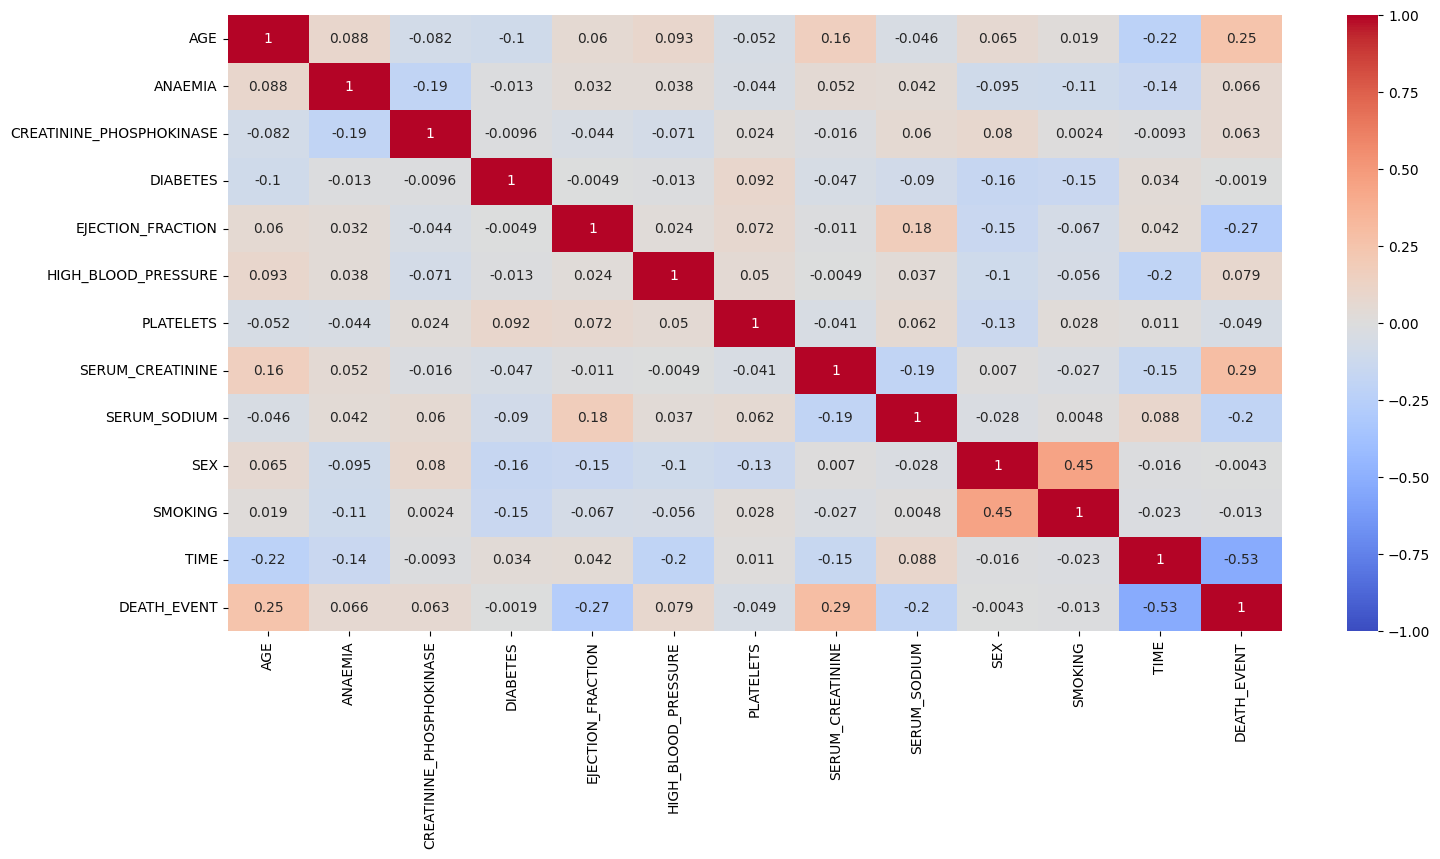

In [72]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric and categorical columns
##################################
plt.figure(figsize=(17, 8))
sns.heatmap(heart_failure_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [73]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
heart_failure_numeric = heart_failure.select_dtypes(include=['number','int'])

In [74]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = heart_failure_numeric.columns

In [75]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = heart_failure_numeric.skew()

In [76]:
##################################
# Computing the interquartile range
# for all columns
##################################
heart_failure_numeric_q1 = heart_failure_numeric.quantile(0.25)
heart_failure_numeric_q3 = heart_failure_numeric.quantile(0.75)
heart_failure_numeric_iqr = heart_failure_numeric_q3 - heart_failure_numeric_q1

In [77]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((heart_failure_numeric < (heart_failure_numeric_q1 - 1.5 * heart_failure_numeric_iqr)) | (heart_failure_numeric > (heart_failure_numeric_q3 + 1.5 * heart_failure_numeric_iqr))).sum()

In [78]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(heart_failure_numeric)] * len(heart_failure_numeric.columns))

In [79]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [80]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
0,AGE,0.423062,0,299,0.000000
1,CREATININE_PHOSPHOKINASE,4.463110,29,299,0.096990
2,EJECTION_FRACTION,0.555383,2,299,0.006689
3,PLATELETS,1.462321,21,299,0.070234
4,SERUM_CREATININE,4.455996,29,299,0.096990
5,SERUM_SODIUM,-1.048136,4,299,0.013378
6,TIME,0.127803,0,299,0.000000


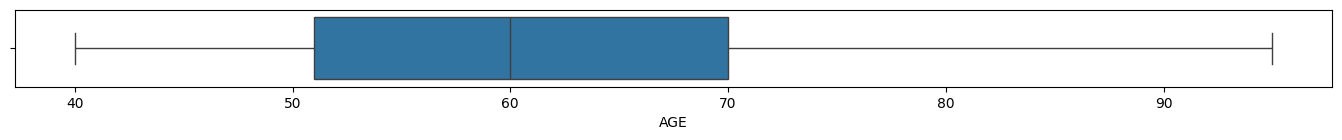

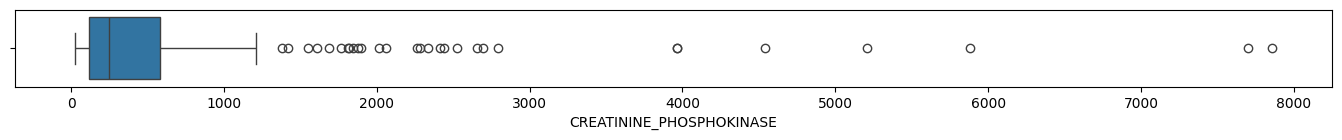

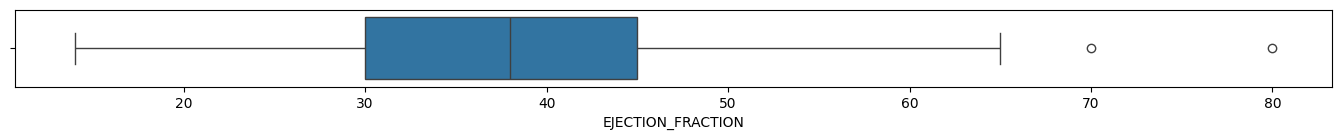

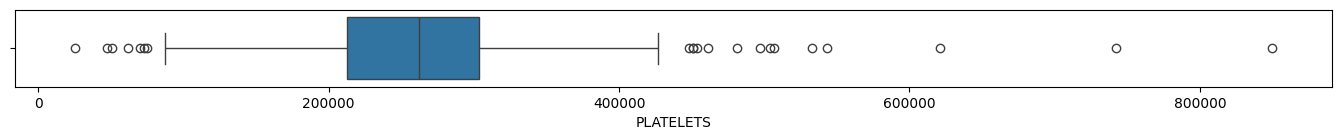

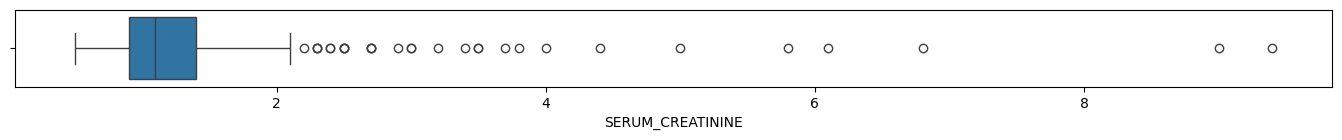

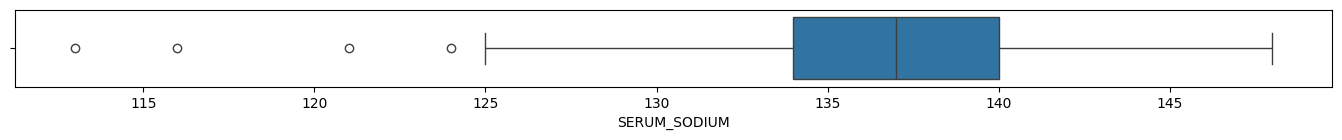

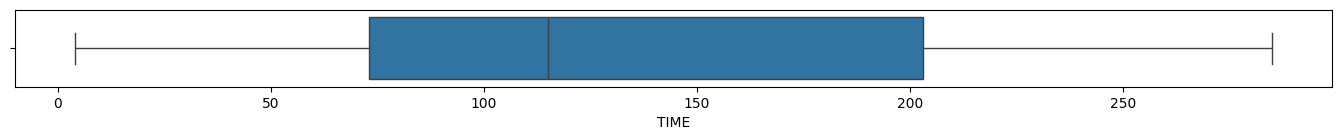

In [81]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in heart_failure_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=heart_failure_numeric, x=column)

In [82]:
##################################
# Formulating the dataset
# with numeric predictor columns only
##################################
heart_failure_numeric_predictor = heart_failure_numeric.drop('TIME', axis=1)

In [83]:
##################################
# Formulating the dataset
# with categorical or object columns only
##################################
heart_failure_categorical = heart_failure_original.select_dtypes(include=['category','object'])

In [84]:
##################################
# Evaluating a Yeo-Johnson Transformation
# to address the distributional
# shape of the variables
##################################
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson',
                                          standardize=True)
heart_failure_numeric_predictor_transformed_array = yeo_johnson_transformer.fit_transform(heart_failure_numeric_predictor)

In [85]:
##################################
# Formulating a new dataset object
# for the transformed data
##################################
heart_failure_numeric_predictor_transformed = pd.DataFrame(heart_failure_numeric_predictor_transformed_array,
                                                           columns=heart_failure_numeric_predictor.columns)

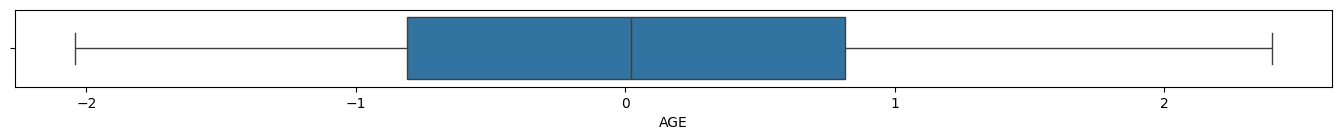

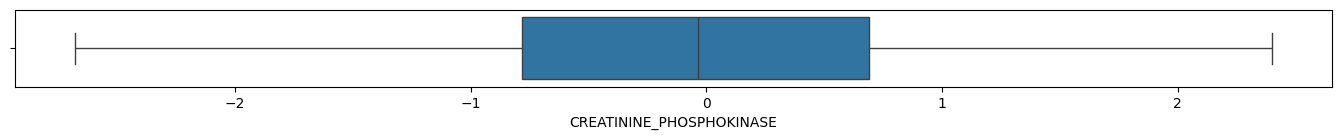

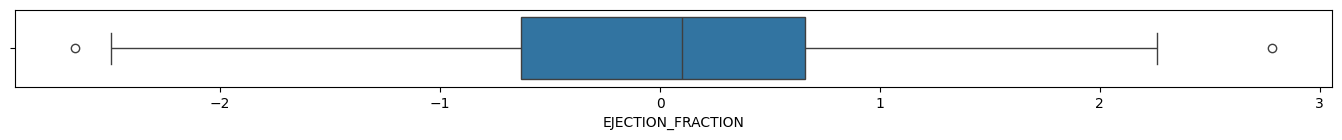

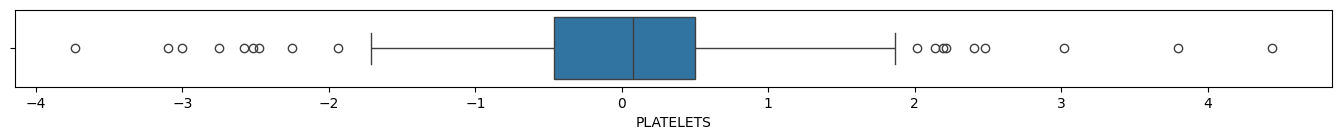

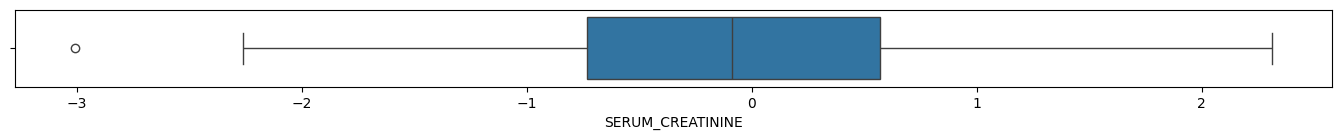

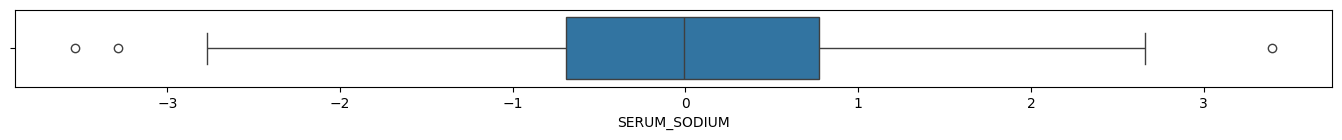

In [86]:
##################################
# Formulating the individual boxplots
# for all transformed numeric predictor columns
##################################
for column in heart_failure_numeric_predictor_transformed:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=heart_failure_numeric_predictor_transformed, x=column)

In [87]:
##################################
# Formulating the outlier summary
# for all numeric predictor columns
##################################
numeric_variable_name_list = heart_failure_numeric_predictor_transformed.columns
numeric_skewness_list = heart_failure_numeric_predictor_transformed.skew()
heart_failure_numeric_predictor_transformed_q1 = heart_failure_numeric_predictor_transformed.quantile(0.25)
heart_failure_numeric_predictor_transformed_q3 = heart_failure_numeric_predictor_transformed.quantile(0.75)
heart_failure_numeric_predictor_transformed_iqr = heart_failure_numeric_predictor_transformed_q3 - heart_failure_numeric_predictor_transformed_q1
numeric_outlier_count_list = ((heart_failure_numeric_predictor_transformed < (heart_failure_numeric_predictor_transformed_q1 - 1.5 * heart_failure_numeric_predictor_transformed_iqr)) | (heart_failure_numeric_predictor_transformed > (heart_failure_numeric_predictor_transformed_q3 + 1.5 * heart_failure_numeric_predictor_transformed_iqr))).sum()
numeric_row_count_list = list([len(heart_failure_numeric_predictor_transformed)] * len(heart_failure_numeric_predictor_transformed.columns))
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
0,AGE,-0.000746,0,299,0.000000
1,CREATININE_PHOSPHOKINASE,0.044225,0,299,0.000000
2,EJECTION_FRACTION,-0.006637,2,299,0.006689
3,PLATELETS,0.155360,18,299,0.060201
4,SERUM_CREATININE,0.150380,1,299,0.003344
5,SERUM_SODIUM,0.082305,3,299,0.010033


## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. In the estimated baseline survival plot, the survival probability did not reach 50% over the observed time period. The last observed survival probability was 58% at <span style="color: #FF0000">TIME=258</span>. Therefore, the median survival time could not be determined from the current data. This suggests that the majority of individuals in the cohort maintained a survival probability above 50% throughout the follow-up period. .
2. Bivariate analysis identified individual predictors with potential association to the event status based on visual inspection.
    * Higher values for the following numeric predictors are associated with <span style="color: #FF0000">DEATH_EVENT=True</span>: 
        * <span style="color: #FF0000">AGE</span>
        * <span style="color: #FF0000">SERUM_CREATININE</span>
    * Lower values for the following numeric predictors are associated with <span style="color: #FF0000">DEATH_EVENT=True</span>: 
        * <span style="color: #FF0000">EJECTION_FRACTION</span>
        * <span style="color: #FF0000">SERUM_SODIUM</span>    
    * Higher counts for the following object predictors are associated with better differentiation between <span style="color: #FF0000">DEATH_EVENT=True</span> and <span style="color: #FF0000">DEATH_EVENT=False</span>:  
        * <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span>
2. Bivariate analysis identified individual predictors with potential association to the survival time based on visual inspection.
    * No numeric predictors were associated with <span style="color: #FF0000">TIME</span>: 
    * Levels for the following object predictors are associated with differences in <span style="color: #FF0000">TIME</span> between <span style="color: #FF0000">DEATH_EVENT=True</span> and <span style="color: #FF0000">DEATH_EVENT=False</span>:  
        * <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span>


In [88]:
##################################
# Formulating a complete dataframe
##################################
heart_failure_EDA = pd.concat([heart_failure_numeric_predictor_transformed,
                               heart_failure.select_dtypes(include=['category','object']),
                               heart_failure_numeric['TIME']],
                              axis=1)
heart_failure_EDA['DEATH_EVENT'] = heart_failure_EDA['DEATH_EVENT'].replace({0: False, 1: True})
heart_failure_EDA.head()

,AGE,CREATININE_PHOSPHOKINASE,EJECTION_FRACTION,PLATELETS,SERUM_CREATININE,SERUM_SODIUM,ANAEMIA,DIABETES,HIGH_BLOOD_PRESSURE,SEX,SMOKING,DEATH_EVENT,TIME
0,1.173233,0.691615,-1.773346,0.110528,1.212227,-1.468519,Absent,Absent,Present,Male,Absent,True,4.0
1,-0.423454,2.401701,0.100914,0.093441,-0.087641,-0.244181,Absent,Absent,Absent,Male,Absent,True,6.0
2,0.434332,-0.553424,-1.773346,-1.093142,0.381817,-1.642143,Absent,Absent,Absent,Male,Present,True,7.0
3,-0.910411,-0.833885,-1.773346,-0.494713,1.212227,-0.006503,Present,Absent,Absent,Male,Absent,True,7.0
4,0.434332,-0.462335,-1.773346,0.720277,1.715066,-3.285073,Present,Present,Absent,Female,Absent,True,8.0


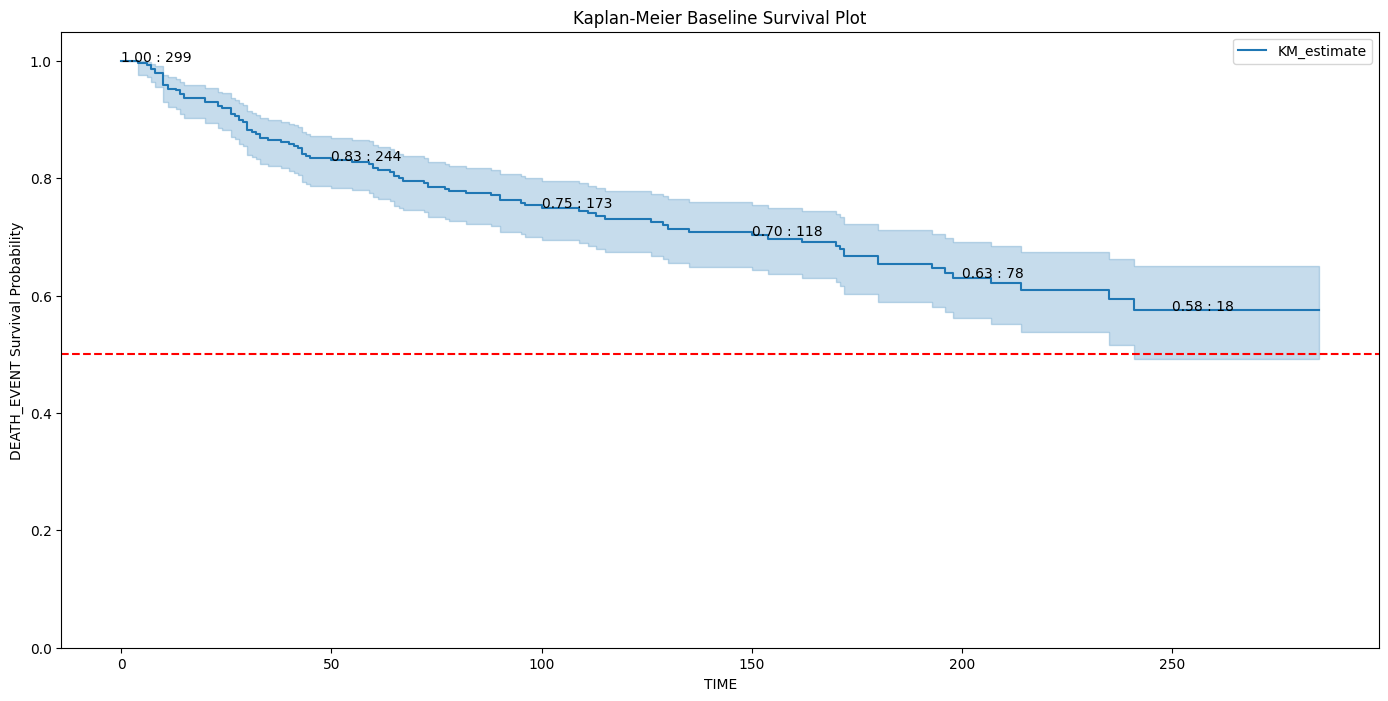

In [89]:
##################################
# Plotting the baseline survival curve
# and computing the survival rates
##################################
kmf = KaplanMeierFitter()
kmf.fit(durations=heart_failure_EDA['TIME'], event_observed=heart_failure_EDA['DEATH_EVENT'])
plt.figure(figsize=(17, 8))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Baseline Survival Plot')
plt.ylim(0, 1.05)
plt.xlabel('TIME')
plt.ylabel('DEATH_EVENT Survival Probability')

##################################
# Determing the at-risk numbers
##################################
at_risk_counts = kmf.event_table.at_risk
survival_probabilities = kmf.survival_function_.values.flatten()
time_points = kmf.survival_function_.index
for time, prob, at_risk in zip(time_points, survival_probabilities, at_risk_counts):
    if time % 50 == 0: 
        plt.text(time, prob, f'{prob:.2f} : {at_risk}', ha='left', fontsize=10)
median_survival_time = kmf.median_survival_time_
plt.axvline(x=median_survival_time, color='r', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

In [90]:
##################################
# Computing the median survival time
##################################
median_survival_time = kmf.median_survival_time_
print(f'Median Survival Time: {median_survival_time}')

Median Survival Time: inf


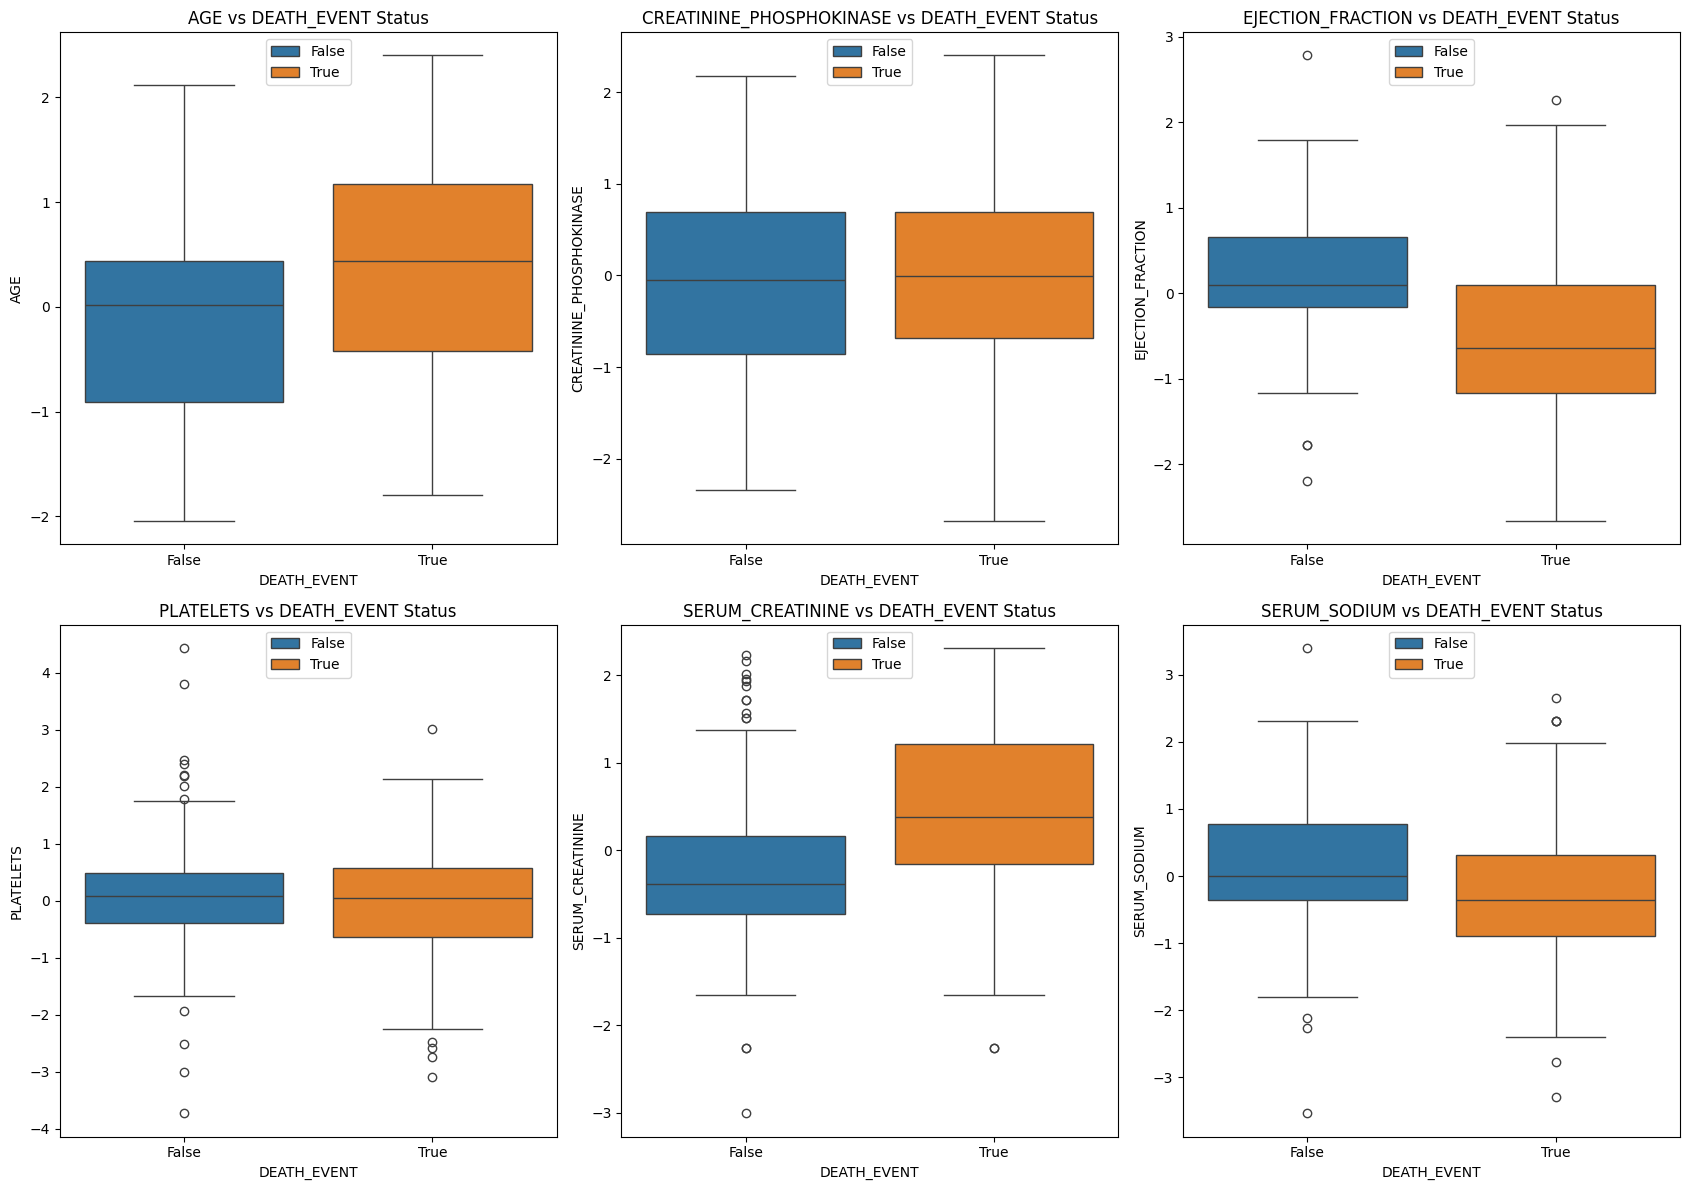

In [91]:
##################################
# Exploring the relationships between
# the numeric predictors and event status
##################################
plt.figure(figsize=(17, 12))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.boxplot(x='DEATH_EVENT', y=heart_failure_numeric_predictor.columns[i-1], hue='DEATH_EVENT', data=heart_failure_EDA)
    plt.title(f'{heart_failure_numeric_predictor.columns[i-1]} vs DEATH_EVENT Status')
    plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

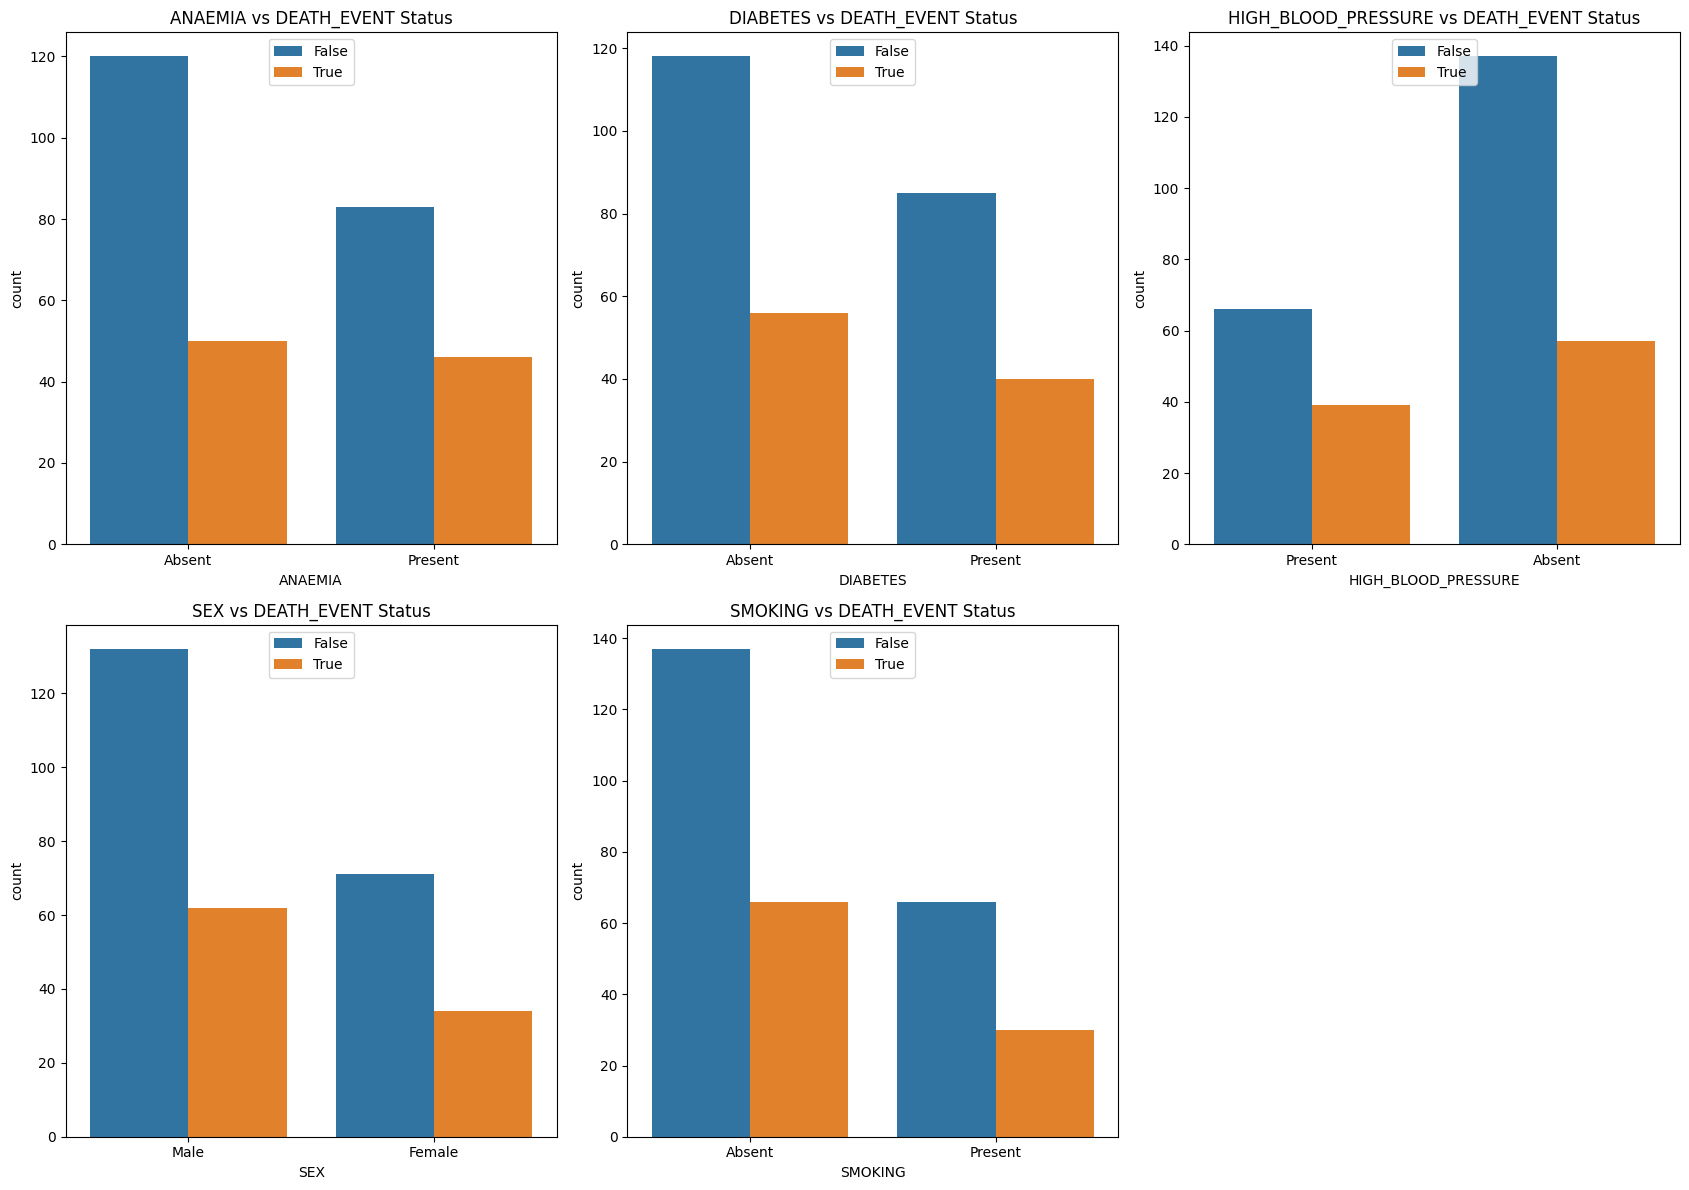

In [92]:
##################################
# Exploring the relationships between
# the numeric predictors and event status
##################################
heart_failure_categorical_predictor = heart_failure_categorical.drop('DEATH_EVENT',axis=1)
heart_failure_EDA[int_columns] = heart_failure_EDA[int_columns].astype(object)
plt.figure(figsize=(17, 12))
for i in range(1, 6):
    plt.subplot(2, 3, i)
    sns.countplot(hue='DEATH_EVENT', x=heart_failure_categorical_predictor.columns[i-1], data=heart_failure_EDA)
    plt.title(f'{heart_failure_categorical_predictor.columns[i-1]} vs DEATH_EVENT Status')
    plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

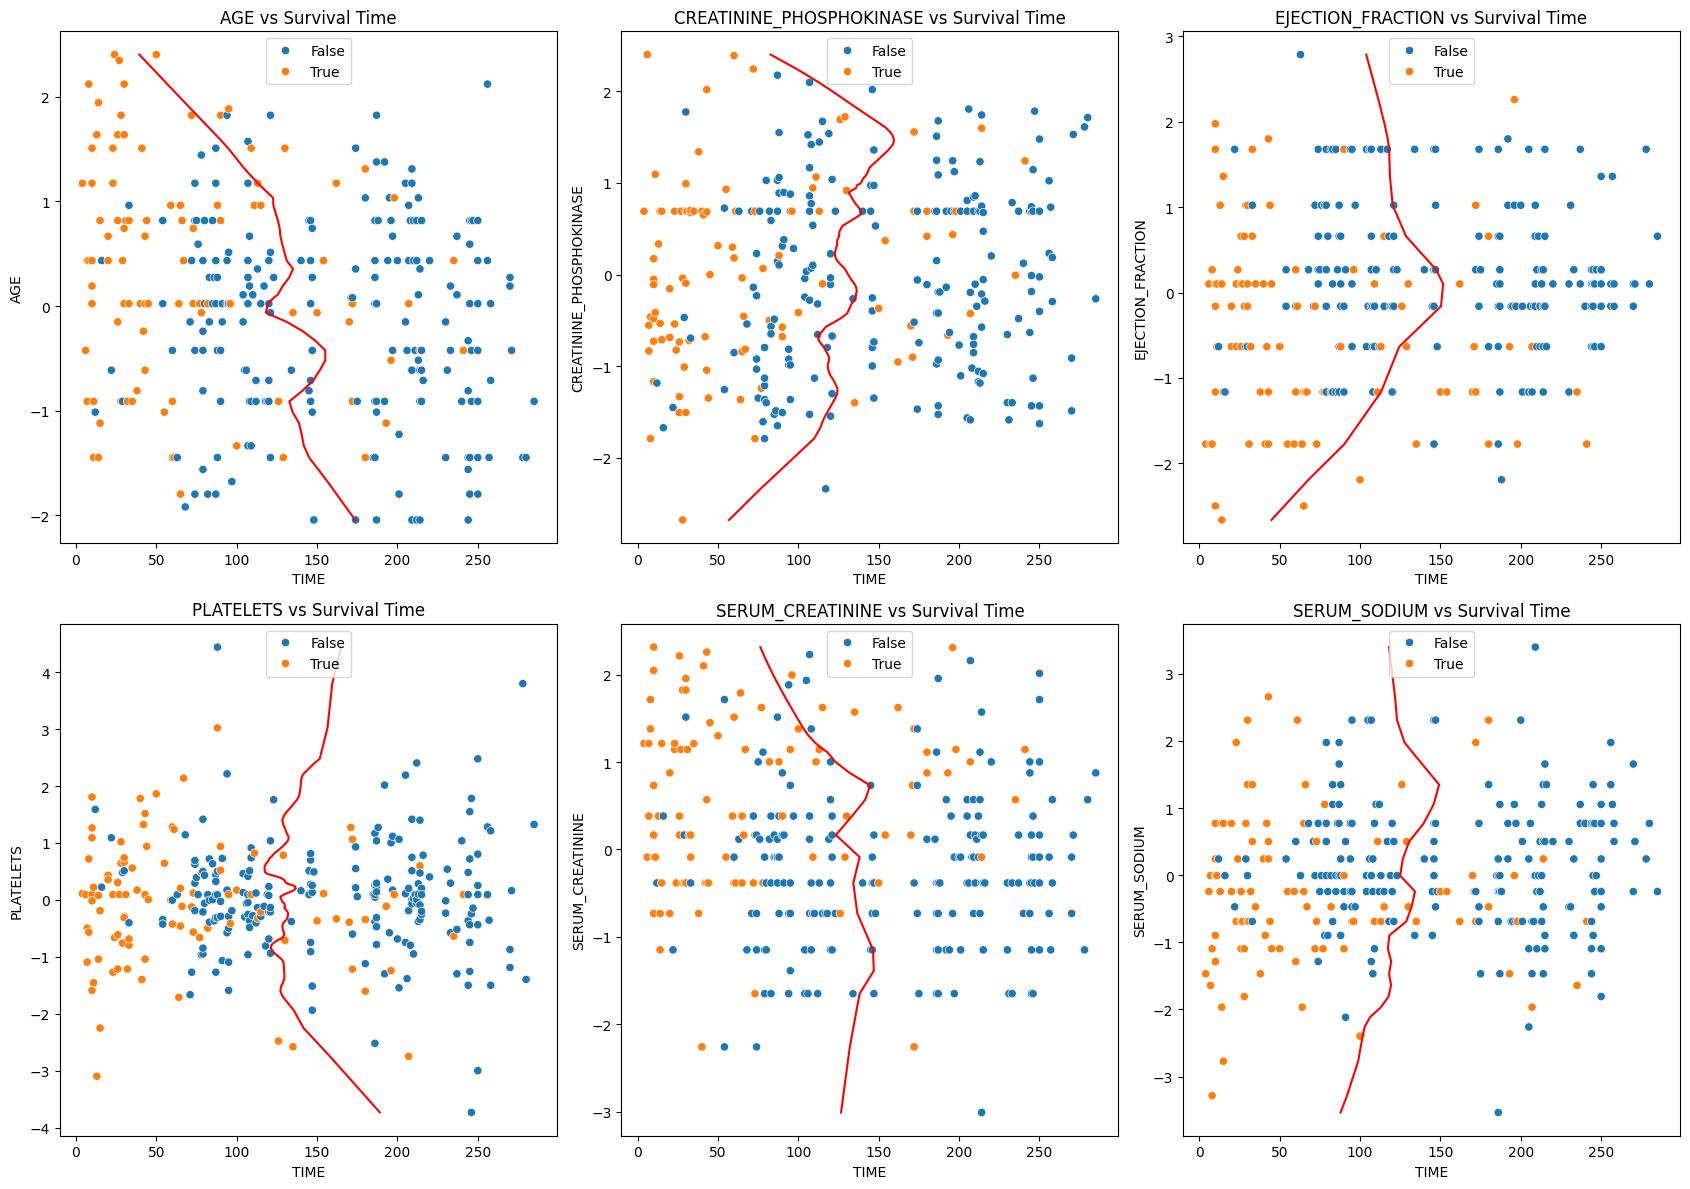

In [93]:
##################################
# Exploring the relationships between
# the numeric predictors and survival time
##################################
plt.figure(figsize=(17, 12))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.scatterplot(x='TIME', y=heart_failure_numeric_predictor.columns[i-1], hue='DEATH_EVENT', data=heart_failure_EDA)
    loess_smoothed = lowess(heart_failure_EDA['TIME'], heart_failure_EDA[heart_failure_numeric_predictor.columns[i-1]], frac=0.3)
    plt.plot(loess_smoothed[:, 1], loess_smoothed[:, 0], color='red')
    plt.title(f'{heart_failure_numeric_predictor.columns[i-1]} vs Survival Time')
    plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

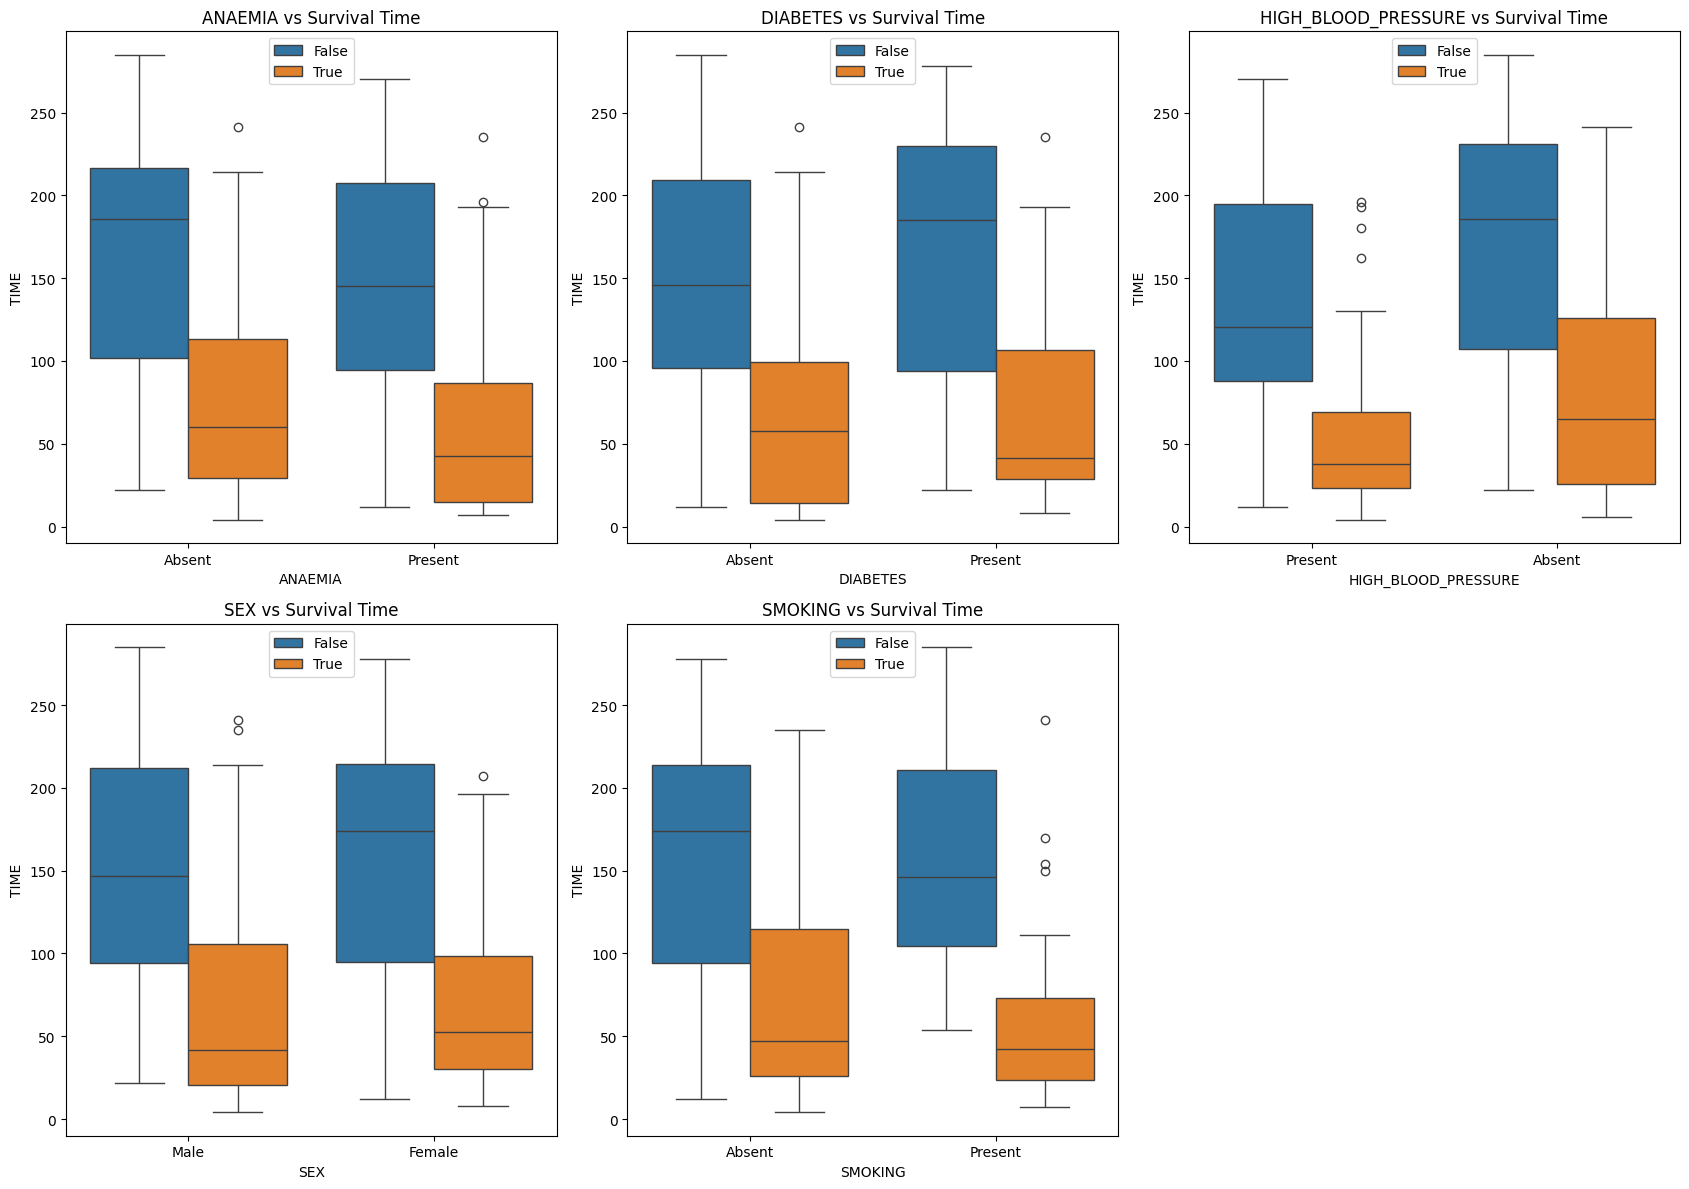

In [94]:
##################################
# Exploring the relationships between
# the object predictors and survival time
##################################
plt.figure(figsize=(17, 12))
for i in range(1, 6):
    plt.subplot(2, 3, i)
    sns.boxplot(x=heart_failure_categorical_predictor.columns[i-1], y='TIME', hue='DEATH_EVENT', data=heart_failure_EDA)
    plt.title(f'{heart_failure_categorical_predictor.columns[i-1]} vs Survival Time')
    plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictors to the <span style="color: #FF0000">DEATH_EVENT</span> event variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups True and False is equal to zero  
    * **Alternative**: Difference in the means between groups True and False is not equal to zero   
2. There is sufficient evidence to conclude of a statistically significant difference between the means of the numeric measurements obtained from the <span style="color: #FF0000">Status</span> groups in 4 numeric predictors given their high t-test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">SERUM_CREATININE</span>: T.Test.Statistic=-6.825, T.Test.PValue=0.000
    * <span style="color: #FF0000">EJECTION_FRACTION</span>: T.Test.Statistic=+5.495, T.Test.PValue=0.000 
    * <span style="color: #FF0000">AGE</span>: T.Test.Statistic=-4.274, T.Test.PValue=0.000  
    * <span style="color: #FF0000">SERUM_SODIUM</span>: T.Test.Statistic=+3.229, T.Test.PValue=0.001 
3. The relationship between the object predictors to the <span style="color: #FF0000">DEATH_EVENT</span> event variable was statistically evaluated using the following hypotheses:
    * **Null**: The object predictor is independent of the event variable 
    * **Alternative**: The object predictor is dependent on the event variable   
4. There were no categorical predictors that demonstrated sufficient evidence to conclude of a statistically significant relationship between the individual categories and the <span style="color: #FF0000">Status</span> groups with high chisquare statistic values with reported low p-values less than the significance level of 0.05.
5. The relationship between the object predictors to the <span style="color: #FF0000">DEATH_EVENT</span> and <span style="color: #FF0000">TIME</span> variables was statistically evaluated using the following hypotheses:
    * **Null**: There is no difference in survival probabilities among cases belonging to each category of the object predictor.
    * **Alternative**: There is a difference in survival probabilities among cases belonging to each category of the object predictor.
6. There is sufficient evidence to conclude of a statistically significant difference in survival probabilities between the individual categories and the <span style="color: #FF0000">DEATH_EVENT</span> groups with respect to the survival duration <span style="color: #FF0000">TIME</span> in 1 categorical predictor given its high log-rank test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span>: LR.Test.Statistic=4.406, LR.Test.PValue=0.035
7. The relationship between the binned numeric predictors to the <span style="color: #FF0000">DEATH_EVENT</span> and <span style="color: #FF0000">TIME</span> variables was statistically evaluated using the following hypotheses:
    * **Null**: There is no difference in survival probabilities among cases belonging to each category of the binned numeric predictor.
    * **Alternative**: There is a difference in survival probabilities among cases belonging to each category of the binned numeric predictor.
8. There is sufficient evidence to conclude of a statistically significant difference in survival probabilities between the individual categories and the <span style="color: #FF0000">DEATH_EVENT</span> groups with respect to the survival duration <span style="color: #FF0000">TIME</span> in 9 binned numeric predictors given their high log-rank test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Binned_SERUM_CREATININE</span>: LR.Test.Statistic=21.190, LR.Test.PValue=0.000
    * <span style="color: #FF0000">Binned_EJECTION_FRACTION</span>: LR.Test.Statistic=9.469, LR.Test.PValue=0.002 
    * <span style="color: #FF0000">Binned_AGE</span>: LR.Test.Statistic=4.951, LR.Test.PValue=0.026
    * <span style="color: #FF0000">Binned_SERUM_SODIUM</span>: LR.Test.Statistic=4.887, LR.Test.PValue=0.027
      

In [95]:
##################################
# Formulating a complete dataframe
##################################
heart_failure_HT = pd.concat([heart_failure_numeric_predictor_transformed,
                               heart_failure_categorical,
                               heart_failure_numeric['TIME']],
                              axis=1)
heart_failure_HT['DEATH_EVENT'] = heart_failure_HT['DEATH_EVENT'].replace({0: False, 1: True})
heart_failure_HT.head()

,AGE,CREATININE_PHOSPHOKINASE,EJECTION_FRACTION,PLATELETS,SERUM_CREATININE,SERUM_SODIUM,ANAEMIA,DIABETES,HIGH_BLOOD_PRESSURE,SEX,SMOKING,DEATH_EVENT,TIME
0,1.173233,0.691615,-1.773346,0.110528,1.212227,-1.468519,0,0,1,1,0,True,4.0
1,-0.423454,2.401701,0.100914,0.093441,-0.087641,-0.244181,0,0,0,1,0,True,6.0
2,0.434332,-0.553424,-1.773346,-1.093142,0.381817,-1.642143,0,0,0,1,1,True,7.0
3,-0.910411,-0.833885,-1.773346,-0.494713,1.212227,-0.006503,1,0,0,1,0,True,7.0
4,0.434332,-0.462335,-1.773346,0.720277,1.715066,-3.285073,1,1,0,0,0,True,8.0


In [96]:
##################################
# Computing the t-test 
# statistic and p-values
# between the event variable
# and numeric predictor columns
##################################
heart_failure_numeric_ttest_event = {}
for numeric_column in heart_failure_numeric_predictor.columns:
    group_0 = heart_failure_HT[heart_failure_HT.loc[:,'DEATH_EVENT']==False]
    group_1 = heart_failure_HT[heart_failure_HT.loc[:,'DEATH_EVENT']==True]
    heart_failure_numeric_ttest_event['DEATH_EVENT_' + numeric_column] = stats.ttest_ind(
        group_0[numeric_column], 
        group_1[numeric_column], 
        equal_var=True)

In [97]:
##################################
# Formulating the pairwise ttest summary
# between the event variable
# and numeric predictor columns
##################################
heart_failure_numeric_ttest_summary = heart_failure_HT.from_dict(heart_failure_numeric_ttest_event, orient='index')
heart_failure_numeric_ttest_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(heart_failure_numeric_ttest_summary.sort_values(by=['T.Test.PValue'], ascending=True))

,T.Test.Statistic,T.Test.PValue
DEATH_EVENT_SERUM_CREATININE,-6.825678,4.927143e-11
DEATH_EVENT_EJECTION_FRACTION,5.495673,8.382875e-08
DEATH_EVENT_AGE,-4.274623,2.582635e-05
DEATH_EVENT_SERUM_SODIUM,3.229580,1.378737e-03
DEATH_EVENT_PLATELETS,1.031261,3.032576e-01
DEATH_EVENT_CREATININE_PHOSPHOKINASE,-0.565564,5.721174e-01


In [98]:
##################################
# Computing the chisquare
# statistic and p-values
# between the event variable
# and categorical predictor columns
##################################
heart_failure_categorical_chisquare_event = {}
for categorical_column in heart_failure_categorical_predictor.columns:
    contingency_table = pd.crosstab(heart_failure_HT[categorical_column], 
                                    heart_failure_HT['DEATH_EVENT'])
    heart_failure_categorical_chisquare_event['DEATH_EVENT_' + categorical_column] = stats.chi2_contingency(
        contingency_table)[0:2]

In [99]:
##################################
# Formulating the pairwise chisquare summary
# between the event variable
# and categorical predictor columns
##################################
heart_failure_categorical_chisquare_event_summary = heart_failure_HT.from_dict(heart_failure_categorical_chisquare_event, orient='index')
heart_failure_categorical_chisquare_event_summary.columns = ['ChiSquare.Test.Statistic', 'ChiSquare.Test.PValue']
display(heart_failure_categorical_chisquare_event_summary.sort_values(by=['ChiSquare.Test.PValue'], ascending=True))

,ChiSquare.Test.Statistic,ChiSquare.Test.PValue
DEATH_EVENT_HIGH_BLOOD_PRESSURE,1.543461,0.214103
DEATH_EVENT_ANAEMIA,1.042175,0.307316
DEATH_EVENT_SMOKING,0.007331,0.931765
DEATH_EVENT_DIABETES,0.000000,1.000000
DEATH_EVENT_SEX,0.000000,1.000000


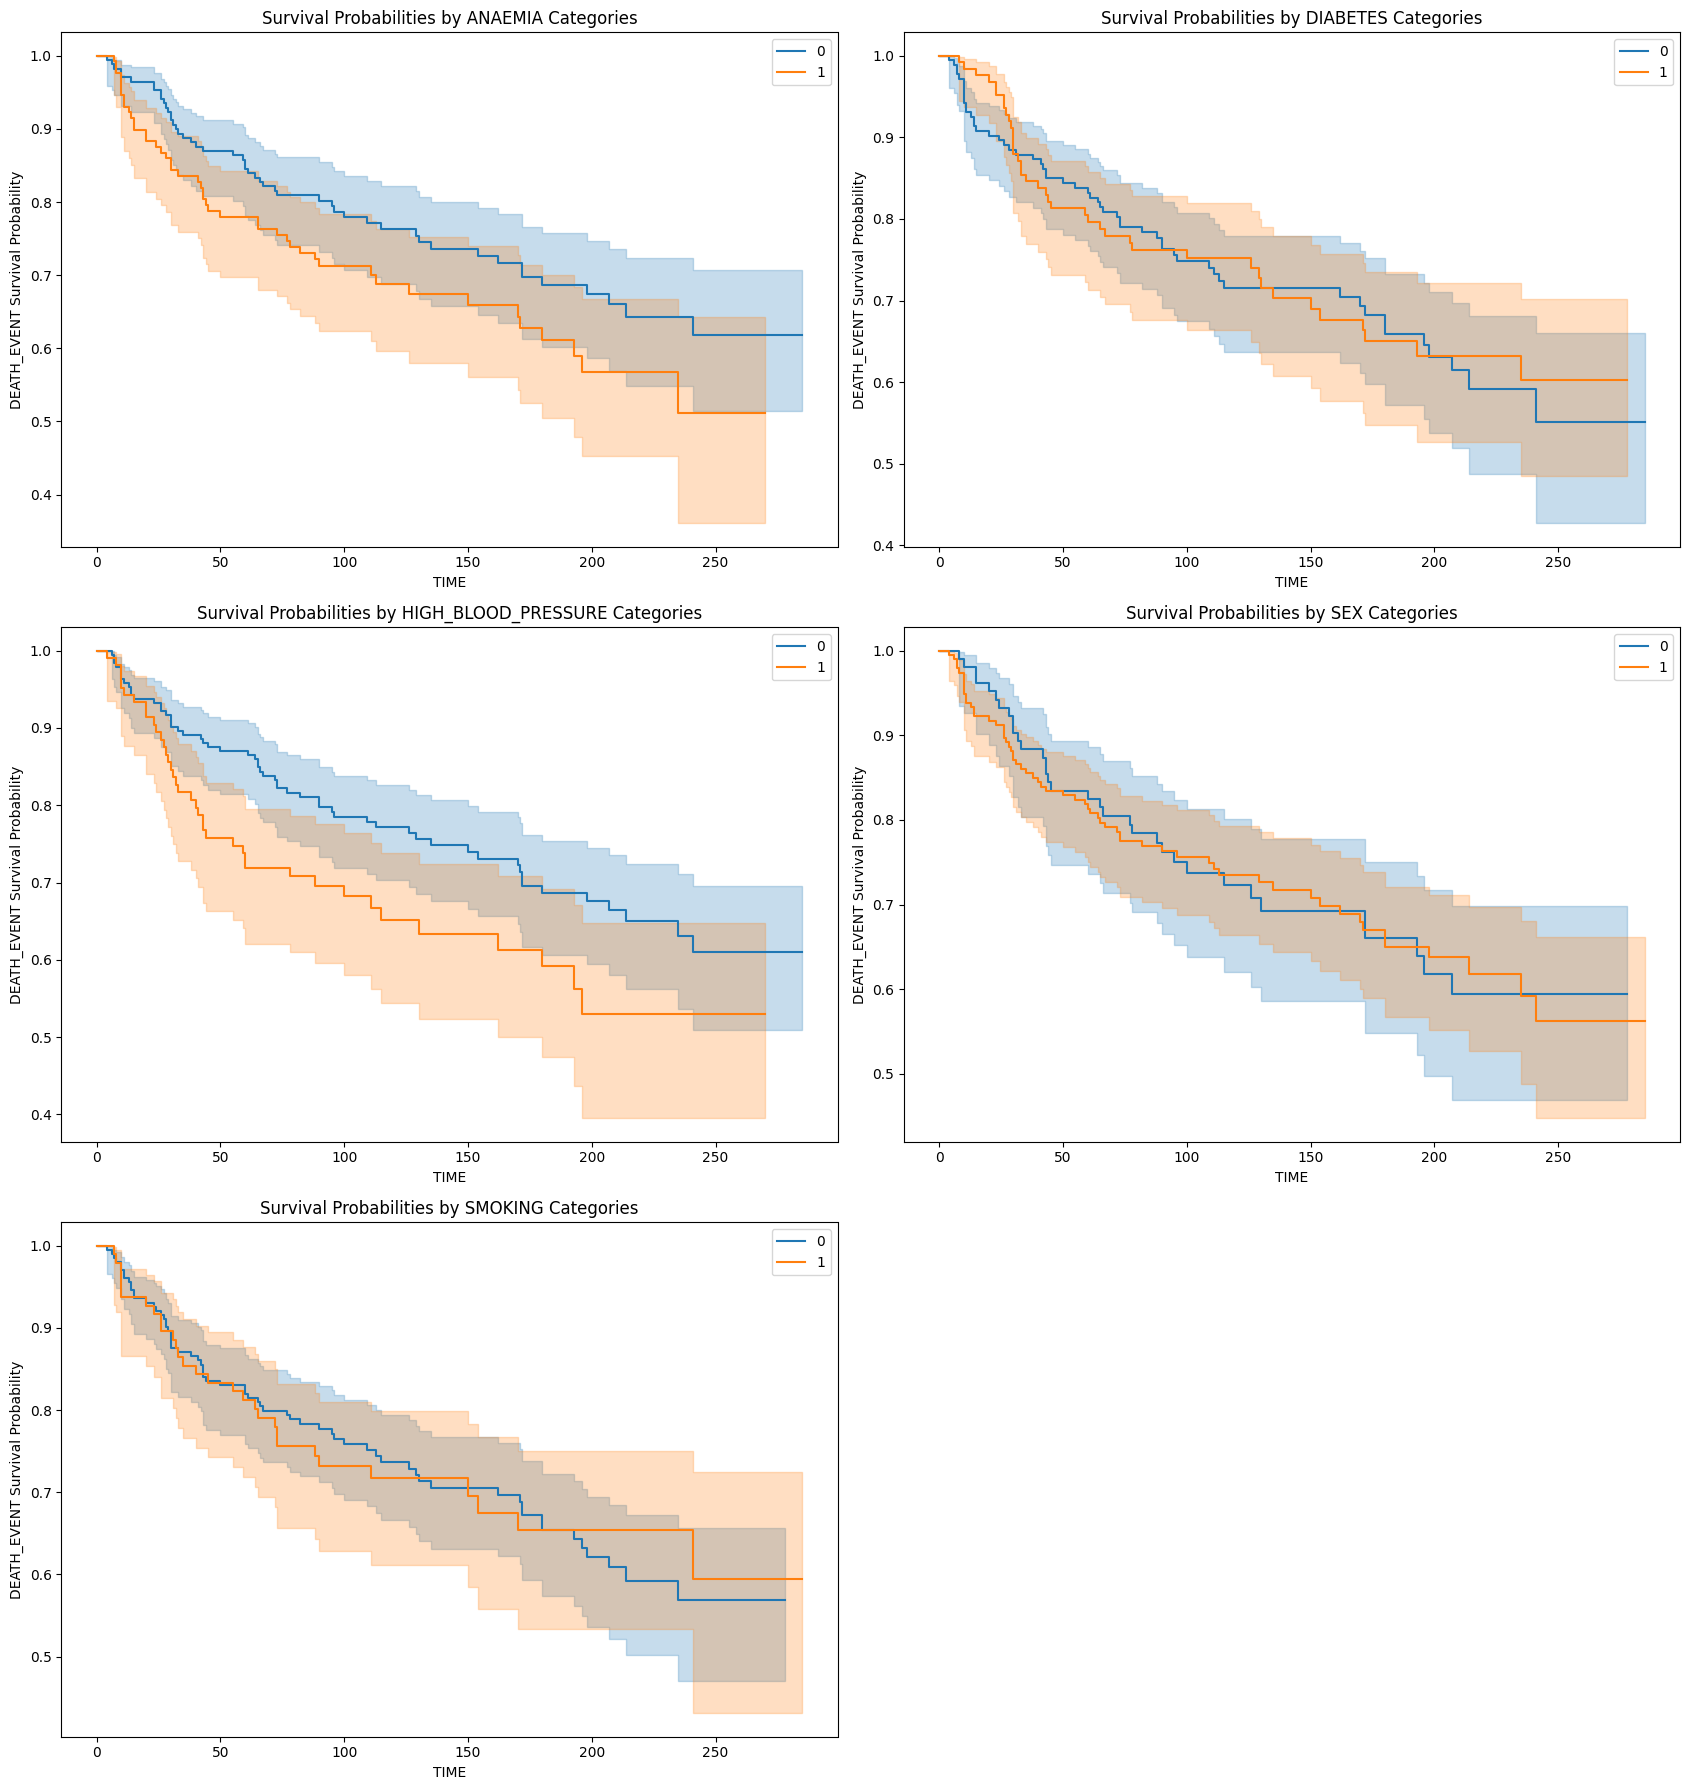

In [100]:
##################################
# Exploring the relationships between
# the categorical predictors with
# survival event and duration
##################################
plt.figure(figsize=(17, 18))
for i in range(1, 6):
    ax = plt.subplot(3, 2, i)
    for group in [0,1]:
        kmf.fit(durations=heart_failure_HT[heart_failure_HT[heart_failure_categorical_predictor.columns[i-1]] == group]['TIME'],
                event_observed=heart_failure_HT[heart_failure_HT[heart_failure_categorical_predictor.columns[i-1]] == group]['DEATH_EVENT'], label=group)
        kmf.plot_survival_function(ax=ax)
    plt.title(f'Survival Probabilities by {heart_failure_categorical_predictor.columns[i-1]} Categories')
    plt.xlabel('TIME')
    plt.ylabel('DEATH_EVENT Survival Probability')
plt.tight_layout()
plt.show()

In [101]:
##################################
# Computing the log-rank test
# statistic and p-values
# between the event and duration variables
# with the categorical predictor columns
##################################
heart_failure_categorical_lrtest_event = {}
for categorical_column in heart_failure_categorical_predictor.columns:
    groups = [0,1]
    group_0_event = heart_failure_HT[heart_failure_HT[categorical_column] == groups[0]]['DEATH_EVENT']
    group_1_event = heart_failure_HT[heart_failure_HT[categorical_column] == groups[1]]['DEATH_EVENT']
    group_0_duration = heart_failure_HT[heart_failure_HT[categorical_column] == groups[0]]['TIME']
    group_1_duration = heart_failure_HT[heart_failure_HT[categorical_column] == groups[1]]['TIME']
    lr_test = logrank_test(group_0_duration, group_1_duration,event_observed_A=group_0_event, event_observed_B=group_1_event)
    heart_failure_categorical_lrtest_event['DEATH_EVENT_TIME_' + categorical_column] = (lr_test.test_statistic, lr_test.p_value)

In [102]:
##################################
# Formulating the log-rank test summary
# between the event and duration variables
# with the categorical predictor columns
##################################
heart_failure_categorical_lrtest_summary = heart_failure_HT.from_dict(heart_failure_categorical_lrtest_event, orient='index')
heart_failure_categorical_lrtest_summary.columns = ['LR.Test.Statistic', 'LR.Test.PValue']
display(heart_failure_categorical_lrtest_summary.sort_values(by=['LR.Test.PValue'], ascending=True))

,LR.Test.Statistic,LR.Test.PValue
DEATH_EVENT_TIME_HIGH_BLOOD_PRESSURE,4.406248,0.035808
DEATH_EVENT_TIME_ANAEMIA,2.726464,0.098698
DEATH_EVENT_TIME_DIABETES,0.040528,0.840452
DEATH_EVENT_TIME_SEX,0.003971,0.949752
DEATH_EVENT_TIME_SMOKING,0.002042,0.963960


In [103]:
##################################
# Creating an alternate copy of the 
# EDA data which will utilize
# binning for numeric predictors
##################################
heart_failure_HT_binned = heart_failure_HT.copy()

##################################
# Creating a function to bin
# numeric predictors into two groups
##################################
def bin_numeric_predictor(df, predictor):
    median = df[predictor].median()
    df[f'Binned_{predictor}'] = np.where(df[predictor] <= median, 0, 1)
    return df

##################################
# Binning the numeric predictors
# in the alternate data into two groups
##################################
for numeric_column in heart_failure_numeric_predictor.columns:
    heart_failure_HT_binned = bin_numeric_predictor(heart_failure_HT_binned, numeric_column)
    
##################################
# Formulating the binned numeric predictors
##################################    
heart_failure_binned_numeric_predictor = ["Binned_" + predictor for predictor in heart_failure_numeric_predictor.columns]

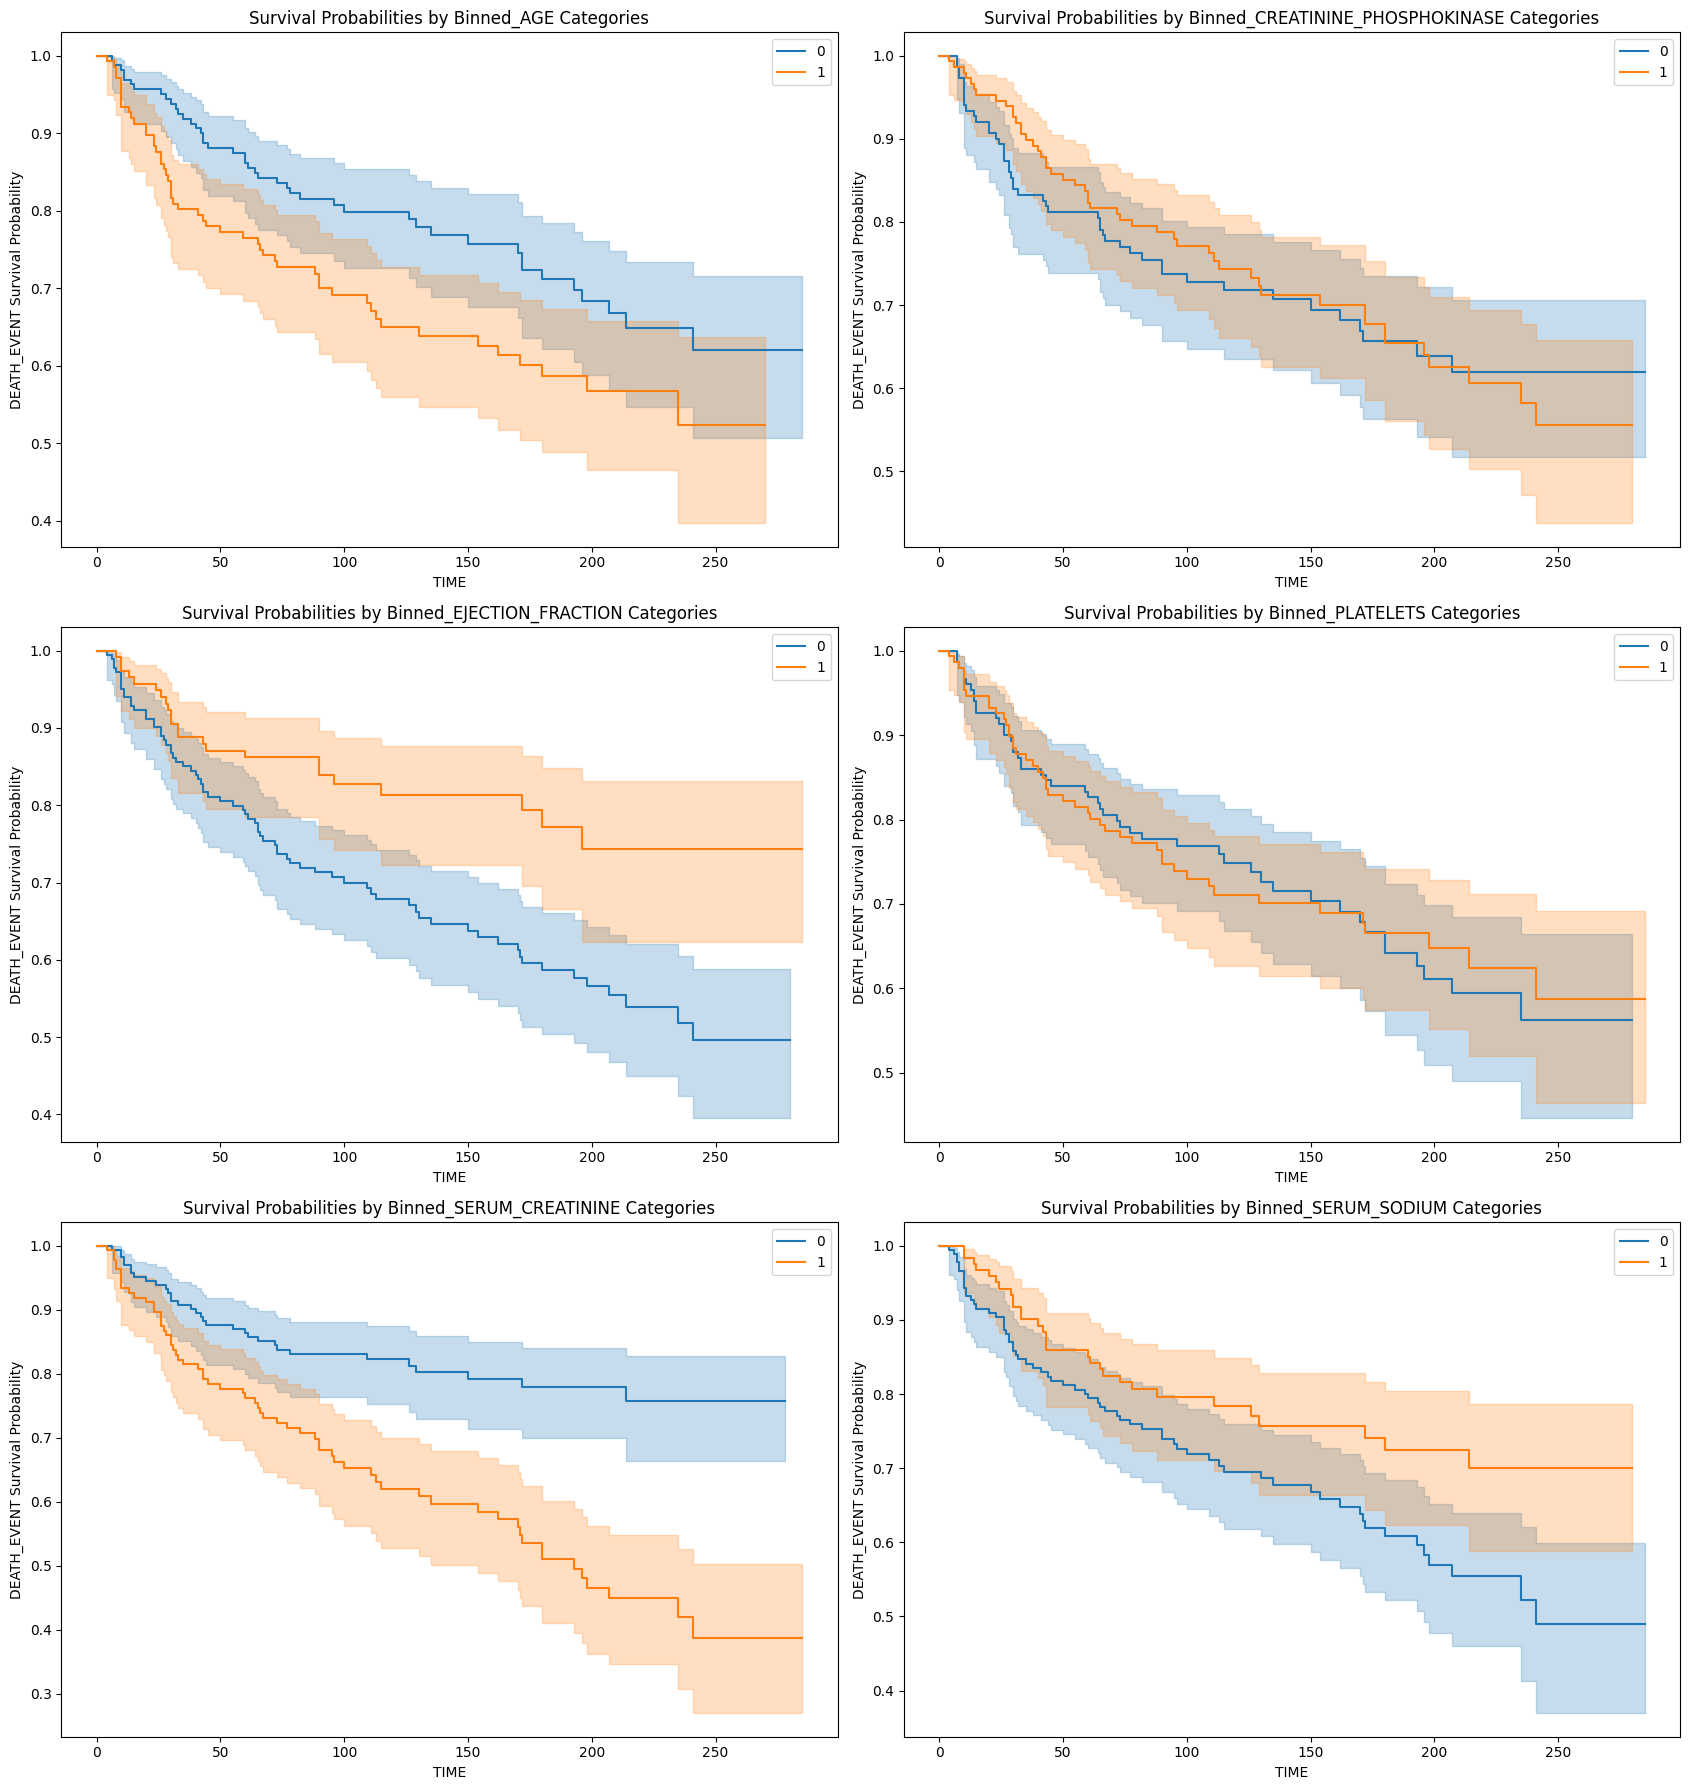

In [104]:
##################################
# Exploring the relationships between
# the binned numeric predictors with
# survival event and duration
##################################
plt.figure(figsize=(17, 18))
for i in range(1, 7):
    ax = plt.subplot(3, 2, i)
    for group in [0,1]:
            kmf.fit(durations=heart_failure_HT_binned[heart_failure_HT_binned[heart_failure_binned_numeric_predictor[i-1]] == group]['TIME'],
                event_observed=heart_failure_HT_binned[heart_failure_HT_binned[heart_failure_binned_numeric_predictor[i-1]] == group]['DEATH_EVENT'], label=group)
            kmf.plot_survival_function(ax=ax)
    plt.title(f'Survival Probabilities by {heart_failure_binned_numeric_predictor[i-1]} Categories')
    plt.xlabel('TIME')
    plt.ylabel('DEATH_EVENT Survival Probability')
plt.tight_layout()
plt.show()

In [105]:
##################################
# Computing the log-rank test
# statistic and p-values
# between the event and duration variables
# with the binned numeric predictor columns
##################################
heart_failure_binned_numeric_lrtest_event = {}
for binned_numeric_column in heart_failure_binned_numeric_predictor:
    groups = [0,1]
    group_0_event = heart_failure_HT_binned[heart_failure_HT_binned[binned_numeric_column] == groups[0]]['DEATH_EVENT']
    group_1_event = heart_failure_HT_binned[heart_failure_HT_binned[binned_numeric_column] == groups[1]]['DEATH_EVENT']
    group_0_duration = heart_failure_HT_binned[heart_failure_HT_binned[binned_numeric_column] == groups[0]]['TIME']
    group_1_duration = heart_failure_HT_binned[heart_failure_HT_binned[binned_numeric_column] == groups[1]]['TIME']
    lr_test = logrank_test(group_0_duration, group_1_duration,event_observed_A=group_0_event, event_observed_B=group_1_event)
    heart_failure_binned_numeric_lrtest_event['DEATH_EVENT_TIME_' + binned_numeric_column] = (lr_test.test_statistic, lr_test.p_value)

In [106]:
##################################
# Formulating the log-rank test summary
# between the event and duration variables
# with the binned numeric predictor columns
##################################
heart_failure_binned_numeric_lrtest_summary = heart_failure_HT_binned.from_dict(heart_failure_binned_numeric_lrtest_event, orient='index')
heart_failure_binned_numeric_lrtest_summary.columns = ['LR.Test.Statistic', 'LR.Test.PValue']
display(heart_failure_binned_numeric_lrtest_summary.sort_values(by=['LR.Test.PValue'], ascending=True))

,LR.Test.Statistic,LR.Test.PValue
DEATH_EVENT_TIME_Binned_SERUM_CREATININE,21.190414,0.000004
DEATH_EVENT_TIME_Binned_EJECTION_FRACTION,9.469633,0.002089
DEATH_EVENT_TIME_Binned_AGE,4.951760,0.026064
DEATH_EVENT_TIME_Binned_SERUM_SODIUM,4.887878,0.027046
DEATH_EVENT_TIME_Binned_CREATININE_PHOSPHOKINASE,0.055576,0.813630
DEATH_EVENT_TIME_Binned_PLATELETS,0.009122,0.923912


## 1.6. Predictive Model Development <a class="anchor" id="1.6"></a>

### 1.6.1 Pre-Modelling Data Preparation <a class="anchor" id="1.6.1"></a>

1. All dichotomous categorical predictors and the target variable were one-hot encoded for the downstream modelling process. 
2. Predictors determined with insufficient association with the <span style="color: #FF0000">DEATH_EVENT</span> and <span style="color: #FF0000">TIME</span> variables were excluded for the subsequent modelling steps.
    * <span style="color: #FF0000">DIABETES</span>: LR.Test.Statistic=0.040, LR.Test.PValue=0.840
    * <span style="color: #FF0000">SEX</span>: LR.Test.Statistic=0.003, LR.Test.PValue=0.949
    * <span style="color: #FF0000">SMOKING</span>: LR.Test.Statistic=0.002, LR.Test.PValue=0.963  
    * <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span>: LR.Test.Statistic=0.055, LR.Test.PValue=0.813
    * <span style="color: #FF0000">PLATELETS</span>: LR.Test.Statistic=0.009, LR.Test.PValue=0.923


In [107]:
#################################
# Creating a dataset copy 
# for data splitting and modelling
##################################
heart_failure_transformed = heart_failure_original.copy()
heart_failure_transformed['DEATH_EVENT'] = heart_failure_transformed['DEATH_EVENT'].replace({0: False, 1: True})
display(heart_failure_transformed)

,AGE,ANAEMIA,CREATININE_PHOSPHOKINASE,DIABETES,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,PLATELETS,SERUM_CREATININE,SERUM_SODIUM,SEX,SMOKING,TIME,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,4.0,True
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,6.0,True
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,7.0,True
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,7.0,True
4,65.0,1,160.0,1,20.0,0,327000.00,2.7,116.0,0,0,8.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.0,1,38.0,1,155000.00,1.1,143.0,1,1,270.0,False
295,55.0,0,1820.0,0,38.0,0,270000.00,1.2,139.0,0,0,271.0,False
296,45.0,0,2060.0,1,60.0,0,742000.00,0.8,138.0,0,0,278.0,False
297,45.0,0,2413.0,0,38.0,0,140000.00,1.4,140.0,1,1,280.0,False


In [108]:
##################################
# Saving the tranformed data
# to the DATASETS_PREPROCESSED_PATH
##################################
heart_failure_transformed.to_csv(os.path.join("..", DATASETS_PREPROCESSED_PATH, "heart_failure_transformed.csv"), index=False)

In [109]:
##################################
# Filtering out predictors that did not exhibit 
# sufficient discrimination of the target variable
# Saving the tranformed data
# to the DATASETS_PREPROCESSED_PATH
##################################
heart_failure_filtered = heart_failure_transformed.drop(['DIABETES','SEX', 'SMOKING', 'CREATININE_PHOSPHOKINASE','PLATELETS'], axis=1)
heart_failure_filtered.to_csv(os.path.join("..", DATASETS_FINAL_PATH, "heart_failure_final.csv"), index=False)
display(heart_failure_filtered)

,AGE,ANAEMIA,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,SERUM_CREATININE,SERUM_SODIUM,TIME,DEATH_EVENT
0,75.0,0,20.0,1,1.9,130.0,4.0,True
1,55.0,0,38.0,0,1.1,136.0,6.0,True
2,65.0,0,20.0,0,1.3,129.0,7.0,True
3,50.0,1,20.0,0,1.9,137.0,7.0,True
4,65.0,1,20.0,0,2.7,116.0,8.0,True
...,...,...,...,...,...,...,...,...
294,62.0,0,38.0,1,1.1,143.0,270.0,False
295,55.0,0,38.0,0,1.2,139.0,271.0,False
296,45.0,0,60.0,0,0.8,138.0,278.0,False
297,45.0,0,38.0,0,1.4,140.0,280.0,False


### 1.6.2 Data Splitting <a class="anchor" id="1.6.2"></a>

1. The preprocessed dataset was divided into three subsets using a fixed random seed:
    * **test data**: 25% of the original data with class stratification applied
    * **train data (initial)**: 75% of the original data with class stratification applied
        * **train data (final)**: 75% of the **train (initial)** data with class stratification applied
        * **validation data**: 25% of the **train (initial)** data with class stratification applied
2. Although a moderate class imbalance between <span style="color: #FF0000">DEATH_EVENT=True</span> and <span style="color: #FF0000">DEATH_EVENT=False</span> was observed, maintining the time-to-even distribution is crucial for survival analysis. Resampling would require synthetic imputation of event times, which could introduce additional noise and bias into the model. Given the nature of the data, preserving the integrity of the time variable is of higher importance than correcting for a moderate class imbalance.
3. Models were developed from the **train data (final)**. Using the same dataset, a subset of models with optimal hyperparameters were selected, based on cross-validation.
4. Among candidate models with optimal hyperparameters, the final model were selected based on performance during **cross-validation** and **independent validation**. 
5. Performance of the selected final model (and other candidate models for post-model selection comparison) were evaluated using the **test data**. 
6. The preprocessed data is comprised of:
    * **299 rows** (observations)
        * **96 DEATH_EVENT=True**: 32.11%
        * **203 DEATH_EVENT=False**: 67.89%
    * **8 columns** (variables)
        * **2/8 event | duration** (object | numeric)
             * <span style="color: #FF0000">DEATH_EVENT</span>
             * <span style="color: #FF0000">TIME</span>
        * **4/8 predictor** (numeric)
             * <span style="color: #FF0000">AGE</span>
             * <span style="color: #FF0000">EJECTION_FRACTION</span>
             * <span style="color: #FF0000">SERUM_CREATININE</span>
             * <span style="color: #FF0000">SERUM_SODIUM</span>
        * **2/8 predictor** (object)
             * <span style="color: #FF0000">ANAEMIA </span>
             * <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span>
7. The **train data (final)** subset is comprised of:
    * **168 rows** (observations)
        * **114 LUNG_CANCER=Yes**: 67.85%
        * **54 LUNG_CANCER=No**: 32.14%
    * **8 columns** (variables)
8. The **validation data** subset is comprised of:
    * **56 rows** (observations)
        * **38 LUNG_CANCER=Yes**: 67.85%
        * **18 LUNG_CANCER=No**: 32.14%
    * **8 columns** (variables)
9. The **test data** subset is comprised of:
    * **75 rows** (observations)
        * **51 DEATH_EVENT=True**: 68.93%
        * **24 DEATH_EVENT=False**: 32.07%
    * **8 columns** (variables)


In [110]:
##################################
# Creating a dataset copy
# of the filtered data
##################################
heart_failure_final = heart_failure_filtered.copy()

In [111]:
##################################
# Performing a general exploration
# of the final dataset
##################################
print('Final Dataset Dimensions: ')
display(heart_failure_final.shape)

Final Dataset Dimensions: 


(299, 8)

In [112]:
print('Target Variable Breakdown: ')
heart_failure_breakdown = heart_failure_final.groupby('DEATH_EVENT', observed=True).size().reset_index(name='Count')
heart_failure_breakdown['Percentage'] = (heart_failure_breakdown['Count'] / len(heart_failure_final)) * 100
display(heart_failure_breakdown)

Target Variable Breakdown: 


,DEATH_EVENT,Count,Percentage
0,False,203,67.892977
1,True,96,32.107023


In [113]:
##################################
# Formulating the train and test data
# from the final dataset
# by applying stratification and
# using a 70-30 ratio
##################################
heart_failure_train_initial, heart_failure_test = train_test_split(heart_failure_final, 
                                                                   test_size=0.25, 
                                                                   stratify=heart_failure_final['DEATH_EVENT'], 
                                                                   random_state=88888888)

In [114]:
##################################
# Performing a general exploration
# of the initial training dataset
##################################
X_train_initial = heart_failure_train_initial.drop(['DEATH_EVENT', 'TIME'], axis=1)
y_train_initial = heart_failure_train_initial[['DEATH_EVENT', 'TIME']]
print('Initial Training Dataset Dimensions: ')
display(X_train_initial.shape)
display(y_train_initial.shape)
print('Initial Training Target Variable Breakdown: ')
display(y_train_initial['DEATH_EVENT'].value_counts())
print('Initial Training Target Variable Proportion: ')
display(y_train_initial['DEATH_EVENT'].value_counts(normalize = True))

Initial Training Dataset Dimensions: 


(224, 6)

(224, 2)

Initial Training Target Variable Breakdown: 


DEATH_EVENT
False    152
True      72
Name: count, dtype: int64

Initial Training Target Variable Proportion: 


DEATH_EVENT
False    0.678571
True     0.321429
Name: proportion, dtype: float64

In [115]:
##################################
# Performing a general exploration
# of the test dataset
##################################
X_test = heart_failure_test.drop(['DEATH_EVENT', 'TIME'], axis=1)
y_test = heart_failure_test[['DEATH_EVENT', 'TIME']]
print('Test Dataset Dimensions: ')
display(X_test.shape)
display(y_test.shape)
print('Test Target Variable Breakdown: ')
display(y_test['DEATH_EVENT'].value_counts())
print('Test Target Variable Proportion: ')
display(y_test['DEATH_EVENT'].value_counts(normalize = True))

Test Dataset Dimensions: 


(75, 6)

(75, 2)

Test Target Variable Breakdown: 


DEATH_EVENT
False    51
True     24
Name: count, dtype: int64

Test Target Variable Proportion: 


DEATH_EVENT
False    0.68
True     0.32
Name: proportion, dtype: float64

In [116]:
##################################
# Formulating the train and validation data
# from the train dataset
# by applying stratification and
# using a 70-30 ratio
##################################
heart_failure_train, heart_failure_validation = train_test_split(heart_failure_train_initial, 
                                                                 test_size=0.25, 
                                                                 stratify=heart_failure_train_initial['DEATH_EVENT'], 
                                                                 random_state=88888888)

In [117]:
##################################
# Performing a general exploration
# of the final training dataset
##################################
X_train = heart_failure_train.drop(columns=['DEATH_EVENT', 'TIME'], axis=1)
y_train = heart_failure_train[['DEATH_EVENT', 'TIME']]
print('Final Training Dataset Dimensions: ')
display(X_train.shape)
display(y_train.shape)
print('Final Training Target Variable Breakdown: ')
display(y_train['DEATH_EVENT'].value_counts())
print('Final Training Target Variable Proportion: ')
display(y_train['DEATH_EVENT'].value_counts(normalize = True))

Final Training Dataset Dimensions: 


(168, 6)

(168, 2)

Final Training Target Variable Breakdown: 


DEATH_EVENT
False    114
True      54
Name: count, dtype: int64

Final Training Target Variable Proportion: 


DEATH_EVENT
False    0.678571
True     0.321429
Name: proportion, dtype: float64

In [118]:
##################################
# Performing a general exploration
# of the validation dataset
##################################
X_validation = heart_failure_validation.drop(columns=['DEATH_EVENT', 'TIME'], axis = 1)
y_validation = heart_failure_validation[['DEATH_EVENT', 'TIME']]
print('Validation Dataset Dimensions: ')
display(X_validation.shape)
display(y_validation.shape)
print('Validation Target Variable Breakdown: ')
display(y_validation['DEATH_EVENT'].value_counts())
print('Validation Target Variable Proportion: ')
display(y_validation['DEATH_EVENT'].value_counts(normalize = True))

Validation Dataset Dimensions: 


(56, 6)

(56, 2)

Validation Target Variable Breakdown: 


DEATH_EVENT
False    38
True     18
Name: count, dtype: int64

Validation Target Variable Proportion: 


DEATH_EVENT
False    0.678571
True     0.321429
Name: proportion, dtype: float64

In [119]:
##################################
# Saving the training data
# to the DATASETS_FINAL_TRAIN_PATH
# and DATASETS_FINAL_TRAIN_FEATURES_PATH
# and DATASETS_FINAL_TRAIN_TARGET_PATH
##################################
heart_failure_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_PATH, "heart_failure_train.csv"), index=False)
X_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_FEATURES_PATH, "X_train.csv"), index=False)
y_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_TARGET_PATH, "y_train.csv"), index=False)

In [120]:
##################################
# Saving the validation data
# to the DATASETS_FINAL_VALIDATION_PATH
# and DATASETS_FINAL_VALIDATION_FEATURE_PATH
# and DATASETS_FINAL_VALIDATION_TARGET_PATH
##################################
heart_failure_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_PATH, "heart_failure_validation.csv"), index=False)
X_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_FEATURES_PATH, "X_validation.csv"), index=False)
y_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_TARGET_PATH, "y_validation.csv"), index=False)

In [121]:
##################################
# Saving the test data
# to the DATASETS_FINAL_TEST_PATH
# and DATASETS_FINAL_TEST_FEATURES_PATH
# and DATASETS_FINAL_TEST_TARGET_PATH
##################################
heart_failure_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_PATH, "heart_failure_test.csv"), index=False)
X_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_FEATURES_PATH, "X_test.csv"), index=False)
y_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_TARGET_PATH, "y_test.csv"), index=False)

In [122]:
##################################
# Converting the event and duration variables
# for the train, validation and test sets
# to array as preparation for modeling
##################################
y_train_array = np.array([(row.DEATH_EVENT, row.TIME) for index, row in y_train.iterrows()], dtype=[('DEATH_EVENT', 'bool'), ('TIME', 'int')])
y_validation_array = np.array([(row.DEATH_EVENT, row.TIME) for index, row in y_validation.iterrows()], dtype=[('DEATH_EVENT', 'bool'), ('TIME', 'int')])
y_test_array = np.array([(row.DEATH_EVENT, row.TIME) for index, row in y_test.iterrows()], dtype=[('DEATH_EVENT', 'bool'), ('TIME', 'int')])

### 1.6.3 Modelling Pipeline Development <a class="anchor" id="1.6.3"></a>

### 1.6.3.1 Cox Proportional Hazards Regression <a class="anchor" id="1.6.3.1"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) is a semiparametric model used to study the relationship between the survival time of subjects and one or more predictor variables. The model assumes that the hazard ratio (the risk of the event occurring at a specific time) is a product of a baseline hazard function and an exponential function of the predictor variables. It also does not require the baseline hazard to be specified, thus making it a semiparametric model. As a method, it is well-established and widely used in survival analysis, can handle time-dependent covariates and provides a relatively straightforward interpretation. However, the process assumes proportional hazards, which may not hold in all datasets, and may be less flexible in capturing complex relationships between variables and survival times compared to some machine learning models. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the partial likelihood function for the Cox model (which only considers the relative ordering of survival times); using optimization techniques to estimate the regression coefficients by maximizing the log-partial likelihood; estimating the baseline hazard function (although it is not explicitly required for predictions); and calculating the hazard function and survival function for new data using the estimated coefficients and baseline hazard.

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. A modelling pipeline was implemented with the following steps:
    * [Yeo-johnson transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) from the <mark style="background-color: #CCECFF"><b>sklearn.processing</b></mark> Python library API.
    * [Cox proportional hazards regression model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html) from the <mark style="background-color: #CCECFF"><b>sksurv.linear_model</b></mark> Python library API with 1 hyperparameter:
        * <span style="color: #FF0000">alpha</span> = regularization parameter for ridge regression penalty made to vary between 0.00, 0.01, 0.10, 1.00, 10.0 and 100.00
2. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance determined using the concordance index. 


In [123]:
##################################
# Defining the modelling pipeline
# using the Cox Proportional Hazards Regression Model
##################################
coxph_pipeline = Pipeline([
    ('yeo_johnson', PowerTransformer(method='yeo-johnson', standardize=True)),
    ('coxph', CoxPHSurvivalAnalysis())])

In [124]:
##################################
# Defining the hyperparameters for grid search
##################################
coxph_hyperparameter_grid = {'coxph__alpha': [0.01, 0.10, 1.00, 10.00, 100.00]}

In [125]:
##################################
# Setting up the GridSearchCV with 5-fold cross-validation
# and using F1 score as the model evaluation metric
##################################
coxph_grid_search = GridSearchCV(estimator=coxph_pipeline,
                                 param_grid=coxph_hyperparameter_grid,
                                 cv=KFold(n_splits=5, shuffle=True, random_state=88888888),
                                 return_train_score=False,
                                 n_jobs=-1,
                                 verbose=1)

### 1.6.3.2 Cox Net Survival <a class="anchor" id="1.6.3.2"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Net Survival](https://doi.org/10.18637/jss.v039.i05) is a regularized version of the Cox Proportional Hazards model, which incorporates both L1 (Lasso) and L2 (Ridge) penalties. The model is useful when dealing with high-dimensional data where the number of predictors can be larger than the number of observations. The elastic net penalty helps in both variable selection (via L1) and multicollinearity handling (via L2). As a method, it can handle high-dimensional data and perform variable selection. Additionally, it balances between L1 and L2 penalties, offering flexibility in modeling. However, the process requires tuning of penalty parameters, which can be computationally intensive. Additionally, interpretation is more complex due to the regularization terms. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the penalized partial likelihood function, incorporating both L1 (Lasso) and L2 (Ridge) penalties; application of regularization techniques to estimate the regression coefficients by maximizing the penalized log-partial likelihood; performing cross-validation to select optimal values for the penalty parameters (alpha and l1_ratio); and the calculation of the hazard function and survival function for new data using the estimated regularized coefficients.

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. A modelling pipeline was implemented with the following steps:
    * [Yeo-johnson transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) from the <mark style="background-color: #CCECFF"><b>sklearn.processing</b></mark> Python library API.
    * [Cox net survival model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxnetSurvivalAnalysis.html) from the <mark style="background-color: #CCECFF"><b>sksurv.linear_model</b></mark> Python library API with 2 hyperparameters:
        * <span style="color: #FF0000">l1_ratio</span> = ElasticNet mixing parameter made to vary between 0.10, 0.50 and 1.00
        * <span style="color: #FF0000">alpha_min_ratio</span> = minimum alpha of the regularization path made to vary between 0.0001 and 0.01
2. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance determined using the concordance index. 

In [126]:
##################################
# Defining the modelling pipeline
# using the cox net survival analysis model
##################################
coxns_pipeline = Pipeline([
    ('yeo_johnson', PowerTransformer(method='yeo-johnson', standardize=True)),
    ('coxns', CoxnetSurvivalAnalysis())])

In [127]:
##################################
# Defining the hyperparameters for grid search
##################################
coxns_hyperparameter_grid = {'coxns__l1_ratio': [0.10, 0.50, 1.00],
                             'coxns__alpha_min_ratio': [0.0001, 0.01],
                             'coxns__fit_baseline_model': [True]}

In [128]:
##################################
# Setting up the GridSearchCV with 5-fold cross-validation
# and using concordance index as the model evaluation metric
##################################
coxns_grid_search = GridSearchCV(estimator=coxns_pipeline,
                                 param_grid=coxns_hyperparameter_grid,
                                 cv=KFold(n_splits=5, shuffle=True, random_state=88888888),
                                 return_train_score=False,
                                 n_jobs=-1,
                                 verbose=1)

### 1.6.3.3 Survival Tree <a class="anchor" id="1.6.3.3"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Survival Trees](https://www.tandfonline.com/doi/abs/10.1080/01621459.1993.10476296) are non-parametric models that partition the data into subgroups (nodes) based on the values of predictor variables, creating a tree-like structure. The tree is built by recursively splitting the data at nodes where the differences in survival times between subgroups are maximized. Each terminal node represents a different survival function. The method have no assumptions about the underlying distribution of survival times, can capture interactions between variables naturally and applies an interpretable visual representation. However, the process can be prone to overfitting, especially with small datasets, and may be less accurate compared to ensemble methods like Random Survival Forest. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves recursively splitting the data at nodes to maximize the differences in survival times between subgroups with the splitting criteria often involving statistical tests (e.g., log-rank test); choosing the best predictor variable and split point at each node that maximizes the separation of survival times; continuously splitting until stopping criteria are met (e.g., minimum number of observations in a node, maximum tree depth); and estimating the survival function based on the survival times of the observations at each terminal node.

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. A modelling pipeline was implemented with the following steps:
    * [Yeo-johnson transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) from the <mark style="background-color: #CCECFF"><b>sklearn.processing</b></mark> Python library API.
    * [Survival tree model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.tree.SurvivalTree.html) from the <mark style="background-color: #CCECFF"><b>sksurv.tree</b></mark> Python library API with 2 hyperparameters:
        * <span style="color: #FF0000">min_samples_split</span> = minimum number of samples required to split an internal node made to vary between 10, 15 and 20
        * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 3 and 6
2. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance determined using the concordance index.


In [129]:
##################################
# Defining the modelling pipeline
# using the survival tree model
##################################
stree_pipeline = Pipeline([
    ('yeo_johnson', PowerTransformer(method='yeo-johnson', standardize=True)),
    ('stree', SurvivalTree())])

In [130]:
##################################
# Defining the hyperparameters for grid search
##################################
stree_hyperparameter_grid = {'stree__min_samples_split': [10, 15, 20],
                             'stree__min_samples_leaf': [3, 6],
                             'stree__random_state': [88888888]}

In [131]:
##################################
# Setting up the GridSearchCV with 5-fold cross-validation
# and using concordance index as the model evaluation metric
##################################
stree_grid_search = GridSearchCV(estimator=stree_pipeline,
                                 param_grid=stree_hyperparameter_grid,
                                 cv=KFold(n_splits=5, shuffle=True, random_state=88888888),
                                 return_train_score=False,
                                 n_jobs=-1,
                                 verbose=1)

### 1.6.3.4 Random Survival Forest <a class="anchor" id="1.6.3.4"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Random Survival Forest](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-2/issue-3/Random-survival-forests/10.1214/08-AOAS169.full) is an ensemble method that builds multiple survival trees and averages their predictions. The model combines the predictions of multiple survival trees, each built on a bootstrap sample of the data and a random subset of predictors. It uses the concept of ensemble learning to improve predictive accuracy and robustness. As a method, it handles high-dimensional data and complex interactions between variables well; can be more accurate and robust than a single survival tree; and provides measures of variable importance. However, the process can be bomputationally intensive due to the need to build multiple trees, and may be less interpretable than single trees or parametric models like the Cox model. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves generating multiple bootstrap samples from the original dataset; building a survival tree by recursively splitting the data at nodes using a random subset of predictor variables for each bootstrap sample; combining the predictions of all survival trees to form the random survival forest and averaging the survival functions predicted by all trees in the forest to obtain the final survival function for new data.

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. A modelling pipeline was implemented with the following steps:
    * [Yeo-johnson transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) from the <mark style="background-color: #CCECFF"><b>sklearn.processing</b></mark> Python library API.
    * [Random survival forest model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.RandomSurvivalForest.html) from the <mark style="background-color: #CCECFF"><b>sksurv.ensemble</b></mark> Python library API with 2 hyperparameters:
        * <span style="color: #FF0000">n_estimators</span> = number of trees in the forest made to vary between 100, 200 and 300
        * <span style="color: #FF0000">min_samples_split</span> = minimum number of samples required to split an internal node made to vary between 10, 15 and 20
2. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance determined using the concordance index.


In [132]:
##################################
# Defining the modelling pipeline
# using the random survival forest model
##################################
rsf_pipeline = Pipeline([
    ('yeo_johnson', PowerTransformer(method='yeo-johnson', standardize=True)),
    ('rsf', RandomSurvivalForest())])

In [133]:
##################################
# Defining the hyperparameters for grid search
##################################
rsf_hyperparameter_grid = {'rsf__n_estimators': [100, 200, 300],
                           'rsf__min_samples_split': [10, 15, 20],
                           'rsf__random_state': [88888888]}

In [134]:
##################################
# Setting up the GridSearchCV with 5-fold cross-validation
# and using concordance index as the model evaluation metric
##################################
rsf_grid_search = GridSearchCV(estimator=rsf_pipeline,
                               param_grid=rsf_hyperparameter_grid,
                               cv=KFold(n_splits=5, shuffle=True, random_state=88888888),
                               return_train_score=False,
                               n_jobs=-1,
                               verbose=1)

### 1.6.3.5 Gradient Boosted Survival <a class="anchor" id="1.6.3.5"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Gradient Boosted Survival](https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boosting-machine/10.1214/aos/1013203451.full) is an ensemble technique that builds a series of survival trees, where each tree tries to correct the errors of the previous one. The model uses boosting, a sequential technique where each new tree is fit to the residuals of the combined previous trees, and combines the predictions of all the trees to produce a final prediction. As a method, it has high predictive accuracy, the ability to model complex relationships, and reduces bias and variance compared to single-tree models. However, the process can even be more computationally intensive than Random Survival Forest, requires careful tuning of multiple hyperparameters, and makes interpretation challenging due to the complex nature of the model. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves starting with an initial prediction (often the median survival time or a simple model); calculating the residuals (errors) of the current model's predictions; fitting a survival tree to the residuals to learn the errors made by the current model; updating the current model by adding the new tree weighted by a learning rate parameter; repeating previous steps for a fixed number of iterations or until convergence; and summing the predictions of all trees in the sequence to obtain the final survival function for new data.

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. A modelling pipeline was implemented with the following steps:
    * [Yeo-johnson transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) from the <mark style="background-color: #CCECFF"><b>sklearn.processing</b></mark> Python library API.
    * [Gradient boosted survival model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.GradientBoostingSurvivalAnalysis.html) from the <mark style="background-color: #CCECFF"><b>sksurv.ensemble</b></mark> Python library API with 2 hyperparameters:
        * <span style="color: #FF0000">n_estimators</span> = number of regression trees to create made to vary between 100, 200 and 300
        * <span style="color: #FF0000">learning_rate</span> = shrinkage parameter for the contribution of each tree made to vary between 0.05, 0.10 and 0.15
2. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance determined using the concordance index.


In [135]:
##################################
# Defining the modelling pipeline
# using the gradient boosted survival model
##################################
gbs_pipeline = Pipeline([
    ('yeo_johnson', PowerTransformer(method='yeo-johnson', standardize=True)),
    ('gbs', GradientBoostingSurvivalAnalysis())])

In [136]:
##################################
# Defining the hyperparameters for grid search
##################################
gbs_hyperparameter_grid = {'gbs__n_estimators': [100, 200, 300],
                           'gbs__learning_rate': [0.05, 0.10, 0.15],
                           'gbs__random_state': [88888888]}

In [137]:
##################################
# Setting up the GridSearchCV with 5-fold cross-validation
# and using concordance index as the model evaluation metric
##################################
gbs_grid_search = GridSearchCV(estimator=gbs_pipeline,
                               param_grid=gbs_hyperparameter_grid,
                               cv=KFold(n_splits=5, shuffle=True, random_state=88888888),
                               return_train_score=False,
                               n_jobs=-1,
                               verbose=1)

### 1.6.4 Cox Proportional Hazards Regression Model Fitting | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.4"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) is a semiparametric model used to study the relationship between the survival time of subjects and one or more predictor variables. The model assumes that the hazard ratio (the risk of the event occurring at a specific time) is a product of a baseline hazard function and an exponential function of the predictor variables. It also does not require the baseline hazard to be specified, thus making it a semiparametric model. As a method, it is well-established and widely used in survival analysis, can handle time-dependent covariates and provides a relatively straightforward interpretation. However, the process assumes proportional hazards, which may not hold in all datasets, and may be less flexible in capturing complex relationships between variables and survival times compared to some machine learning models. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the partial likelihood function for the Cox model (which only considers the relative ordering of survival times); using optimization techniques to estimate the regression coefficients by maximizing the log-partial likelihood; estimating the baseline hazard function (although it is not explicitly required for predictions); and calculating the hazard function and survival function for new data using the estimated coefficients and baseline hazard.

1. The [cox proportional hazards regression model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html) from the <mark style="background-color: #CCECFF"><b>sksurv.linear_model</b></mark> Python library API was implemented. 
2. The model implementation used 1 hyperparameter:
    * <span style="color: #FF0000">alpha</span> = regularization parameter for ridge regression penalty made to vary between 0.00, 0.01, 0.10, 1.00, 10.0 and 100.00
3. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the concordance index determined for: 
    * <span style="color: #FF0000">alpha</span> = 10.00
4. The cross-validated model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.7250
5. The apparent model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.7400
6. The independent validation model performance of the final model is summarized as follows:
    * **Concordance Index** = 0.7175
7. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of moderate model overfitting.
8. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
9. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.
    

In [138]:
##################################
# Performing hyperparameter tuning
# through K-fold cross-validation
# using the Cox Proportional Hazards Regression Model
##################################
coxph_grid_search.fit(X_train, y_train_array)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=88888888, shuffle=True),
             estimator=Pipeline(steps=[('yeo_johnson', PowerTransformer()),
                                       ('coxph', CoxPHSurvivalAnalysis())]),
             n_jobs=-1,
             param_grid={'coxph__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
             verbose=1)

In [139]:
##################################
# Summarizing the hyperparameter tuning 
# results from K-fold cross-validation
##################################
coxph_grid_search_results = pd.DataFrame(coxph_grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
coxph_grid_search_results.loc[:, ~coxph_grid_search_results.columns.str.endswith('_time')]

,param_coxph__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,10.00,{'coxph__alpha': 10.0},0.767584,0.715170,0.790816,0.844444,0.507143,0.725032,0.116594,1
2,1.00,{'coxph__alpha': 1.0},0.761468,0.702786,0.790816,0.848889,0.492857,0.719363,0.122666,2
0,0.01,{'coxph__alpha': 0.01},0.758410,0.702786,0.790816,0.848889,0.492857,0.718752,0.122462,3
1,0.10,{'coxph__alpha': 0.1},0.758410,0.702786,0.790816,0.848889,0.492857,0.718752,0.122462,3
4,100.00,{'coxph__alpha': 100.0},0.755352,0.687307,0.770408,0.835556,0.535714,0.716867,0.102103,5


In [140]:
##################################
# Identifying the best model
##################################
coxph_best_model_train_cv = coxph_grid_search.best_estimator_
print('Best Cox Proportional Hazards Regression Model using the Cross-Validated Train Data: ')
print(f"Best Model Parameters: {coxph_grid_search.best_params_}")

Best Cox Proportional Hazards Regression Model using the Cross-Validated Train Data: 
Best Model Parameters: {'coxph__alpha': 10.0}


In [141]:
##################################
# Obtaining the cross-validation model performance of the 
# optimal Cox Proportional Hazards Regression Model
# on the train set
##################################
optimal_coxph_heart_failure_y_crossvalidation_ci = coxph_grid_search.best_score_
print(f"Cross-Validation Concordance Index: {optimal_coxph_heart_failure_y_crossvalidation_ci}")

Cross-Validation Concordance Index: 0.7250316009230025


In [142]:
##################################
# Formulating a Cox Proportional Hazards Regression Model
# with optimal hyperparameters
##################################
optimal_coxph_model = coxph_grid_search.best_estimator_
optimal_coxph_model.fit(X_train, y_train_array)

Pipeline(steps=[('yeo_johnson', PowerTransformer()),
                ('coxph', CoxPHSurvivalAnalysis(alpha=10.0))])

In [143]:
##################################
# Measuring model performance of the 
# optimal Cox Proportional Hazards Regression Model
# on the train set
##################################
optimal_coxph_heart_failure_y_train_pred = optimal_coxph_model.predict(X_train)
optimal_coxph_heart_failure_y_train_ci = concordance_index_censored(y_train_array['DEATH_EVENT'], 
                                                                    y_train_array['TIME'], 
                                                                    optimal_coxph_heart_failure_y_train_pred)[0]
print(f"Apparent Concordance Index: {optimal_coxph_heart_failure_y_train_ci}")

Apparent Concordance Index: 0.7400255346313438


In [144]:
##################################
# Measuring model performance of the 
# optimal Cox Proportional Hazards Regression Model
# on the validation set
##################################
optimal_coxph_heart_failure_y_validation_pred = optimal_coxph_model.predict(X_validation)
optimal_coxph_heart_failure_y_validation_ci = concordance_index_censored(y_validation_array['DEATH_EVENT'], 
                                                                         y_validation_array['TIME'], 
                                                                         optimal_coxph_heart_failure_y_validation_pred)[0]
print(f"Validation Concordance Index: {optimal_coxph_heart_failure_y_validation_ci}")

Validation Concordance Index: 0.7175989085948158


In [145]:
##################################
# Gathering the concordance indices
# from the train and tests sets for 
# Cox Proportional Hazards Regression Model
##################################
coxph_set = pd.DataFrame(["Train","Cross-Validation","Validation"])
coxph_ci_values = pd.DataFrame([optimal_coxph_heart_failure_y_train_ci,
                                optimal_coxph_heart_failure_y_crossvalidation_ci,
                                optimal_coxph_heart_failure_y_validation_ci])
coxph_method = pd.DataFrame(["COXPH"]*3)
coxph_summary = pd.concat([coxph_set, 
                           coxph_ci_values,
                           coxph_method], axis=1)
coxph_summary.columns = ['Set', 'Concordance.Index', 'Method']
coxph_summary.reset_index(inplace=True, drop=True)
display(coxph_summary)

,Set,Concordance.Index,Method
0,Train,0.740026,COXPH
1,Cross-Validation,0.725032,COXPH
2,Validation,0.717599,COXPH


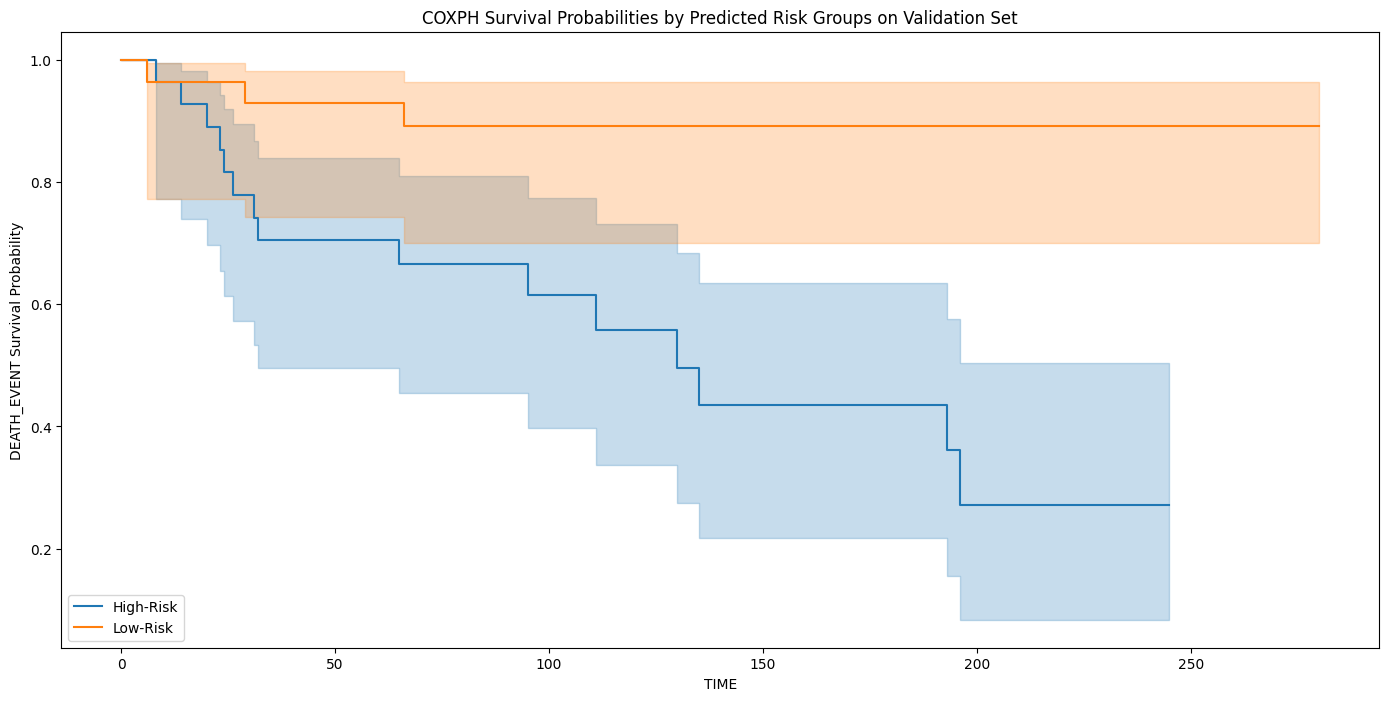

In [146]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
heart_failure_validation.reset_index(drop=True, inplace=True)
kmf = KaplanMeierFitter()
heart_failure_validation['Predicted_Risks_CoxPH'] = optimal_coxph_heart_failure_y_validation_pred
heart_failure_validation['Predicted_RiskGroups_CoxPH'] = risk_groups = pd.qcut(heart_failure_validation['Predicted_Risks_CoxPH'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = heart_failure_validation[risk_groups == group]
    kmf.fit(group_data['TIME'], event_observed=group_data['DEATH_EVENT'], label=group)
    kmf.plot_survival_function()

plt.title('COXPH Survival Probabilities by Predicted Risk Groups on Validation Set')
plt.xlabel('TIME')
plt.ylabel('DEATH_EVENT Survival Probability')
plt.show()

In [147]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
validation_case_details = X_validation.iloc[[5, 10, 15, 20, 25]]
display(validation_case_details)

,AGE,ANAEMIA,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,SERUM_CREATININE,SERUM_SODIUM
291,60.0,0,35.0,0,1.4,139.0
66,42.0,1,15.0,0,1.3,136.0
112,50.0,0,25.0,0,1.6,136.0
89,57.0,1,25.0,1,1.1,144.0
17,45.0,0,14.0,0,0.8,127.0


In [148]:
##################################
# Gathering the event and duration information
# for 5 test case samples
##################################
print(y_validation_array[[5, 10, 15, 20, 25]])

[(False, 258) ( True,  65) (False,  90) (False,  79) ( True,  14)]


In [149]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(heart_failure_validation.loc[[5, 10, 15, 20, 25]][['Predicted_RiskGroups_CoxPH']])

   Predicted_RiskGroups_CoxPH
5                    Low-Risk
10                  High-Risk
15                  High-Risk
20                  High-Risk
25                  High-Risk


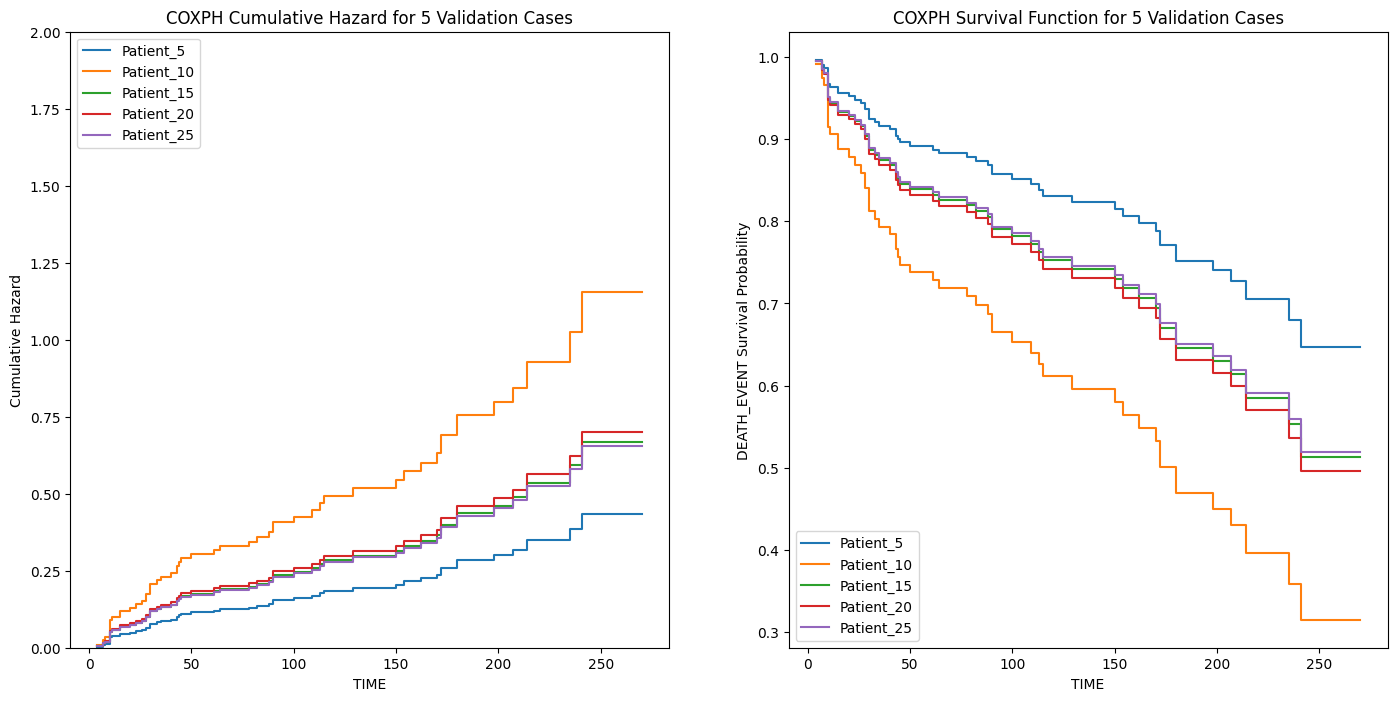

In [150]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 validation cases
##################################
validation_case = X_validation.iloc[[5, 10, 15, 20, 25]]
validation_case_labels = ['Patient_5','Patient_10','Patient_15','Patient_20','Patient_25',]
validation_case_cumulative_hazard_function = optimal_coxph_model.predict_cumulative_hazard_function(validation_case)
validation_case_survival_function = optimal_coxph_model.predict_survival_function(validation_case)

fig, ax = plt.subplots(1,2,figsize=(17, 8))
for hazard_prediction, survival_prediction in zip(validation_case_cumulative_hazard_function, validation_case_survival_function):
    ax[0].step(hazard_prediction.x,hazard_prediction(hazard_prediction.x),where='post')
    ax[1].step(survival_prediction.x,survival_prediction(survival_prediction.x),where='post')
ax[0].set_title('COXPH Cumulative Hazard for 5 Validation Cases')
ax[0].set_xlabel('TIME')
ax[0].set_ylim(0,2)
ax[0].set_ylabel('Cumulative Hazard')
ax[0].legend(validation_case_labels, loc="upper left")
ax[1].set_title('COXPH Survival Function for 5 Validation Cases')
ax[1].set_xlabel('TIME')
ax[1].set_ylabel('DEATH_EVENT Survival Probability')
ax[1].legend(validation_case_labels, loc="lower left")
plt.show()

In [151]:
##################################
# Saving the best Cox Proportional Hazards Regression Model
# developed from the original training data
################################## 
joblib.dump(coxph_best_model_train_cv, 
            os.path.join("..", MODELS_PATH, "coxph_best_model.pkl"))

['..\\models\\coxph_best_model.pkl']

### 1.6.5 Cox Net Survival Model Fitting | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.5"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Net Survival](https://doi.org/10.18637/jss.v039.i05) is a regularized version of the Cox Proportional Hazards model, which incorporates both L1 (Lasso) and L2 (Ridge) penalties. The model is useful when dealing with high-dimensional data where the number of predictors can be larger than the number of observations. The elastic net penalty helps in both variable selection (via L1) and multicollinearity handling (via L2). As a method, it can handle high-dimensional data and perform variable selection. Additionally, it balances between L1 and L2 penalties, offering flexibility in modeling. However, the process requires tuning of penalty parameters, which can be computationally intensive. Additionally, interpretation is more complex due to the regularization terms. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves defining the penalized partial likelihood function, incorporating both L1 (Lasso) and L2 (Ridge) penalties; application of regularization techniques to estimate the regression coefficients by maximizing the penalized log-partial likelihood; performing cross-validation to select optimal values for the penalty parameters (alpha and l1_ratio); and the calculation of the hazard function and survival function for new data using the estimated regularized coefficients.

1. The [cox net survival model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxnetSurvivalAnalysis.html) from the <mark style="background-color: #CCECFF"><b>sksurv.linear_model</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">l1_ratio</span> = ElasticNet mixing parameter made to vary between 0.10, 0.50 and 1.00
    * <span style="color: #FF0000">alpha_min_ratio</span> = minimum alpha of the regularization path made to vary between 0.0001 and 0.01
3. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the concordance index determined for: 
    * <span style="color: #FF0000">l1_ratio</span> = 0.10
    * <span style="color: #FF0000">alpha_min_ratio</span> = 0.01
4. The cross-validated model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.7199
5. The apparent model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.7417
6. The independent validation model performance of the final model is summarized as follows:
    * **Concordance Index** = 0.7162
7. Considerable difference in the apparent and cross-validated model performance observed, indicative of the presence of moderate model overfitting.
8. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
9. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.
    

In [152]:
##################################
# Performing hyperparameter tuning
# through K-fold cross-validation
# using the Cox Proportional Hazards Regression Model
##################################
coxns_grid_search.fit(X_train, y_train_array)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=88888888, shuffle=True),
             estimator=Pipeline(steps=[('yeo_johnson', PowerTransformer()),
                                       ('coxns', CoxnetSurvivalAnalysis())]),
             n_jobs=-1,
             param_grid={'coxns__alpha_min_ratio': [0.0001, 0.01],
                         'coxns__fit_baseline_model': [True],
                         'coxns__l1_ratio': [0.1, 0.5, 1.0]},
             verbose=1)

In [153]:
##################################
# Summarizing the hyperparameter tuning 
# results from K-fold cross-validation
##################################
coxns_grid_search_results = pd.DataFrame(coxns_grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
coxns_grid_search_results.loc[:, ~coxns_grid_search_results.columns.str.endswith('_time')]

,param_coxns__alpha_min_ratio,param_coxns__fit_baseline_model,param_coxns__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.0100,True,0.1,"{'coxns__alpha_min_ratio': 0.01, 'coxns__fit_b...",0.761468,0.702786,0.790816,0.844444,0.500000,0.719903,0.119094,1
0,0.0001,True,0.1,"{'coxns__alpha_min_ratio': 0.0001, 'coxns__fit...",0.761468,0.702786,0.790816,0.848889,0.492857,0.719363,0.122666,2
1,0.0001,True,0.5,"{'coxns__alpha_min_ratio': 0.0001, 'coxns__fit...",0.761468,0.702786,0.785714,0.848889,0.492857,0.718343,0.122087,3
2,0.0001,True,1.0,"{'coxns__alpha_min_ratio': 0.0001, 'coxns__fit...",0.761468,0.702786,0.785714,0.848889,0.492857,0.718343,0.122087,3
4,0.0100,True,0.5,"{'coxns__alpha_min_ratio': 0.01, 'coxns__fit_b...",0.761468,0.702786,0.785714,0.848889,0.492857,0.718343,0.122087,3
5,0.0100,True,1.0,"{'coxns__alpha_min_ratio': 0.01, 'coxns__fit_b...",0.761468,0.702786,0.785714,0.848889,0.492857,0.718343,0.122087,3


In [154]:
##################################
# Identifying the best model
##################################
coxns_best_model_train_cv = coxns_grid_search.best_estimator_
print('Best Cox Proportional Hazards Regression Model using the Cross-Validated Train Data: ')
print(f"Best Model Parameters: {coxns_grid_search.best_params_}")

Best Cox Proportional Hazards Regression Model using the Cross-Validated Train Data: 
Best Model Parameters: {'coxns__alpha_min_ratio': 0.01, 'coxns__fit_baseline_model': True, 'coxns__l1_ratio': 0.1}


In [155]:
##################################
# Obtaining the cross-validation model performance of the 
# optimal Cox Net Survival Model
# on the train set
##################################
optimal_coxns_heart_failure_y_crossvalidation_ci = coxns_grid_search.best_score_
print(f"Cross-Validation Concordance Index: {optimal_coxns_heart_failure_y_crossvalidation_ci}")

Cross-Validation Concordance Index: 0.7199030077184584


In [156]:
##################################
# Formulating a Cox Net Survival Model
# with optimal hyperparameters
##################################
optimal_coxns_model = coxns_grid_search.best_estimator_
optimal_coxns_model.fit(X_train, y_train_array)

Pipeline(steps=[('yeo_johnson', PowerTransformer()),
                ('coxns',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01,
                                        fit_baseline_model=True,
                                        l1_ratio=0.1))])

In [157]:
##################################
# Measuring model performance of the 
# optimal Cox Net Survival Model
# on the train set
##################################
optimal_coxns_heart_failure_y_train_pred = optimal_coxns_model.predict(X_train)
optimal_coxns_heart_failure_y_train_ci = concordance_index_censored(y_train_array['DEATH_EVENT'], 
                                                                    y_train_array['TIME'], 
                                                                    optimal_coxns_heart_failure_y_train_pred)[0]
print(f"Apparent Concordance Index: {optimal_coxns_heart_failure_y_train_ci}")

Apparent Concordance Index: 0.7417810405362273


In [158]:
##################################
# Measuring model performance of the 
# optimal Cox Net Survival Model
# on the validation set
##################################
optimal_coxns_heart_failure_y_validation_pred = optimal_coxns_model.predict(X_validation)
optimal_coxns_heart_failure_y_validation_ci = concordance_index_censored(y_validation_array['DEATH_EVENT'], 
                                                                         y_validation_array['TIME'], 
                                                                         optimal_coxns_heart_failure_y_validation_pred)[0]
print(f"Validation Concordance Index: {optimal_coxns_heart_failure_y_validation_ci}")

Validation Concordance Index: 0.7162346521145976


In [159]:
##################################
# Gathering the concordance indices
# from the train and tests sets for 
# Cox Net Survival Model
##################################
coxns_set = pd.DataFrame(["Train","Cross-Validation","Validation"])
coxns_ci_values = pd.DataFrame([optimal_coxns_heart_failure_y_train_ci,
                                optimal_coxns_heart_failure_y_crossvalidation_ci,
                                optimal_coxns_heart_failure_y_validation_ci])
coxns_method = pd.DataFrame(["COXNS"]*3)
coxns_summary = pd.concat([coxns_set, 
                           coxns_ci_values,
                           coxns_method], axis=1)
coxns_summary.columns = ['Set', 'Concordance.Index', 'Method']
coxns_summary.reset_index(inplace=True, drop=True)
display(coxns_summary)

,Set,Concordance.Index,Method
0,Train,0.741781,COXNS
1,Cross-Validation,0.719903,COXNS
2,Validation,0.716235,COXNS


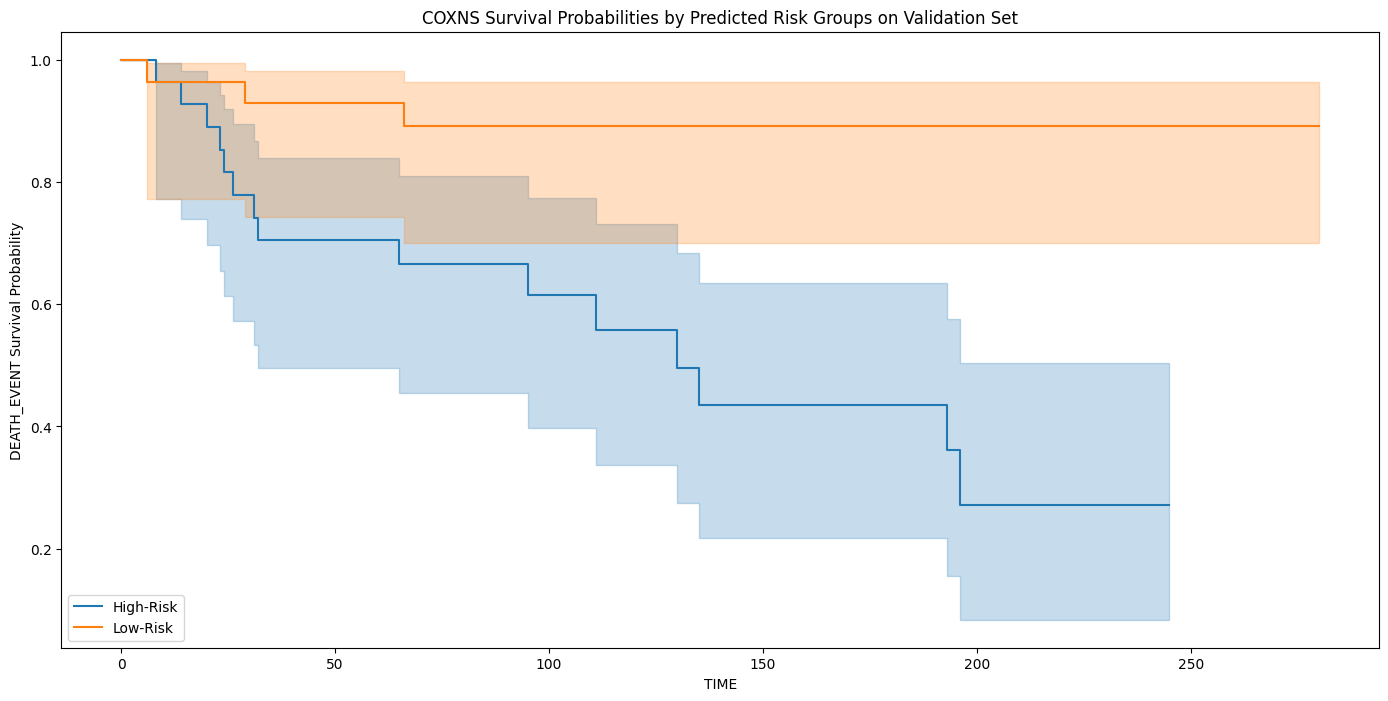

In [160]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
heart_failure_validation.reset_index(drop=True, inplace=True)
kmf = KaplanMeierFitter()
heart_failure_validation['Predicted_Risks_CoxNS'] = optimal_coxns_heart_failure_y_validation_pred
heart_failure_validation['Predicted_RiskGroups_CoxNS'] = risk_groups = pd.qcut(heart_failure_validation['Predicted_Risks_CoxNS'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = heart_failure_validation[risk_groups == group]
    kmf.fit(group_data['TIME'], event_observed=group_data['DEATH_EVENT'], label=group)
    kmf.plot_survival_function()

plt.title('COXNS Survival Probabilities by Predicted Risk Groups on Validation Set')
plt.xlabel('TIME')
plt.ylabel('DEATH_EVENT Survival Probability')
plt.show()

In [161]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
validation_case_details = X_validation.iloc[[5, 10, 15, 20, 25]]
display(validation_case_details)

,AGE,ANAEMIA,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,SERUM_CREATININE,SERUM_SODIUM
291,60.0,0,35.0,0,1.4,139.0
66,42.0,1,15.0,0,1.3,136.0
112,50.0,0,25.0,0,1.6,136.0
89,57.0,1,25.0,1,1.1,144.0
17,45.0,0,14.0,0,0.8,127.0


In [162]:
##################################
# Gathering the event and duration information
# for 5 test case samples
##################################
print(y_validation_array[[5, 10, 15, 20, 25]])

[(False, 258) ( True,  65) (False,  90) (False,  79) ( True,  14)]


In [163]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(heart_failure_validation.loc[[5, 10, 15, 20, 25]][['Predicted_RiskGroups_CoxNS']])

   Predicted_RiskGroups_CoxNS
5                    Low-Risk
10                  High-Risk
15                  High-Risk
20                  High-Risk
25                  High-Risk


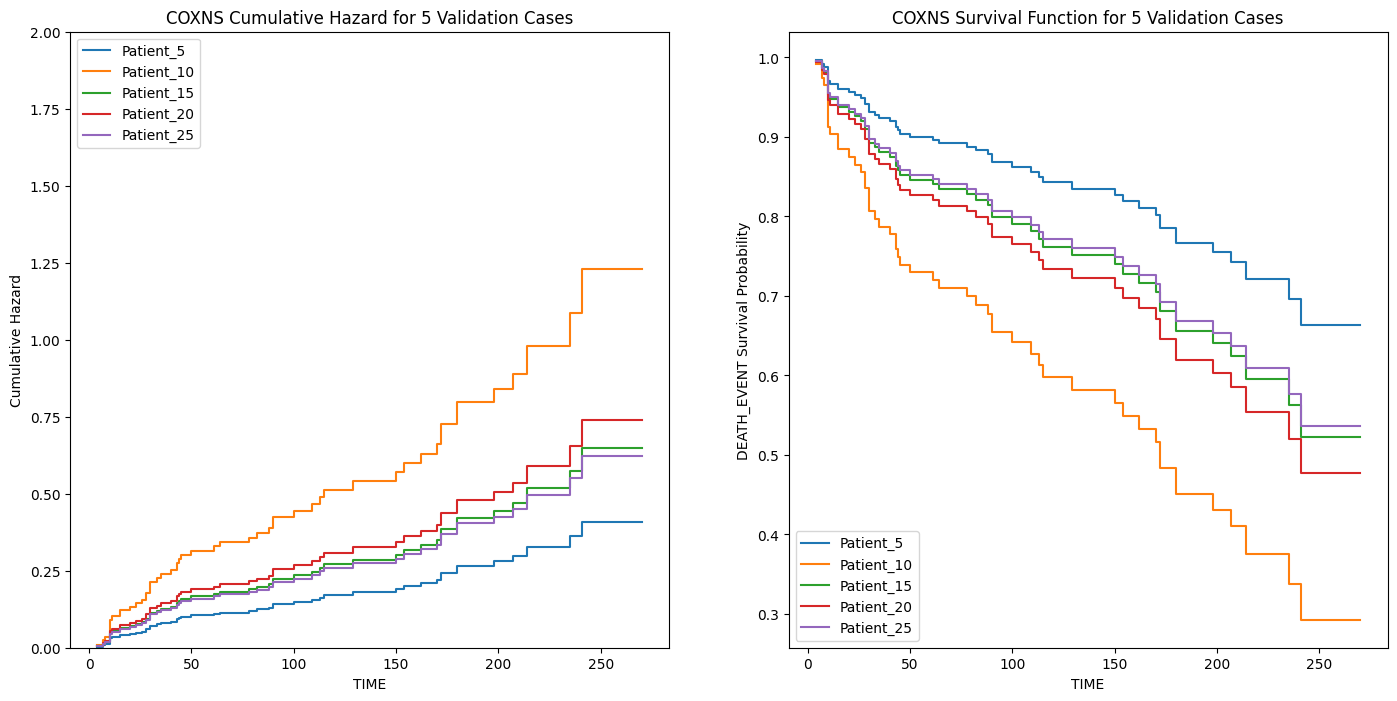

In [164]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 validation cases
##################################
validation_case = X_validation.iloc[[5, 10, 15, 20, 25]]
validation_case_labels = ['Patient_5','Patient_10','Patient_15','Patient_20','Patient_25',]
validation_case_cumulative_hazard_function = optimal_coxns_model.predict_cumulative_hazard_function(validation_case)
validation_case_survival_function = optimal_coxns_model.predict_survival_function(validation_case)

fig, ax = plt.subplots(1,2,figsize=(17, 8))
for hazard_prediction, survival_prediction in zip(validation_case_cumulative_hazard_function, validation_case_survival_function):
    ax[0].step(hazard_prediction.x,hazard_prediction(hazard_prediction.x),where='post')
    ax[1].step(survival_prediction.x,survival_prediction(survival_prediction.x),where='post')
ax[0].set_title('COXNS Cumulative Hazard for 5 Validation Cases')
ax[0].set_xlabel('TIME')
ax[0].set_ylim(0,2)
ax[0].set_ylabel('Cumulative Hazard')
ax[0].legend(validation_case_labels, loc="upper left")
ax[1].set_title('COXNS Survival Function for 5 Validation Cases')
ax[1].set_xlabel('TIME')
ax[1].set_ylabel('DEATH_EVENT Survival Probability')
ax[1].legend(validation_case_labels, loc="lower left")
plt.show()

In [165]:
##################################
# Saving the best Cox Proportional Hazards Regression Model
# developed from the original training data
################################## 
joblib.dump(coxns_best_model_train_cv, 
            os.path.join("..", MODELS_PATH, "coxns_best_model.pkl"))

['..\\models\\coxns_best_model.pkl']

### 1.6.6 Survival Tree Model Fitting | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.6"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Survival Trees](https://www.tandfonline.com/doi/abs/10.1080/01621459.1993.10476296) are non-parametric models that partition the data into subgroups (nodes) based on the values of predictor variables, creating a tree-like structure. The tree is built by recursively splitting the data at nodes where the differences in survival times between subgroups are maximized. Each terminal node represents a different survival function. The method have no assumptions about the underlying distribution of survival times, can capture interactions between variables naturally and applies an interpretable visual representation. However, the process can be prone to overfitting, especially with small datasets, and may be less accurate compared to ensemble methods like Random Survival Forest. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves recursively splitting the data at nodes to maximize the differences in survival times between subgroups with the splitting criteria often involving statistical tests (e.g., log-rank test); choosing the best predictor variable and split point at each node that maximizes the separation of survival times; continuously splitting until stopping criteria are met (e.g., minimum number of observations in a node, maximum tree depth); and estimating the survival function based on the survival times of the observations at each terminal node.

1. The [survival tree model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.tree.SurvivalTree.html) from the <mark style="background-color: #CCECFF"><b>sksurv.tree</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">min_samples_split</span> = minimum number of samples required to split an internal node made to vary between 10, 15 and 20
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 3 and 6
3. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the concordance index determined for: 
    * <span style="color: #FF0000">min_samples_split</span> = 15
    * <span style="color: #FF0000">min_samples_leaf</span> = 6
4. The cross-validated model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.6989
5. The apparent model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.8313
6. The independent validation model performance of the final model is summarized as follows:
    * **Concordance Index** = 0.6548
7. Significant difference in the apparent and cross-validated model performance observed, indicative of the presence of excessive model overfitting.
8. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated non-optimal differentiation across the entire duration.
9. Hazard and survival probability estimations for 5 sampled cases demonstrated non-optimal profiles.
    

In [166]:
##################################
# Performing hyperparameter tuning
# through K-fold cross-validation
# using the Survival Tree Model
##################################
stree_grid_search.fit(X_train, y_train_array)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=88888888, shuffle=True),
             estimator=Pipeline(steps=[('yeo_johnson', PowerTransformer()),
                                       ('stree', SurvivalTree())]),
             n_jobs=-1,
             param_grid={'stree__min_samples_leaf': [3, 6],
                         'stree__min_samples_split': [10, 15, 20],
                         'stree__random_state': [88888888]},
             verbose=1)

In [167]:
##################################
# Summarizing the hyperparameter tuning 
# results from K-fold cross-validation
##################################
stree_grid_search_results = pd.DataFrame(stree_grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
stree_grid_search_results.loc[:, ~stree_grid_search_results.columns.str.endswith('_time')]

,param_stree__min_samples_leaf,param_stree__min_samples_split,param_stree__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,6,15,88888888,"{'stree__min_samples_leaf': 6, 'stree__min_sam...",0.743119,0.687307,0.798469,0.726667,0.539286,0.698970,0.087466,1
3,6,10,88888888,"{'stree__min_samples_leaf': 6, 'stree__min_sam...",0.718654,0.681115,0.801020,0.724444,0.546429,0.694332,0.083583,2
5,6,20,88888888,"{'stree__min_samples_leaf': 6, 'stree__min_sam...",0.749235,0.710526,0.721939,0.726667,0.560714,0.693816,0.067730,3
2,3,20,88888888,"{'stree__min_samples_leaf': 3, 'stree__min_sam...",0.669725,0.690402,0.653061,0.777778,0.553571,0.668908,0.071929,4
1,3,15,88888888,"{'stree__min_samples_leaf': 3, 'stree__min_sam...",0.669725,0.673375,0.673469,0.746667,0.564286,0.665504,0.058268,5
0,3,10,88888888,"{'stree__min_samples_leaf': 3, 'stree__min_sam...",0.646789,0.684211,0.678571,0.691111,0.582143,0.656565,0.040190,6


In [168]:
##################################
# Identifying the best model
##################################
stree_best_model_train_cv = stree_grid_search.best_estimator_
print('Best Survival Tree Model using the Cross-Validated Train Data: ')
print(f"Best Model Parameters: {stree_grid_search.best_params_}")

Best Survival Tree Model using the Cross-Validated Train Data: 
Best Model Parameters: {'stree__min_samples_leaf': 6, 'stree__min_samples_split': 15, 'stree__random_state': 88888888}


In [169]:
##################################
# Obtaining the cross-validation model performance of the 
# optimal Survival Tree Model
# on the train set
##################################
optimal_stree_heart_failure_y_crossvalidation_ci = stree_grid_search.best_score_
print(f"Cross-Validation Concordance Index: {optimal_stree_heart_failure_y_crossvalidation_ci}")

Cross-Validation Concordance Index: 0.6989695072621033


In [170]:
##################################
# Formulating a Survival Tree Model
# with optimal hyperparameters
##################################
optimal_stree_model = stree_grid_search.best_estimator_
optimal_stree_model.fit(X_train, y_train_array)

Pipeline(steps=[('yeo_johnson', PowerTransformer()),
                ('stree',
                 SurvivalTree(min_samples_leaf=6, min_samples_split=15,
                              random_state=88888888))])

In [171]:
##################################
# Measuring model performance of the 
# optimal Survival Tree Model
# on the train set
##################################
optimal_stree_heart_failure_y_train_pred = optimal_stree_model.predict(X_train)
optimal_stree_heart_failure_y_train_ci = concordance_index_censored(y_train_array['DEATH_EVENT'], 
                                                                    y_train_array['TIME'], 
                                                                    optimal_stree_heart_failure_y_train_pred)[0]
print(f"Apparent Concordance Index: {optimal_stree_heart_failure_y_train_ci}")

Apparent Concordance Index: 0.831391637408235


In [172]:
##################################
# Measuring model performance of the 
# optimal Survival Tree Model
# on the validation set
##################################
optimal_stree_heart_failure_y_validation_pred = optimal_stree_model.predict(X_validation)
optimal_stree_heart_failure_y_validation_ci = concordance_index_censored(y_validation_array['DEATH_EVENT'], 
                                                                         y_validation_array['TIME'], 
                                                                         optimal_stree_heart_failure_y_validation_pred)[0]
print(f"Validation Concordance Index: {optimal_stree_heart_failure_y_validation_ci}")

Validation Concordance Index: 0.654843110504775


In [173]:
##################################
# Gathering the concordance indices
# from the train and tests sets for 
# Survival Tree Model
##################################
stree_set = pd.DataFrame(["Train","Cross-Validation","Validation"])
stree_ci_values = pd.DataFrame([optimal_stree_heart_failure_y_train_ci,
                                optimal_stree_heart_failure_y_crossvalidation_ci,
                                optimal_stree_heart_failure_y_validation_ci])
stree_method = pd.DataFrame(["STREE"]*3)
stree_summary = pd.concat([stree_set, 
                           stree_ci_values,
                           stree_method], axis=1)
stree_summary.columns = ['Set', 'Concordance.Index', 'Method']
stree_summary.reset_index(inplace=True, drop=True)
display(stree_summary)

,Set,Concordance.Index,Method
0,Train,0.831392,STREE
1,Cross-Validation,0.698970,STREE
2,Validation,0.654843,STREE


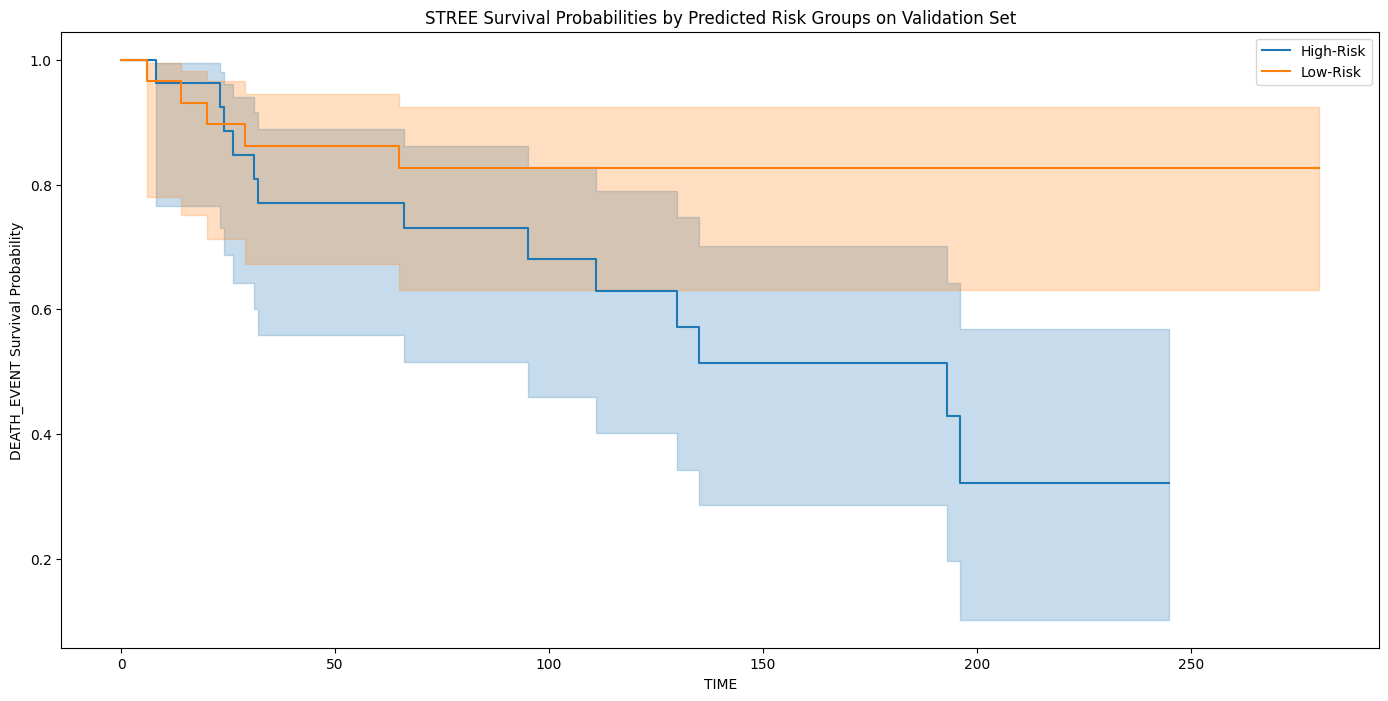

In [174]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
heart_failure_validation.reset_index(drop=True, inplace=True)
kmf = KaplanMeierFitter()
heart_failure_validation['Predicted_Risks_STree'] = optimal_stree_heart_failure_y_validation_pred
heart_failure_validation['Predicted_RiskGroups_STree'] = risk_groups = pd.qcut(heart_failure_validation['Predicted_Risks_STree'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = heart_failure_validation[risk_groups == group]
    kmf.fit(group_data['TIME'], event_observed=group_data['DEATH_EVENT'], label=group)
    kmf.plot_survival_function()

plt.title('STREE Survival Probabilities by Predicted Risk Groups on Validation Set')
plt.xlabel('TIME')
plt.ylabel('DEATH_EVENT Survival Probability')
plt.show()

In [175]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
validation_case_details = X_validation.iloc[[5, 10, 15, 20, 25]]
display(validation_case_details)

,AGE,ANAEMIA,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,SERUM_CREATININE,SERUM_SODIUM
291,60.0,0,35.0,0,1.4,139.0
66,42.0,1,15.0,0,1.3,136.0
112,50.0,0,25.0,0,1.6,136.0
89,57.0,1,25.0,1,1.1,144.0
17,45.0,0,14.0,0,0.8,127.0


In [176]:
##################################
# Gathering the event and duration information
# for 5 test case samples
##################################
print(y_validation_array[[5, 10, 15, 20, 25]])

[(False, 258) ( True,  65) (False,  90) (False,  79) ( True,  14)]


In [177]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(heart_failure_validation.loc[[5, 10, 15, 20, 25]][['Predicted_RiskGroups_STree']])

   Predicted_RiskGroups_STree
5                    Low-Risk
10                   Low-Risk
15                   Low-Risk
20                  High-Risk
25                   Low-Risk


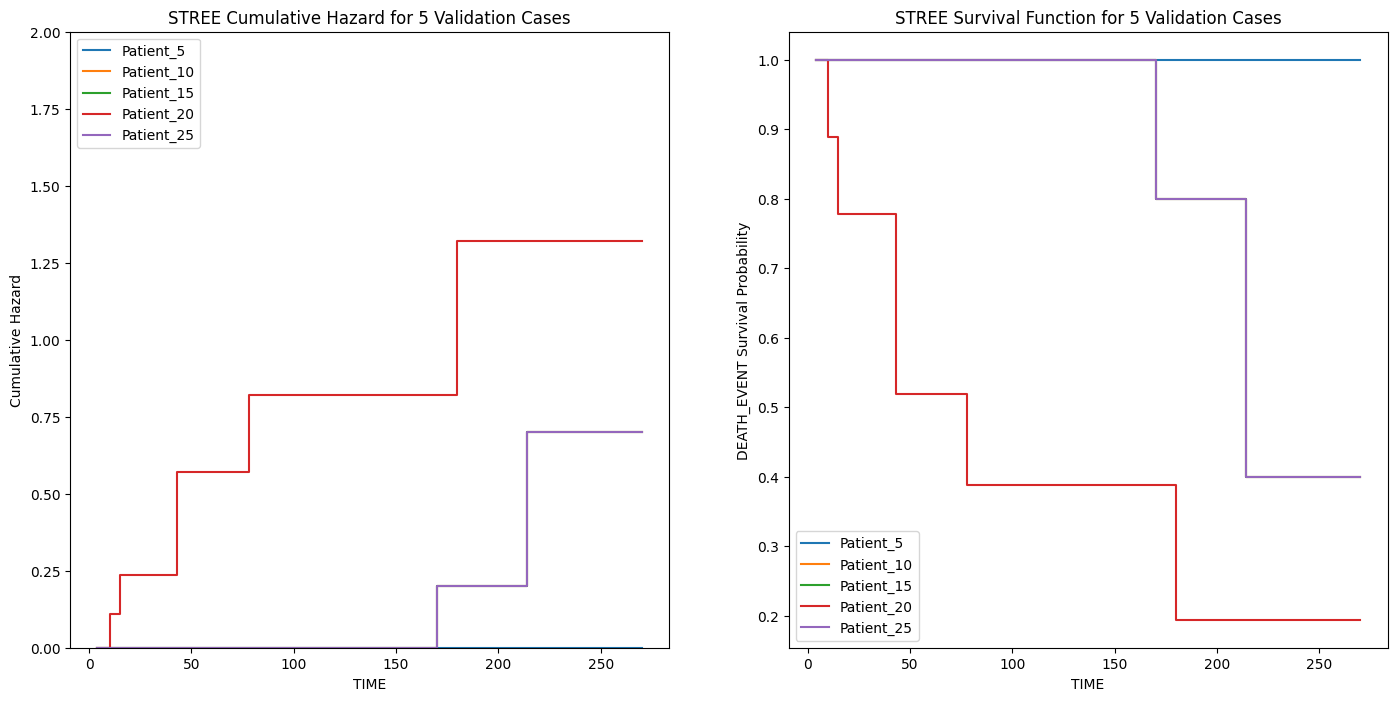

In [178]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 validation cases
##################################
validation_case = X_validation.iloc[[5, 10, 15, 20, 25]]
validation_case_labels = ['Patient_5','Patient_10','Patient_15','Patient_20','Patient_25',]
validation_case_cumulative_hazard_function = optimal_stree_model.predict_cumulative_hazard_function(validation_case)
validation_case_survival_function = optimal_stree_model.predict_survival_function(validation_case)

fig, ax = plt.subplots(1,2,figsize=(17, 8))
for hazard_prediction, survival_prediction in zip(validation_case_cumulative_hazard_function, validation_case_survival_function):
    ax[0].step(hazard_prediction.x,hazard_prediction(hazard_prediction.x),where='post')
    ax[1].step(survival_prediction.x,survival_prediction(survival_prediction.x),where='post')
ax[0].set_title('STREE Cumulative Hazard for 5 Validation Cases')
ax[0].set_xlabel('TIME')
ax[0].set_ylim(0,2)
ax[0].set_ylabel('Cumulative Hazard')
ax[0].legend(validation_case_labels, loc="upper left")
ax[1].set_title('STREE Survival Function for 5 Validation Cases')
ax[1].set_xlabel('TIME')
ax[1].set_ylabel('DEATH_EVENT Survival Probability')
ax[1].legend(validation_case_labels, loc="lower left")
plt.show()

In [179]:
##################################
# Saving the best Survival Tree Model
# developed from the original training data
################################## 
joblib.dump(stree_best_model_train_cv, 
            os.path.join("..", MODELS_PATH, "stree_best_model.pkl"))

['..\\models\\stree_best_model.pkl']

### 1.6.7 Random Survival Forest Model Fitting | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.7"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Random Survival Forest](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-2/issue-3/Random-survival-forests/10.1214/08-AOAS169.full) is an ensemble method that builds multiple survival trees and averages their predictions. The model combines the predictions of multiple survival trees, each built on a bootstrap sample of the data and a random subset of predictors. It uses the concept of ensemble learning to improve predictive accuracy and robustness. As a method, it handles high-dimensional data and complex interactions between variables well; can be more accurate and robust than a single survival tree; and provides measures of variable importance. However, the process can be bomputationally intensive due to the need to build multiple trees, and may be less interpretable than single trees or parametric models like the Cox model. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves generating multiple bootstrap samples from the original dataset; building a survival tree by recursively splitting the data at nodes using a random subset of predictor variables for each bootstrap sample; combining the predictions of all survival trees to form the random survival forest and averaging the survival functions predicted by all trees in the forest to obtain the final survival function for new data.

1. The [random survival forest model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.RandomSurvivalForest.html) from the <mark style="background-color: #CCECFF"><b>sksurv.ensemble</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">n_estimators</span> = number of trees in the forest made to vary between 100, 200 and 300
    * <span style="color: #FF0000">min_samples_split</span> = minimum number of samples required to split an internal node made to vary between 10, 15 and 20
3. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the concordance index determined for: 
    * <span style="color: #FF0000">n_estimators</span> = 100
    * <span style="color: #FF0000">min_samples_split</span> = 15
4. The cross-validated model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.7258
5. The apparent model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.8506
6. The independent test model performance of the final model is summarized as follows:
    * **Concordance Index** = 0.6780
7. Significant difference in the apparent and cross-validated model performance observed, indicative of the presence of excessive model overfitting.
8. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
9. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.

In [180]:
##################################
# Performing hyperparameter tuning
# through K-fold cross-validation
# using the Random Survival Forest Model
##################################
rsf_grid_search.fit(X_train, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=88888888, shuffle=True),
             estimator=Pipeline(steps=[('yeo_johnson', PowerTransformer()),
                                       ('rsf', RandomSurvivalForest())]),
             n_jobs=-1,
             param_grid={'rsf__min_samples_split': [10, 15, 20],
                         'rsf__n_estimators': [100, 200, 300],
                         'rsf__random_state': [88888888]},
             verbose=1)

In [181]:
##################################
# Summarizing the hyperparameter tuning 
# results from K-fold cross-validation
##################################
rsf_grid_search_results = pd.DataFrame(rsf_grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
rsf_grid_search_results.loc[:, ~rsf_grid_search_results.columns.str.endswith('_time')]

,param_rsf__min_samples_split,param_rsf__n_estimators,param_rsf__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,15,100,88888888,"{'rsf__min_samples_split': 15, 'rsf__n_estimat...",0.761468,0.705882,0.724490,0.844444,0.592857,0.725828,0.081757,1
5,15,300,88888888,"{'rsf__min_samples_split': 15, 'rsf__n_estimat...",0.737003,0.715170,0.729592,0.835556,0.592857,0.722036,0.077333,2
4,15,200,88888888,"{'rsf__min_samples_split': 15, 'rsf__n_estimat...",0.730887,0.705882,0.729592,0.848889,0.585714,0.720193,0.083731,3
6,20,100,88888888,"{'rsf__min_samples_split': 20, 'rsf__n_estimat...",0.743119,0.712074,0.729592,0.840000,0.564286,0.717814,0.088671,4
8,20,300,88888888,"{'rsf__min_samples_split': 20, 'rsf__n_estimat...",0.730887,0.708978,0.724490,0.844444,0.571429,0.716046,0.086881,5
7,20,200,88888888,"{'rsf__min_samples_split': 20, 'rsf__n_estimat...",0.730887,0.712074,0.739796,0.840000,0.550000,0.714551,0.093514,6
2,10,300,88888888,"{'rsf__min_samples_split': 10, 'rsf__n_estimat...",0.730887,0.708978,0.714286,0.835556,0.578571,0.713656,0.081764,7
0,10,100,88888888,"{'rsf__min_samples_split': 10, 'rsf__n_estimat...",0.730887,0.699690,0.719388,0.848889,0.564286,0.712628,0.090685,8
1,10,200,88888888,"{'rsf__min_samples_split': 10, 'rsf__n_estimat...",0.730887,0.693498,0.719388,0.831111,0.571429,0.709263,0.083263,9


In [182]:
##################################
# Identifying the best model
##################################
rsf_best_model_train_cv = rsf_grid_search.best_estimator_
print('Best Random Survival Forest Model using the Cross-Validated Train Data: ')
print(f"Best Model Parameters: {rsf_grid_search.best_params_}")

Best Random Survival Forest Model using the Cross-Validated Train Data: 
Best Model Parameters: {'rsf__min_samples_split': 15, 'rsf__n_estimators': 100, 'rsf__random_state': 88888888}


In [183]:
##################################
# Obtaining the cross-validation model performance of the 
# optimal Random Survival Forest Model
# on the train set
##################################
optimal_rsf_heart_failure_y_crossvalidation_ci = rsf_grid_search.best_score_
print(f"Cross-Validation Concordance Index: {optimal_rsf_heart_failure_y_crossvalidation_ci}")

Cross-Validation Concordance Index: 0.7258283252138776


In [184]:
##################################
# Formulating a Random Survival Forest Model
# with optimal hyperparameters
##################################
optimal_rsf_model = rsf_grid_search.best_estimator_
optimal_rsf_model.fit(X_train, y_train_array)

Pipeline(steps=[('yeo_johnson', PowerTransformer()),
                ('rsf',
                 RandomSurvivalForest(min_samples_split=15,
                                      random_state=88888888))])

In [185]:
##################################
# Measuring model performance of the 
# optimal Random Survival Forest Model
# on the train set
##################################
optimal_rsf_heart_failure_y_train_pred = optimal_rsf_model.predict(X_train)
optimal_rsf_heart_failure_y_train_ci = concordance_index_censored(y_train_array['DEATH_EVENT'],
                                                                  y_train_array['TIME'], 
                                                                  optimal_rsf_heart_failure_y_train_pred)[0]
print(f"Apparent Concordance Index: {optimal_rsf_heart_failure_y_train_ci}")

Apparent Concordance Index: 0.8506224066390041


In [186]:
##################################
# Measuring model performance of the 
# optimal Random Survival Forest Model
# on the validation set
##################################
optimal_rsf_heart_failure_y_validation_pred = optimal_rsf_model.predict(X_validation)
optimal_rsf_heart_failure_y_validation_ci = concordance_index_censored(y_validation_array['DEATH_EVENT'], 
                                                                       y_validation_array['TIME'], 
                                                                       optimal_rsf_heart_failure_y_validation_pred)[0]
print(f"Validation Concordance Index: {optimal_rsf_heart_failure_y_validation_ci}")

Validation Concordance Index: 0.6780354706684857


In [187]:
##################################
# Gathering the concordance indices
# from the train and tests sets for 
# Random Survival Forest Model
##################################
rsf_set = pd.DataFrame(["Train","Cross-Validation","Validation"])
rsf_ci_values = pd.DataFrame([optimal_rsf_heart_failure_y_train_ci,
                              optimal_rsf_heart_failure_y_crossvalidation_ci,
                              optimal_rsf_heart_failure_y_validation_ci])
rsf_method = pd.DataFrame(["RSF"]*3)
rsf_summary = pd.concat([rsf_set, 
                         rsf_ci_values,
                         rsf_method], axis=1)
rsf_summary.columns = ['Set', 'Concordance.Index', 'Method']
rsf_summary.reset_index(inplace=True, drop=True)
display(rsf_summary)

,Set,Concordance.Index,Method
0,Train,0.850622,RSF
1,Cross-Validation,0.725828,RSF
2,Validation,0.678035,RSF


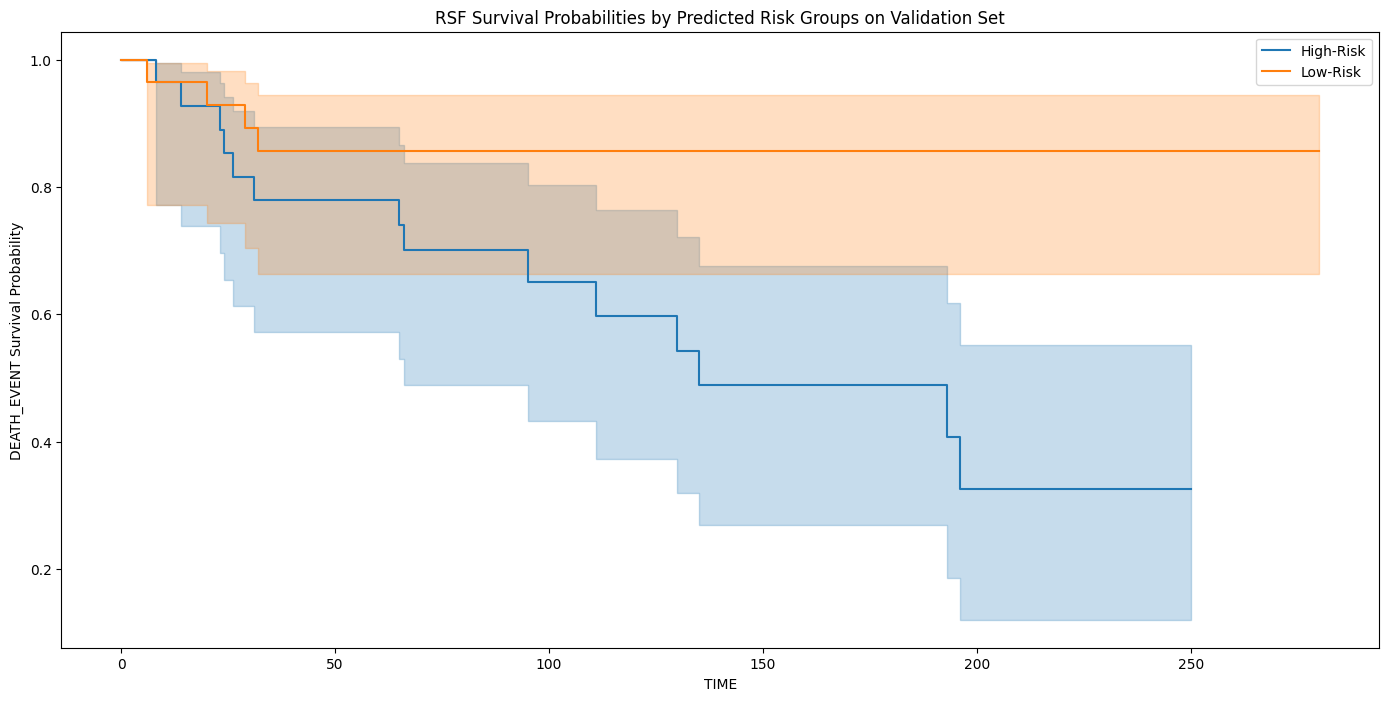

In [188]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
heart_failure_validation.reset_index(drop=True, inplace=True)
kmf = KaplanMeierFitter()
heart_failure_validation['Predicted_Risks_RSF'] = optimal_rsf_heart_failure_y_validation_pred
heart_failure_validation['Predicted_RiskGroups_RSF'] = risk_groups = pd.qcut(heart_failure_validation['Predicted_Risks_RSF'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = heart_failure_validation[risk_groups == group]
    kmf.fit(group_data['TIME'], event_observed=group_data['DEATH_EVENT'], label=group)
    kmf.plot_survival_function()

plt.title('RSF Survival Probabilities by Predicted Risk Groups on Validation Set')
plt.xlabel('TIME')
plt.ylabel('DEATH_EVENT Survival Probability')
plt.show()

In [189]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
validation_case_details = X_validation.iloc[[5, 10, 15, 20, 25]]
display(validation_case_details)

,AGE,ANAEMIA,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,SERUM_CREATININE,SERUM_SODIUM
291,60.0,0,35.0,0,1.4,139.0
66,42.0,1,15.0,0,1.3,136.0
112,50.0,0,25.0,0,1.6,136.0
89,57.0,1,25.0,1,1.1,144.0
17,45.0,0,14.0,0,0.8,127.0


In [190]:
##################################
# Gathering the event and duration information
# for 5 test case samples
##################################
print(y_validation_array[[5, 10, 15, 20, 25]])

[(False, 258) ( True,  65) (False,  90) (False,  79) ( True,  14)]


In [191]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(heart_failure_validation.loc[[5, 10, 15, 20, 25]][['Predicted_RiskGroups_RSF']])

   Predicted_RiskGroups_RSF
5                  Low-Risk
10                High-Risk
15                High-Risk
20                High-Risk
25                High-Risk


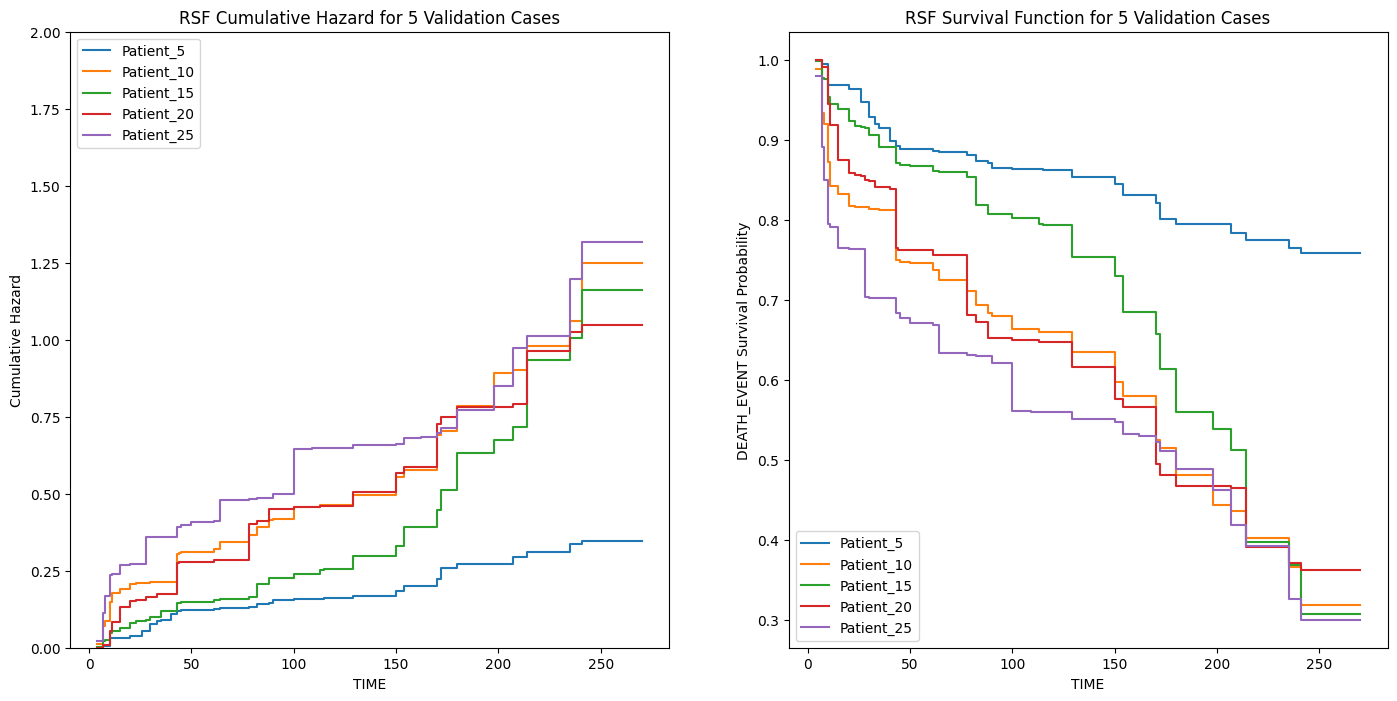

In [192]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 validation cases
##################################
validation_case = X_validation.iloc[[5, 10, 15, 20, 25]]
validation_case_labels = ['Patient_5','Patient_10','Patient_15','Patient_20','Patient_25',]
validation_case_cumulative_hazard_function = optimal_rsf_model.predict_cumulative_hazard_function(validation_case)
validation_case_survival_function = optimal_rsf_model.predict_survival_function(validation_case)

fig, ax = plt.subplots(1,2,figsize=(17, 8))
for hazard_prediction, survival_prediction in zip(validation_case_cumulative_hazard_function, validation_case_survival_function):
    ax[0].step(hazard_prediction.x,hazard_prediction(hazard_prediction.x),where='post')
    ax[1].step(survival_prediction.x,survival_prediction(survival_prediction.x),where='post')
ax[0].set_title('RSF Cumulative Hazard for 5 Validation Cases')
ax[0].set_xlabel('TIME')
ax[0].set_ylim(0,2)
ax[0].set_ylabel('Cumulative Hazard')
ax[0].legend(validation_case_labels, loc="upper left")
ax[1].set_title('RSF Survival Function for 5 Validation Cases')
ax[1].set_xlabel('TIME')
ax[1].set_ylabel('DEATH_EVENT Survival Probability')
ax[1].legend(validation_case_labels, loc="lower left")
plt.show()

In [193]:
##################################
# Saving the best Random Survival Forest Model
# developed from the original training data
################################## 
joblib.dump(rsf_best_model_train_cv, 
            os.path.join("..", MODELS_PATH, "rsf_best_model.pkl"))

['..\\models\\rsf_best_model.pkl']

### 1.6.8 Gradient Boosted Survival Model Fitting | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.8"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Gradient Boosted Survival](https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boosting-machine/10.1214/aos/1013203451.full) is an ensemble technique that builds a series of survival trees, where each tree tries to correct the errors of the previous one. The model uses boosting, a sequential technique where each new tree is fit to the residuals of the combined previous trees, and combines the predictions of all the trees to produce a final prediction. As a method, it has high predictive accuracy, the ability to model complex relationships, and reduces bias and variance compared to single-tree models. However, the process can even be more computationally intensive than Random Survival Forest, requires careful tuning of multiple hyperparameters, and makes interpretation challenging due to the complex nature of the model. Given a dataset with survival times, event indicators, and predictor variables, the algorithm involves starting with an initial prediction (often the median survival time or a simple model); calculating the residuals (errors) of the current model's predictions; fitting a survival tree to the residuals to learn the errors made by the current model; updating the current model by adding the new tree weighted by a learning rate parameter; repeating previous steps for a fixed number of iterations or until convergence; and summing the predictions of all trees in the sequence to obtain the final survival function for new data.

1. The [gradient boosted survival model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.GradientBoostingSurvivalAnalysis.html) from the <mark style="background-color: #CCECFF"><b>sksurv.ensemble</b></mark> Python library API was implemented. 
2. The model implementation used 2 hyperparameters:
    * <span style="color: #FF0000">n_estimators</span> = number of regression trees to create made to vary between 100, 200 and 300
    * <span style="color: #FF0000">learning_rate</span> = shrinkage parameter for the contribution of each tree made to vary between 0.05, 0.10 and 0.15
3. Hyperparameter tuning was conducted using the 5-fold cross-validation method with optimal model performance using the concordance index determined for: 
    * <span style="color: #FF0000">n_estimators</span> = 100
    * <span style="color: #FF0000">learning_rate</span> = 0.15
4. The cross-validated model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.6937
5. The apparent model performance of the optimal model is summarized as follows:
    * **Concordance Index** = 0.9444
6. The independent test model performance of the final model is summarized as follows:
    * **Concordance Index** = 0.6725
7. Significant difference in the apparent and cross-validated model performance observed, indicative of the presence of excessive model overfitting.
8. Survival probability curves obtained from the groups generated by dichotomizing the risk scores demonstrated sufficient differentiation across the entire duration.
9. Hazard and survival probability estimations for 5 sampled cases demonstrated reasonably smooth profiles.
    

In [194]:
##################################
# Performing hyperparameter tuning
# through K-fold cross-validation
# using the Gradient Boosted Survival Model
##################################
gbs_grid_search.fit(X_train, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=88888888, shuffle=True),
             estimator=Pipeline(steps=[('yeo_johnson', PowerTransformer()),
                                       ('gbs',
                                        GradientBoostingSurvivalAnalysis())]),
             n_jobs=-1,
             param_grid={'gbs__learning_rate': [0.05, 0.1, 0.15],
                         'gbs__n_estimators': [100, 200, 300],
                         'gbs__random_state': [88888888]},
             verbose=1)

In [195]:
##################################
# Summarizing the hyperparameter tuning 
# results from K-fold cross-validation
##################################
gbs_grid_search_results = pd.DataFrame(gbs_grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
gbs_grid_search_results.loc[:, ~gbs_grid_search_results.columns.str.endswith('_time')]

,param_gbs__learning_rate,param_gbs__n_estimators,param_gbs__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.15,200,88888888,"{'gbs__learning_rate': 0.15, 'gbs__n_estimator...",0.691131,0.727554,0.714286,0.764444,0.571429,0.693769,0.065622,1
4,0.10,200,88888888,"{'gbs__learning_rate': 0.1, 'gbs__n_estimators...",0.691131,0.715170,0.704082,0.782222,0.564286,0.691378,0.070898,2
2,0.05,300,88888888,"{'gbs__learning_rate': 0.05, 'gbs__n_estimator...",0.709480,0.708978,0.688776,0.788889,0.550000,0.689225,0.077611,3
8,0.15,300,88888888,"{'gbs__learning_rate': 0.15, 'gbs__n_estimator...",0.697248,0.718266,0.719388,0.737778,0.557143,0.685964,0.065677,4
5,0.10,300,88888888,"{'gbs__learning_rate': 0.1, 'gbs__n_estimators...",0.675841,0.715170,0.698980,0.773333,0.564286,0.685522,0.068648,5
3,0.10,100,88888888,"{'gbs__learning_rate': 0.1, 'gbs__n_estimators...",0.726300,0.721362,0.660714,0.777778,0.521429,0.681517,0.088227,6
6,0.15,100,88888888,"{'gbs__learning_rate': 0.15, 'gbs__n_estimator...",0.691131,0.684211,0.683673,0.768889,0.550000,0.675581,0.070511,7
1,0.05,200,88888888,"{'gbs__learning_rate': 0.05, 'gbs__n_estimator...",0.733945,0.705882,0.668367,0.773333,0.492857,0.674877,0.097281,8
0,0.05,100,88888888,"{'gbs__learning_rate': 0.05, 'gbs__n_estimator...",0.729358,0.671827,0.665816,0.755556,0.500000,0.664511,0.089009,9


In [196]:
##################################
# Identifying the best model
##################################
gbs_best_model_train_cv = gbs_grid_search.best_estimator_
print('Best Gradient Boosted Survival Model using the Cross-Validated Train Data: ')
print(f"Best Model Parameters: {gbs_grid_search.best_params_}")

Best Gradient Boosted Survival Model using the Cross-Validated Train Data: 
Best Model Parameters: {'gbs__learning_rate': 0.15, 'gbs__n_estimators': 200, 'gbs__random_state': 88888888}


In [197]:
##################################
# Obtaining the cross-validation model performance of the 
# optimal Gradient Boosted Survival Model
# on the train set
##################################
optimal_gbs_heart_failure_y_crossvalidation_ci = gbs_grid_search.best_score_
print(f"Cross-Validation Concordance Index: {optimal_gbs_heart_failure_y_crossvalidation_ci}")

Cross-Validation Concordance Index: 0.6937688816392484


In [198]:
##################################
# Formulating a Gradient Boosted Survival Model
# with optimal hyperparameters
##################################
optimal_gbs_model = gbs_grid_search.best_estimator_
optimal_gbs_model.fit(X_train, y_train_array)

Pipeline(steps=[('yeo_johnson', PowerTransformer()),
                ('gbs',
                 GradientBoostingSurvivalAnalysis(learning_rate=0.15,
                                                  n_estimators=200,
                                                  random_state=88888888))])

In [199]:
##################################
# Measuring model performance of the 
# optimal Gradient Boosted Survival Model
# on the train set
##################################
optimal_gbs_heart_failure_y_train_pred = optimal_gbs_model.predict(X_train)
optimal_gbs_heart_failure_y_train_ci = concordance_index_censored(y_train_array['DEATH_EVENT'], 
                                                                    y_train_array['TIME'], 
                                                                    optimal_gbs_heart_failure_y_train_pred)[0]
print(f"Apparent Concordance Index: {optimal_gbs_heart_failure_y_train_ci}")

Apparent Concordance Index: 0.944462176827322


In [200]:
##################################
# Measuring model performance of the 
# optimal Gradient Boosted Survival Model
# on the validation set
##################################
optimal_gbs_heart_failure_y_validation_pred = optimal_gbs_model.predict(X_validation)
optimal_gbs_heart_failure_y_validation_ci = concordance_index_censored(y_validation_array['DEATH_EVENT'], 
                                                                         y_validation_array['TIME'], 
                                                                         optimal_gbs_heart_failure_y_validation_pred)[0]
print(f"Validation Concordance Index: {optimal_gbs_heart_failure_y_validation_ci}")

Validation Concordance Index: 0.6725784447476125


In [201]:
##################################
# Gathering the concordance indices
# from the train and tests sets for 
# Gradient Boosted Survival Model
##################################
gbs_set = pd.DataFrame(["Train","Cross-Validation","Validation"])
gbs_ci_values = pd.DataFrame([optimal_gbs_heart_failure_y_train_ci,
                              optimal_gbs_heart_failure_y_crossvalidation_ci,
                              optimal_gbs_heart_failure_y_validation_ci])
gbs_method = pd.DataFrame(["GBS"]*3)
gbs_summary = pd.concat([gbs_set, 
                           gbs_ci_values,
                           gbs_method], axis=1)
gbs_summary.columns = ['Set', 'Concordance.Index', 'Method']
gbs_summary.reset_index(inplace=True, drop=True)
display(gbs_summary)

,Set,Concordance.Index,Method
0,Train,0.944462,GBS
1,Cross-Validation,0.693769,GBS
2,Validation,0.672578,GBS


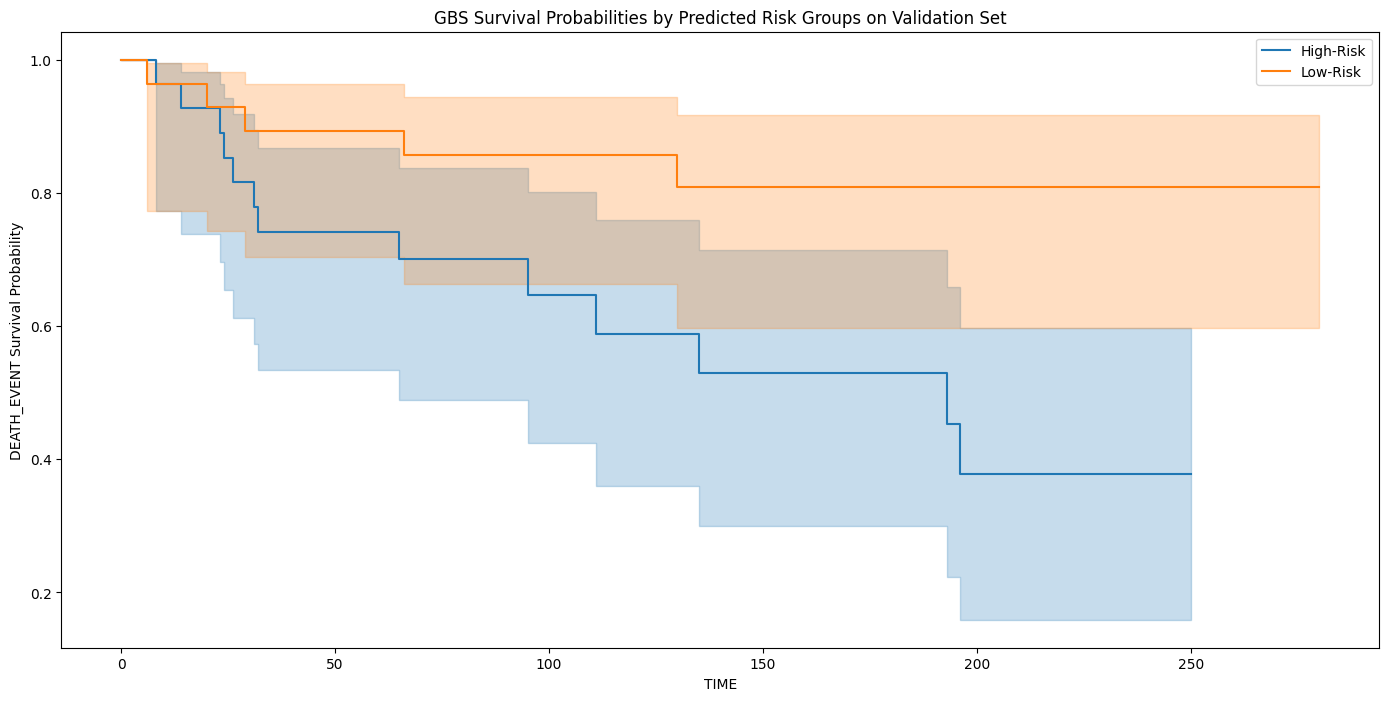

In [202]:
##################################
# Binning the predicted risks
# into dichotomous groups and
# exploring the relationships with
# survival event and duration
##################################
heart_failure_validation.reset_index(drop=True, inplace=True)
kmf = KaplanMeierFitter()
heart_failure_validation['Predicted_Risks_GBS'] = optimal_gbs_heart_failure_y_validation_pred
heart_failure_validation['Predicted_RiskGroups_GBS'] = risk_groups = pd.qcut(heart_failure_validation['Predicted_Risks_GBS'], 2, labels=['Low-Risk', 'High-Risk'])

plt.figure(figsize=(17, 8))
for group in risk_groups.unique():
    group_data = heart_failure_validation[risk_groups == group]
    kmf.fit(group_data['TIME'], event_observed=group_data['DEATH_EVENT'], label=group)
    kmf.plot_survival_function()

plt.title('GBS Survival Probabilities by Predicted Risk Groups on Validation Set')
plt.xlabel('TIME')
plt.ylabel('DEATH_EVENT Survival Probability')
plt.show()

In [203]:
##################################
# Gathering the predictor information
# for 5 test case samples
##################################
validation_case_details = X_validation.iloc[[5, 10, 15, 20, 25]]
display(validation_case_details)

,AGE,ANAEMIA,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,SERUM_CREATININE,SERUM_SODIUM
291,60.0,0,35.0,0,1.4,139.0
66,42.0,1,15.0,0,1.3,136.0
112,50.0,0,25.0,0,1.6,136.0
89,57.0,1,25.0,1,1.1,144.0
17,45.0,0,14.0,0,0.8,127.0


In [204]:
##################################
# Gathering the event and duration information
# for 5 test case samples
##################################
print(y_validation_array[[5, 10, 15, 20, 25]])

[(False, 258) ( True,  65) (False,  90) (False,  79) ( True,  14)]


In [205]:
##################################
# Gathering the risk-groups
# for 5 test case samples
##################################
print(heart_failure_validation.loc[[5, 10, 15, 20, 25]][['Predicted_RiskGroups_GBS']])

   Predicted_RiskGroups_GBS
5                  Low-Risk
10                High-Risk
15                High-Risk
20                High-Risk
25                High-Risk


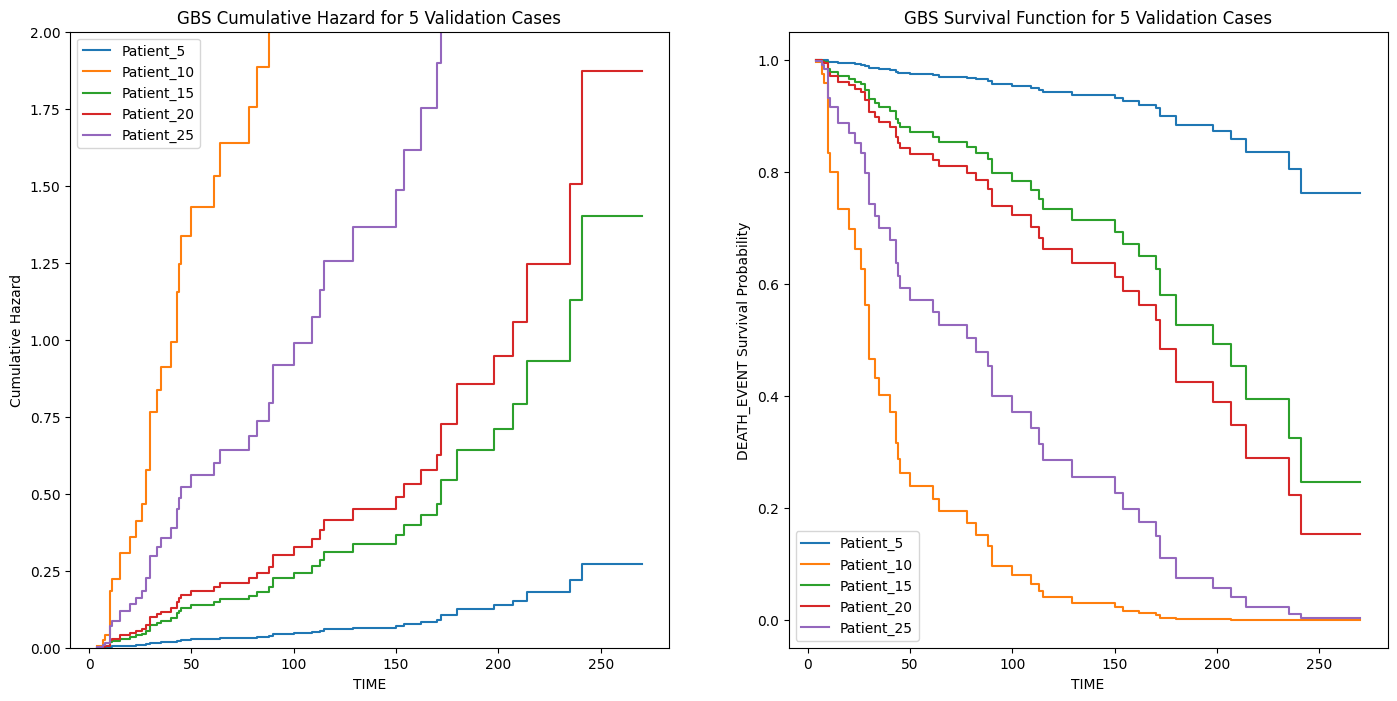

In [206]:
##################################
# Estimating the cumulative hazard
# and survival functions
# for 5 validation cases
##################################
validation_case = X_validation.iloc[[5, 10, 15, 20, 25]]
validation_case_labels = ['Patient_5','Patient_10','Patient_15','Patient_20','Patient_25',]
validation_case_cumulative_hazard_function = optimal_gbs_model.predict_cumulative_hazard_function(validation_case)
validation_case_survival_function = optimal_gbs_model.predict_survival_function(validation_case)

fig, ax = plt.subplots(1,2,figsize=(17, 8))
for hazard_prediction, survival_prediction in zip(validation_case_cumulative_hazard_function, validation_case_survival_function):
    ax[0].step(hazard_prediction.x,hazard_prediction(hazard_prediction.x),where='post')
    ax[1].step(survival_prediction.x,survival_prediction(survival_prediction.x),where='post')
ax[0].set_title('GBS Cumulative Hazard for 5 Validation Cases')
ax[0].set_xlabel('TIME')
ax[0].set_ylim(0,2)
ax[0].set_ylabel('Cumulative Hazard')
ax[0].legend(validation_case_labels, loc="upper left")
ax[1].set_title('GBS Survival Function for 5 Validation Cases')
ax[1].set_xlabel('TIME')
ax[1].set_ylabel('DEATH_EVENT Survival Probability')
ax[1].legend(validation_case_labels, loc="lower left")
plt.show()

In [207]:
##################################
# Saving the best Gradient Boosted Survival Model
# developed from the original training data
################################## 
joblib.dump(gbs_best_model_train_cv, 
            os.path.join("..", MODELS_PATH, "gbs_best_model.pkl"))

['..\\models\\gbs_best_model.pkl']

### 1.6.9 Model Selection <a class="anchor" id="1.6.9"></a>

1. The [cox proportional hazards regression model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html) was selected as the final model by demonstrating the best **concordance index** in the **validation data** with minimal overfitting between the apparent and cross-validated **train data**:
    * **train data (apparent)** = 0.7400
    * **train data (cross-validated)** = 0.7250
    * **validation data** = 0.7175
2. The optimal hyperparameters for the final model configuration was determined as follows:
    * <span style="color: #FF0000">alpha</span> = 10.00
3. The [cox net survival model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxnetSurvivalAnalysis.html) also demonstrated comparably good survival prediction, but was not selected over the [cox proportional hazards regression model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html) due to model complexity.
4. the [survival tree model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.tree.SurvivalTree.html), [random survival forest model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.RandomSurvivalForest.html), and [gradient boosted survival model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.GradientBoostingSurvivalAnalysis.html) all showed lower **concordance index** values.


In [208]:
##################################
# Gathering the concordance indices from 
# training, cross-validation and validation
##################################
set_labels = ['Train','Cross-Validation','Validation']
ci_plot = pd.DataFrame({'COXPH': list([optimal_coxph_heart_failure_y_train_ci,
                                       optimal_coxph_heart_failure_y_crossvalidation_ci,
                                       optimal_coxph_heart_failure_y_validation_ci]),
                        'COXNS': list([optimal_coxns_heart_failure_y_train_ci,
                                       optimal_coxns_heart_failure_y_crossvalidation_ci,
                                       optimal_coxns_heart_failure_y_validation_ci]),
                        'STREE': list([optimal_stree_heart_failure_y_train_ci,
                                       optimal_stree_heart_failure_y_crossvalidation_ci,
                                       optimal_stree_heart_failure_y_validation_ci]),
                        'RSF': list([optimal_rsf_heart_failure_y_train_ci,
                                     optimal_rsf_heart_failure_y_crossvalidation_ci,
                                     optimal_rsf_heart_failure_y_validation_ci]),
                        'GBS': list([optimal_gbs_heart_failure_y_train_ci,
                                     optimal_gbs_heart_failure_y_crossvalidation_ci,
                                     optimal_gbs_heart_failure_y_validation_ci])}, index = set_labels)
display(ci_plot)

,COXPH,COXNS,STREE,RSF,GBS
Train,0.740026,0.741781,0.831392,0.850622,0.944462
Cross-Validation,0.725032,0.719903,0.698970,0.725828,0.693769
Validation,0.717599,0.716235,0.654843,0.678035,0.672578


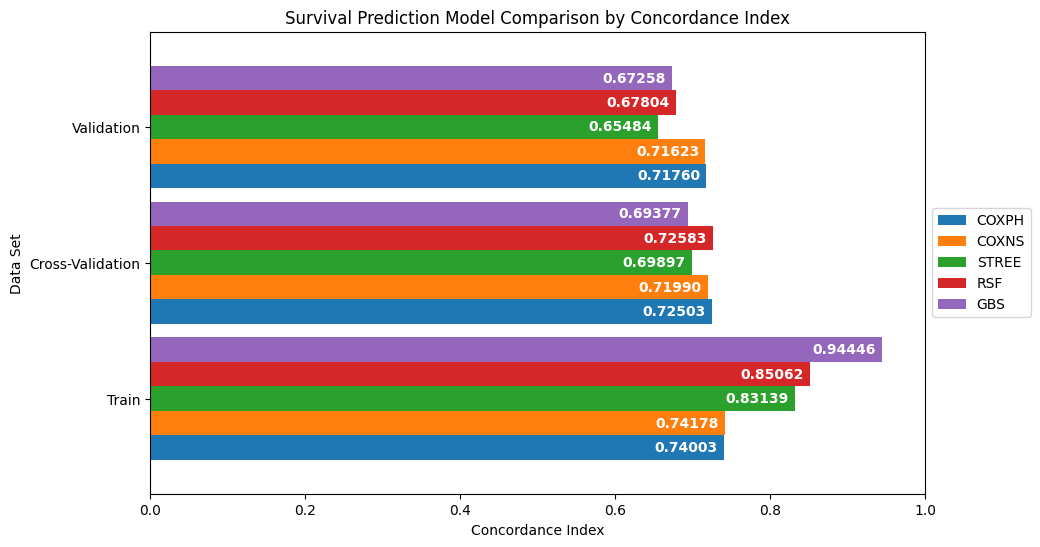

In [209]:
##################################
# Plotting all the concordance indices
# for all models
##################################
ci_plot = ci_plot.plot.barh(figsize=(10, 6), width=0.90)
ci_plot.set_xlim(0.00,1.00)
ci_plot.set_title("Survival Prediction Model Comparison by Concordance Index")
ci_plot.set_xlabel("Concordance Index")
ci_plot.set_ylabel("Data Set")
ci_plot.grid(False)
ci_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ci_plot.containers:
    ci_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

### 1.6.10 Model Testing <a class="anchor" id="1.6.10"></a>

1. The selected [cox proportional hazards regression model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html) demonstrated sufficient **concordance index** in the independent **test data** :
    * **train data (apparent)** = 0.7400
    * **train data (cross-validated)** = 0.7250
    * **validation data** = 0.7175
    * **test data** = 0.7163
2. For benchmarking purposes, all candidate models were evaluated on the **test data**. Interestingly, the [survival tree model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.tree.SurvivalTree.html), [random survival forest model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.RandomSurvivalForest.html), and [gradient boosted survival model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.ensemble.GradientBoostingSurvivalAnalysis.html) performed better than the selected model. In this case, the inconsistent performance (poor on validation, good on test) might be an indicator of instability. The [cox proportional hazards regression model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxPHSurvivalAnalysis.html) model (and to some extent, the [cox net survival model](https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.linear_model.CoxnetSurvivalAnalysis.html) model), which shows more consistent performance across validation and test sets, is more reliable. Although, the selected model may not perform as well on the test set alone, its generalization across both validation and test sets makes it a more robust and stable choice in practice.


In [210]:
##################################
# Evaluating the concordance indices
# on the test data
##################################
optimal_coxph_heart_failure_y_test_ci = concordance_index_censored(y_test_array['DEATH_EVENT'], 
                                                                   y_test_array['TIME'], 
                                                                   optimal_coxph_model.predict(X_test))[0]
optimal_coxns_heart_failure_y_test_ci = concordance_index_censored(y_test_array['DEATH_EVENT'], 
                                                                   y_test_array['TIME'], 
                                                                   optimal_coxns_model.predict(X_test))[0]
optimal_stree_heart_failure_y_test_ci = concordance_index_censored(y_test_array['DEATH_EVENT'], 
                                                                   y_test_array['TIME'], 
                                                                   optimal_stree_model.predict(X_test))[0]
optimal_rsf_heart_failure_y_test_ci = concordance_index_censored(y_test_array['DEATH_EVENT'], 
                                                                 y_test_array['TIME'], 
                                                                 optimal_rsf_model.predict(X_test))[0]
optimal_gbs_heart_failure_y_test_ci = concordance_index_censored(y_test_array['DEATH_EVENT'], 
                                                                 y_test_array['TIME'], 
                                                                 optimal_gbs_model.predict(X_test))[0]

In [211]:
##################################
# Adding the the concordance index estimated
# from the test data
##################################
set_labels = ['Train','Cross-Validation','Validation','Test']
updated_ci_plot = pd.DataFrame({'COXPH': list([optimal_coxph_heart_failure_y_train_ci,
                                               optimal_coxph_heart_failure_y_crossvalidation_ci,
                                               optimal_coxph_heart_failure_y_validation_ci,
                                               optimal_coxph_heart_failure_y_test_ci]),
                                'COXNS': list([optimal_coxns_heart_failure_y_train_ci,
                                               optimal_coxns_heart_failure_y_crossvalidation_ci,
                                               optimal_coxns_heart_failure_y_validation_ci,
                                               optimal_coxns_heart_failure_y_test_ci]),
                                'STREE': list([optimal_stree_heart_failure_y_train_ci,
                                               optimal_stree_heart_failure_y_crossvalidation_ci,
                                               optimal_stree_heart_failure_y_validation_ci,
                                               optimal_stree_heart_failure_y_test_ci]),
                                'RSF': list([optimal_rsf_heart_failure_y_train_ci,
                                             optimal_rsf_heart_failure_y_crossvalidation_ci,
                                             optimal_rsf_heart_failure_y_validation_ci,
                                             optimal_rsf_heart_failure_y_test_ci]),
                                'GBS': list([optimal_gbs_heart_failure_y_train_ci,
                                             optimal_gbs_heart_failure_y_crossvalidation_ci,
                                             optimal_gbs_heart_failure_y_validation_ci,
                                             optimal_gbs_heart_failure_y_test_ci])}, index = set_labels)
display(updated_ci_plot)

,COXPH,COXNS,STREE,RSF,GBS
Train,0.740026,0.741781,0.831392,0.850622,0.944462
Cross-Validation,0.725032,0.719903,0.698970,0.725828,0.693769
Validation,0.717599,0.716235,0.654843,0.678035,0.672578
Test,0.716302,0.722653,0.770995,0.754411,0.781228


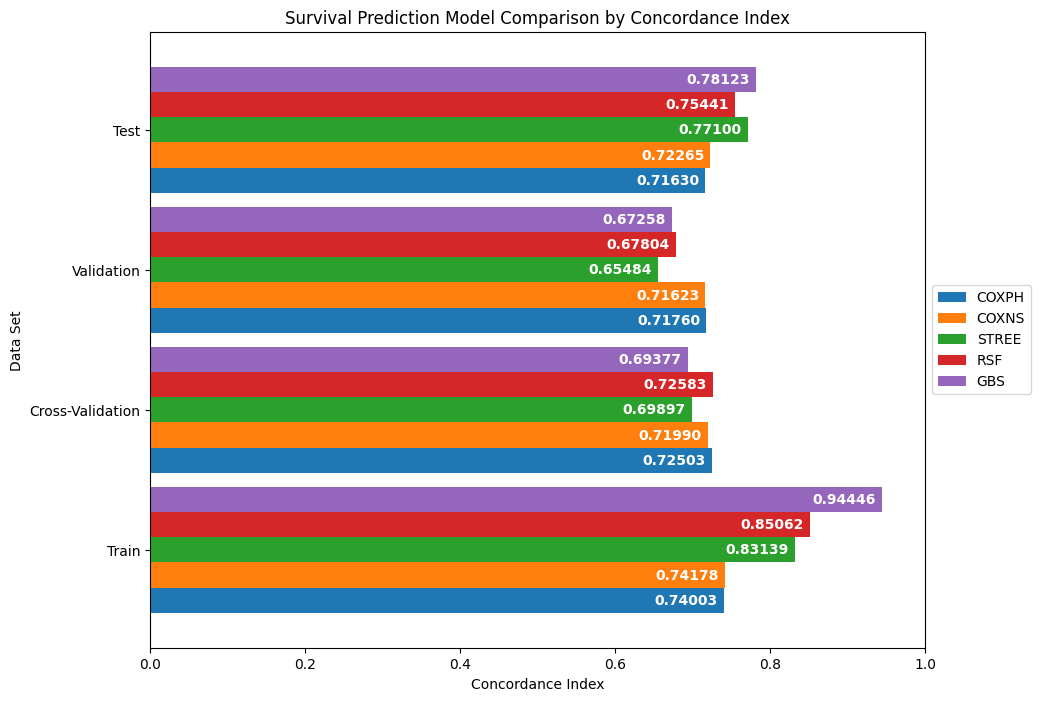

In [212]:
##################################
# Plotting all the concordance indices
# for all models
##################################
updated_ci_plot = updated_ci_plot.plot.barh(figsize=(10, 8), width=0.90)
updated_ci_plot.set_xlim(0.00,1.00)
updated_ci_plot.set_title("Survival Prediction Model Comparison by Concordance Index")
updated_ci_plot.set_xlabel("Concordance Index")
updated_ci_plot.set_ylabel("Data Set")
updated_ci_plot.grid(False)
updated_ci_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in updated_ci_plot.containers:
    updated_ci_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')

### 1.6.11 Model Inference <a class="anchor" id="1.6.11"></a>

In [213]:
##################################
# Determining the Cox Proportional Hazards Regression model
# absolute coefficient-based feature importance 
# on train data
##################################
coxph_train_feature_importance = pd.DataFrame(
    {'Signed.Coefficient': optimal_coxph_model.named_steps['coxph'].coef_,
    'Absolute.Coefficient': np.abs(optimal_coxph_model.named_steps['coxph'].coef_)}, index=X_train.columns)
display(coxph_train_feature_importance.sort_values('Absolute.Coefficient', ascending=False))

,Signed.Coefficient,Absolute.Coefficient
SERUM_CREATININE,0.421816,0.421816
EJECTION_FRACTION,-0.319527,0.319527
SERUM_SODIUM,-0.280366,0.280366
ANAEMIA,0.265085,0.265085
AGE,0.240829,0.240829
HIGH_BLOOD_PRESSURE,0.175722,0.175722


In [214]:
##################################
# Determining the Cox Proportional Hazards Regression model
# permutation-based feature importance 
# on train data
##################################
coxph_train_feature_importance = permutation_importance(optimal_coxph_model,
                                                        X_train, 
                                                        y_train_array, 
                                                        n_repeats=15, 
                                                        random_state=88888888)

coxph_train_feature_importance_summary = pd.DataFrame(
    {k: coxph_train_feature_importance[k]
     for k in ("importances_mean", "importances_std")}, 
    index=X_train.columns).sort_values(by="importances_mean", ascending=False)
coxph_train_feature_importance_summary.columns = ['Importances.Mean', 'Importances.Std']
display(coxph_train_feature_importance_summary)

,Importances.Mean,Importances.Std
SERUM_CREATININE,0.050404,0.016938
EJECTION_FRACTION,0.026460,0.014508
ANAEMIA,0.022162,0.013402
SERUM_SODIUM,0.018215,0.011994
AGE,0.011868,0.008926
HIGH_BLOOD_PRESSURE,0.003085,0.006483


In [215]:
##################################
# Rebuilding the training data
# for plotting kaplan-meier charts
##################################
X_train_indices = X_train.index.tolist()
heart_failure_MI = heart_failure_EDA.copy()
heart_failure_MI = heart_failure_MI.drop(['DIABETES','SEX', 'SMOKING', 'CREATININE_PHOSPHOKINASE','PLATELETS'], axis=1)
heart_failure_MI = heart_failure_MI.loc[X_train_indices]
heart_failure_MI.head()

,AGE,EJECTION_FRACTION,SERUM_CREATININE,SERUM_SODIUM,ANAEMIA,HIGH_BLOOD_PRESSURE,DEATH_EVENT,TIME
266,-0.423454,-1.773346,1.144260,-0.689301,Absent,Absent,True,241.0
180,-2.043070,-0.633046,-0.732811,-0.244181,Absent,Absent,False,148.0
288,0.434332,-0.160461,-0.087641,1.348555,Absent,Absent,False,256.0
258,-1.446547,-1.163741,-1.149080,-0.471658,Present,Absent,False,230.0
236,1.173233,1.021735,-0.087641,3.397822,Absent,Present,False,209.0


In [216]:
##################################
# Determining the medians for the numeric predictors
##################################
heart_failure_MI_numeric = heart_failure_MI[["AGE","EJECTION_FRACTION","SERUM_CREATININE","SERUM_SODIUM"]]
numeric_predictor_median_list = heart_failure_MI_numeric.median()
numeric_predictor_median_list

AGE                  0.065124
EJECTION_FRACTION    0.100914
SERUM_CREATININE    -0.087641
SERUM_SODIUM        -0.006503
dtype: float64

In [217]:
##################################
# Creating a function to bin
# numeric predictors into two groups
##################################
def bin_numeric_model_predictor(df, predictor):
    median = numeric_predictor_median_list.loc[predictor]
    df[predictor] = np.where(df[predictor] <= median, "Low", "High")
    return df

In [218]:
##################################
# Binning the numeric predictors
# into two groups
##################################
for numeric_column in ["AGE","EJECTION_FRACTION","SERUM_CREATININE","SERUM_SODIUM"]:
    heart_failure_MI = bin_numeric_model_predictor(heart_failure_MI, numeric_column)

In [219]:
##################################
# Exploring the transformed
# dataset for plotting
##################################
heart_failure_MI.head()

,AGE,EJECTION_FRACTION,SERUM_CREATININE,SERUM_SODIUM,ANAEMIA,HIGH_BLOOD_PRESSURE,DEATH_EVENT,TIME
266,Low,Low,High,Low,Absent,Absent,True,241.0
180,Low,Low,Low,Low,Absent,Absent,False,148.0
288,High,Low,Low,High,Absent,Absent,False,256.0
258,Low,Low,Low,Low,Present,Absent,False,230.0
236,High,High,Low,High,Absent,Present,False,209.0


In [220]:
##################################
# Defining a function to plot the
# estimated survival profiles
# using Kaplan-Meier Plots
##################################
def plot_kaplan_meier(df, cat_var, ax, new_case_value=None):
    kmf = KaplanMeierFitter()

    # Defining the color scheme for each category
    if cat_var in ['AGE', 'EJECTION_FRACTION', 'SERUM_CREATININE', 'SERUM_SODIUM']:
        categories = ['Low', 'High']
        colors = {'Low': 'blue', 'High': 'red'}
    else:
        categories = ['Absent', 'Present']
        colors = {'Absent': 'blue', 'Present': 'red'}

    # Plotting each category with a thin line and transparency
    for value in categories:
        mask = df[cat_var] == value
        kmf.fit(df['TIME'][mask], event_observed=df['DEATH_EVENT'][mask], label=f'{cat_var}={value} (Baseline Distribution)')
        kmf.plot_survival_function(ax=ax, ci_show=False, color=colors[str(value)], linestyle='-', linewidth=5.0, alpha=0.30)

    # Overlaying a thicker broken line for the new case if provided
    if new_case_value is not None:
        mask_new_case = df[cat_var] == new_case_value
        kmf.fit(df['TIME'][mask_new_case], event_observed=df['DEATH_EVENT'][mask_new_case], label=f'{cat_var}={value} (Test Case)')
        kmf.plot_survival_function(ax=ax, ci_show=False, color='black', linestyle=':', linewidth=4.0)


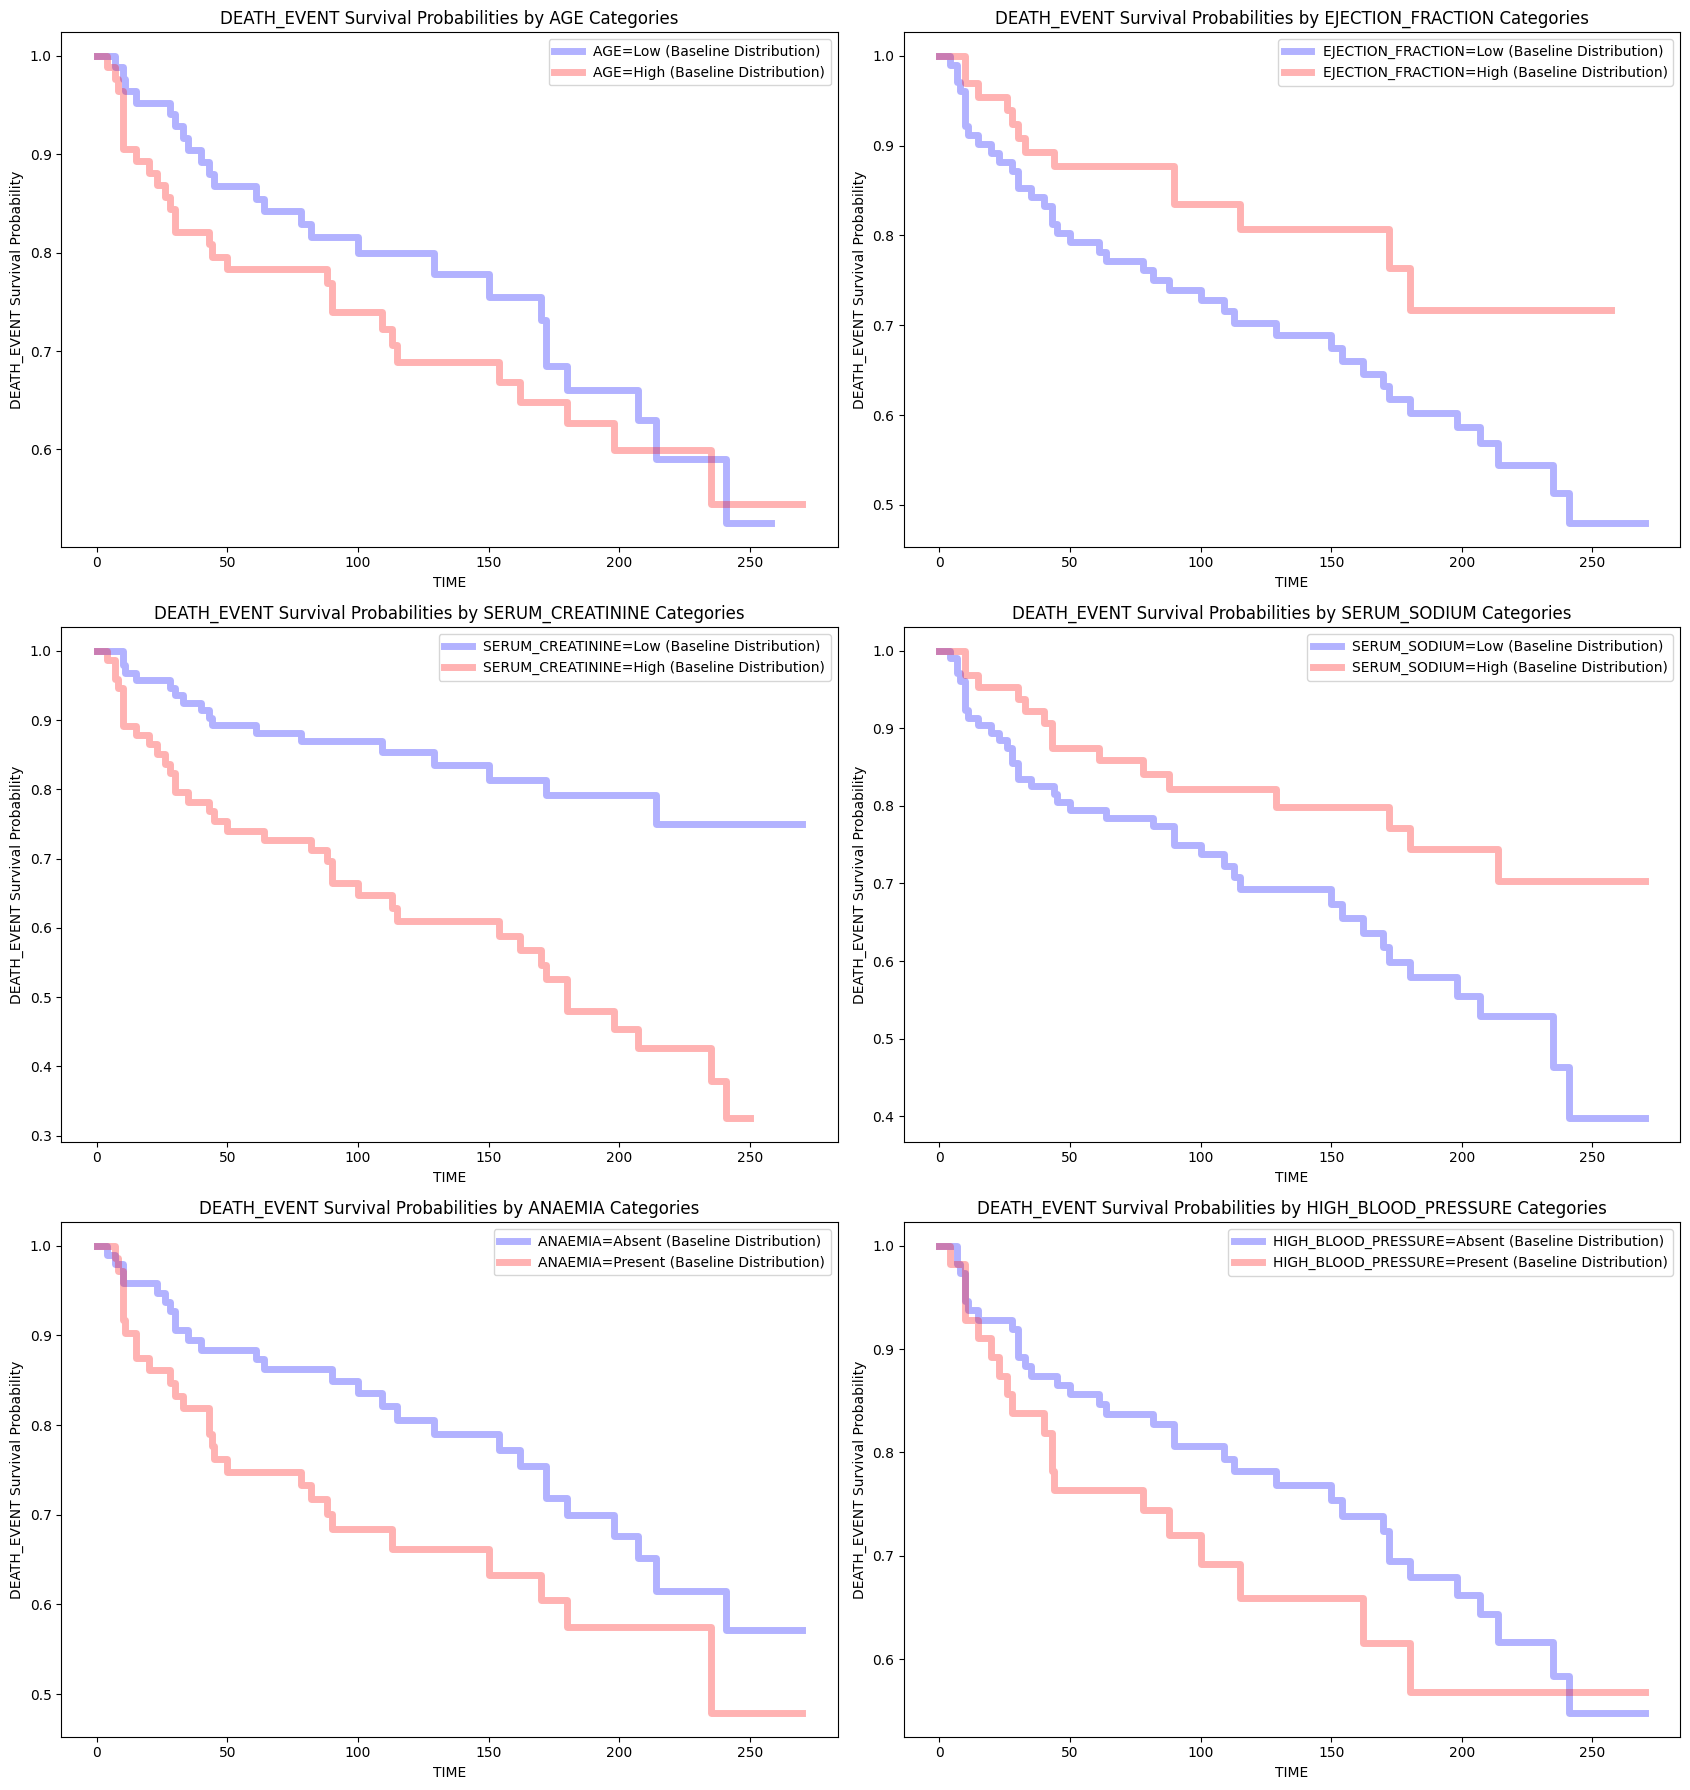

In [221]:
##################################
# Plotting the estimated survival profiles
# of the model training data
# using Kaplan-Meier Plots
##################################
fig, axes = plt.subplots(3, 2, figsize=(17, 18))

heart_failure_predictors = ['AGE','EJECTION_FRACTION','SERUM_CREATININE','SERUM_SODIUM','ANAEMIA','HIGH_BLOOD_PRESSURE']

for i, predictor in enumerate(heart_failure_predictors):
    ax = axes[i // 2, i % 2]
    plot_kaplan_meier(heart_failure_MI, predictor, ax, new_case_value=None)
    ax.set_title(f'DEATH_EVENT Survival Probabilities by {predictor} Categories')
    ax.set_xlabel('TIME')
    ax.set_ylabel('DEATH_EVENT Survival Probability')
plt.tight_layout()
plt.show()

In [222]:
##################################
# Describing the details of the 
# test case for evaluation
##################################
X_sample = {'AGE': 'High',   
            'EJECTION_FRACTION': 'Low',
            'SERUM_CREATININE': 'High', 
            'SERUM_SODIUM': 'Low', 
            'ANAEMIA': 'Present', 
            'HIGH_BLOOD_PRESSURE': 'Absent'}
X_test_sample = pd.DataFrame([X_sample])
X_test_sample.head()


,AGE,EJECTION_FRACTION,SERUM_CREATININE,SERUM_SODIUM,ANAEMIA,HIGH_BLOOD_PRESSURE
0,High,Low,High,Low,Present,Absent


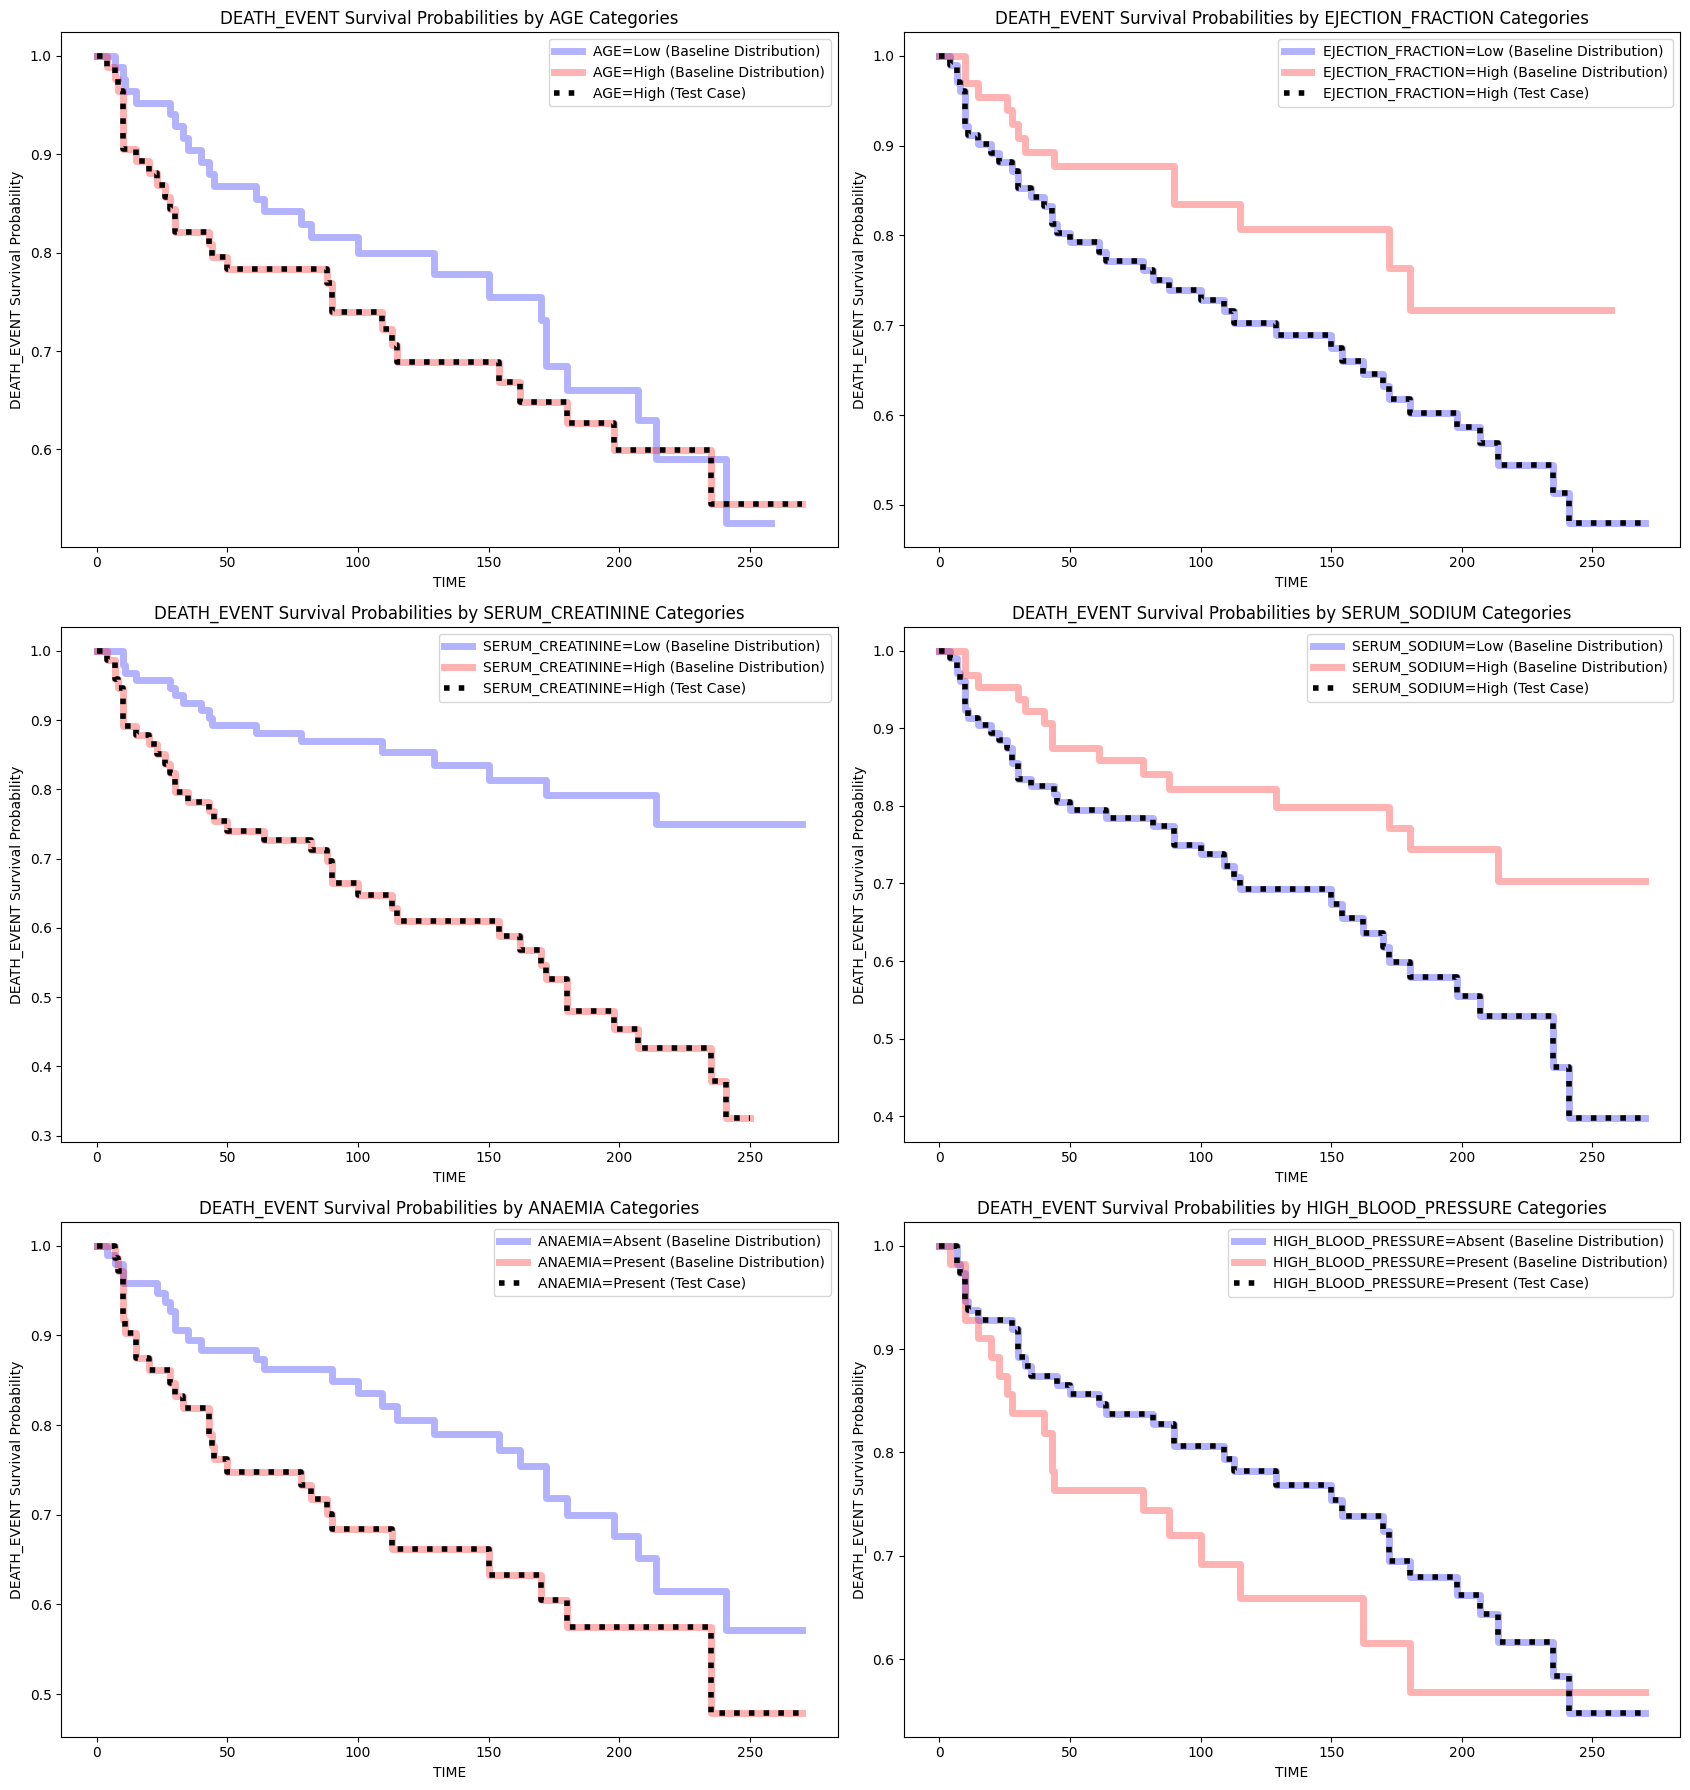

In [223]:
##################################
# Plotting the estimated survival profiles
# of the test case
# using Kaplan-Meier Plots
##################################
fig, axes = plt.subplots(3, 2, figsize=(17, 18))

heart_failure_predictors = ['AGE','EJECTION_FRACTION','SERUM_CREATININE','SERUM_SODIUM','ANAEMIA','HIGH_BLOOD_PRESSURE']

for i, predictor in enumerate(heart_failure_predictors):
    ax = axes[i // 2, i % 2]
    plot_kaplan_meier(heart_failure_MI, predictor, ax, new_case_value=X_sample[predictor])
    ax.set_title(f'DEATH_EVENT Survival Probabilities by {predictor} Categories')
    ax.set_xlabel('TIME')
    ax.set_ylabel('DEATH_EVENT Survival Probability')
plt.tight_layout()
plt.show()

## 1.7. Predictive Model Deployment Using Streamlit and Streamlit Community Cloud <a class="anchor" id="1.7"></a>

### 1.7.1 Model Prediction Application Code Development <a class="anchor" id="1.7.1"></a>

### 1.7.2 Model Application Programming Interface Code Development <a class="anchor" id="1.7.2"></a>

### 1.7.3 User Interface Application Code Development <a class="anchor" id="1.7.3"></a>

### 1.7.4 Web Application <a class="anchor" id="1.7.4"></a>

# 2. Summary <a class="anchor" id="Summary"></a>

# 3. References <a class="anchor" id="References"></a>


* **[Book]** [Clinical Prediction Models](http://clinicalpredictionmodels.org/) by Ewout Steyerberg
* **[Book]** [Survival Analysis: A Self-Learning Text](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) by David Kleinbaum and Mitchel Klein
* **[Book]** [Applied Survival Analysis Using R](https://link.springer.com/book/10.1007/978-3-319-31245-3/) by Dirk Moore
* **[Book]** [Survival Analysis with Python](https://www.taylorfrancis.com/books/mono/10.1201/9781003255499/survival-analysis-python-avishek-nag) by Avishek Nag
* **[Python Library API]** [SciKit-Survival](https://pypi.org/project/scikit-survival/) by SciKit-Survival Team
* **[Python Library API]** [SciKit-Learn](https://scikit-learn.org/stable/index.html) by SciKit-Learn Team
* **[Python Library API]** [StatsModels](https://www.statsmodels.org/stable/index.html) by StatsModels Team
* **[Python Library API]** [SciPy](https://scipy.org/) by SciPy Team
* **[Python Library API]** [Lifelines](https://lifelines.readthedocs.io/en/latest/) by Lifelines Team
* **[Kaggle Project]** [Applied Reliability, Solutions To Problems](https://www.kaggle.com/code/keenanzhuo/applied-reliability-solutions-to-problems) by Keenan Zhuo (Kaggle)
* **[Kaggle Project]** [Survival Models VS ML Models Benchmark - Churn Tel](https://www.kaggle.com/code/caralosal/survival-models-vs-ml-models-benchmark-churn-tel) by Carlos Alonso Salcedo (Kaggle)
* **[Kaggle Project]** [Survival Analysis with Cox Model Implementation](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Bryan Boulé (Kaggle)
* **[Kaggle Project]** [Survival Analysis](https://www.kaggle.com/code/gunesevitan/survival-analysis/notebook) by Gunes Evitan (Kaggle)
* **[Kaggle Project]** [Survival Analysis of Lung Cancer Patients](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Sayan Chakraborty (Kaggle)
* **[Kaggle Project]** [COVID-19 Cox Survival Regression](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Ilias Katsabalos (Kaggle)
* **[Kaggle Project]** [Liver Cirrhosis Prediction with XGboost & EDA](https://www.kaggle.com/code/arjunbhaybhang/liver-cirrhosis-prediction-with-xgboost-eda) by Arjun Bhaybang (Kaggle)
* **[Article]** [Exploring Time-to-Event with Survival Analysis](https://towardsdatascience.com/exploring-time-to-event-with-survival-analysis-8b0a7a33a7be) by Olivia Tanuwidjaja (Towards Data Science)
* **[Article]** [The Complete Introduction to Survival Analysis in Python](https://towardsdatascience.com/the-complete-introduction-to-survival-analysis-in-python-7523e17737e6) by Marco Peixeiro (Towards Data Science)
* **[Article]** [Survival Analysis Simplified: Explaining and Applying with Python](https://medium.com/@zynp.atlii/survival-analysis-simplified-explaining-and-applying-with-python-7efacf86ba32) by Zeynep Atli (Towards Data Science)
* **[Article]** [Survival Analysis in Python (KM Estimate, Cox-PH and AFT Model)](https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d) by Rahul Raoniar (Medium)
* **[Article]** [How to Evaluate Survival Analysis Models)](https://towardsdatascience.com/how-to-evaluate-survival-analysis-models-dd67bc10caae) by Nicolo Cosimo Albanese (Towards Data Science)
* **[Article]** [Survival Analysis with Python Tutorial — How, What, When, and Why)](https://pub.towardsai.net/survival-analysis-with-python-tutorial-how-what-when-and-why-19a5cfb3c312) by Towards AI Team (Medium)
* **[Article]** [Survival Analysis: Predict Time-To-Event With Machine Learning)](https://towardsdatascience.com/survival-analysis-predict-time-to-event-with-machine-learning-part-i-ba52f9ab9a46) by Lina Faik (Medium)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 1](https://www.kdnuggets.com/2020/07/complete-guide-survival-analysis-python-part1.html) by Pratik Shukla (KDNuggets)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 2](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-2.html) by Pratik Shukla (KDNuggets)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 3](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html) by Pratik Shukla (KDNuggets)
* **[Article]** [Model Explainability using SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations)](https://medium.com/@anshulgoel991/model-exploitability-using-shap-shapley-additive-explanations-and-lime-local-interpretable-cb4f5594fc1a) by Anshul Goel (Medium)
* **[Article]** [A Comprehensive Guide into SHAP (SHapley Additive exPlanations) Values](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html) by Brain John Aboze (DeepChecks.Com)
* **[Article]** [SHAP - Understanding How This Method for Explainable AI Works](https://safjan.com/how-the-shap-method-for-explainable-ai-works/#google_vignette) by Krystian Safjan (Safjan.Com)
* **[Article]** [SHAP: Shapley Additive Explanations](https://towardsdatascience.com/shap-shapley-additive-explanations-5a2a271ed9c3) by Fernando Lopez (Medium)
* **[Article]** [Explainable Machine Learning, Game Theory, and Shapley Values: A technical review](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html) by Soufiane Fadel (Statistics Canada)
* **[Article]** [SHAP Values Explained Exactly How You Wished Someone Explained to You](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30) by Samuele Mazzanti (Towards Data Science)
* **[Article]** [Explaining Machine Learning Models: A Non-Technical Guide to Interpreting SHAP Analyses](https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/) by Aidan Cooper (AidanCooper.Co.UK)
* **[Article]** [Shapley Additive Explanations: Unveiling the Black Box of Machine Learning](https://python.plainenglish.io/shapley-additive-explanations-unveiling-the-black-box-of-machine-learning-477ba01ffa07) by Evertone Gomede (Medium)
* **[Article]** [SHAP (SHapley Additive exPlanations)](https://www.nerd-data.com/shap/) by Narut Soontranon (Nerd-Data.Com)
* **[Article]** [Survival Analysis](https://quantdev.ssri.psu.edu/resources/survival-analysis) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Part 1: How to Format Data for Several Types of Survival Analysis Models](https://quantdev.ssri.psu.edu/tutorials/part-1-how-format-data-several-types-survival-analysis-models) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Part 2: Single-Episode Cox Regression Model with Time-Invariant Predictors](https://quantdev.ssri.psu.edu/tutorials/part-2-single-episode-cox-regression-model-time-invariant-predictors) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Part 3: Single-Episode Cox Regression Model with Time-Varying Predictors](https://quantdev.ssri.psu.edu/tutorials/part-3-single-episode-cox-regression-model-time-varying-predictors) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Part 4: Recurring-Episode Cox Regression Model with Time-Invariant Predictors](https://quantdev.ssri.psu.edu/tutorials/part-4-recurring-episode-cox-regression-model-time-invariant-predictors) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Part 5: Recurring-Episode Cox Regression Model with Time-Varying Predictors](https://quantdev.ssri.psu.edu/tutorials/part-5-recurring-episode-cox-regression-model-time-varying-predictors) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Parametric Survival Modeling](https://devinincerti.com/2019/06/18/parametric_survival.html) by Devin Incerti (DevinIncerti.Com)
* **[Article]** [Survival Analysis Simplified: Explaining and Applying with Python](https://medium.com/@zynp.atlii/survival-analysis-simplified-explaining-and-applying-with-python-7efacf86ba32) by Zeynep Atli (Medium)
* **[Article]** [Understanding Survival Analysis Models: Bridging the Gap between Parametric and Semiparametric Approaches](https://medium.com/@zynp.atlii/understanding-survival-analysis-models-bridging-the-gap-between-parametric-and-semiparametric-923cdcfc9f05) by Zeynep Atli (Medium)
* **[Article]** [Survival Modeling — Accelerated Failure Time — XGBoost](https://towardsdatascience.com/survival-modeling-accelerated-failure-time-xgboost-971aaa1ba794) by Avinash Barnwal (Medium)
* **[Publication]** [Regression Models and Life Tables](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) by David Cox (Royal Statistical Society)
* **[Publication]** [Covariance Analysis of Censored Survival Data](https://pubmed.ncbi.nlm.nih.gov/4813387/) by Norman Breslow (Biometrics)
* **[Publication]** [The Efficiency of Cox’s Likelihood Function for Censored Data](https://www.jstor.org/stable/2286217) by Bradley Efron (Journal of the American Statistical Association)
* **[Publication]** [Regularization Paths for Cox’s Proportional Hazards Model via Coordinate Descent](https://doi.org/10.18637/jss.v039.i05) by Noah Simon, Jerome Friedman, Trevor Hastie and Rob Tibshirani (Journal of Statistical Software)
* **[Publication]** [Shapley Additive Explanations](https://dl.acm.org/doi/10.5555/1756006.1756007) by Noah Simon, Jerome Friedman, Trevor Hastie and Rob Tibshirani (Journal of Statistical Software) by Erik Strumbelj and Igor Kononenko (The Journal of Machine Learning Research)
* **[Publication]** [A Unified Approach to Interpreting Model Predictions](https://proceedings.neurips.cc/paper_files/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf) by Scott Lundberg and Sun-In Lee (Conference on Neural Information Processing Systems)
* **[Publication]** [Survival Analysis Part I: Basic Concepts and First Analyses](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394262/) by Taane Clark (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part II: Multivariate Data Analysis – An Introduction to Concepts and Methods](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394368/) by Mike Bradburn (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part III: Multivariate Data Analysis – Choosing a Model and Assessing its Adequacy and Fit](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2376927/) by Mike Bradburn (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part IV: Further Concepts and Methods in Survival Analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394469/) by Taane Clark (British Journal of Cancer)
* **[Publication]** [Marginal Likelihoods Based on Cox's Regression and Life Model](https://www.jstor.org/stable/2334538) by Jack Kalbfleisch and Ross Prentice (Biometrika)
* **[Publication]** [Hazard Rate Models with Covariates](https://www.jstor.org/stable/2529934) by Jack Kalbfleisch and Ross Prentice (Biometrics)
* **[Publication]** [Linear Regression with Censored Data](https://www.jstor.org/stable/2335161) by Jonathan Buckley and Ian James (Biometrika)
* **[Publication]** [A Statistical Distribution Function of Wide Applicability](https://www.semanticscholar.org/paper/A-Statistical-Distribution-Function-of-Wide-Weibull/88c37770028e7ed61180a34d6a837a9a4db3b264) by Waloddi Weibull (Journal of Applied Mechanics)
* **[Publication]** [Exponential Survivals with Censoring and Explanatory Variables](https://www.jstor.org/stable/2334539) by Ross Prentice (Biometrika)
* **[Publication]** [The Lognormal Distribution, with Special Reference to its Uses in Economics](https://www.semanticscholar.org/paper/The-Lognormal-Distribution%2C-with-Special-Reference-Corlett-Aitchison/1f59c53ff512fa77e7aee5e6d98b1786c2aaf129) by John Aitchison and James Brown (Economics Applied Statistics)
* **[Course]** [Survival Analysis in Python](https://app.datacamp.com/learn/courses/survival-analysis-in-python) by Shae Wang (DataCamp)

In [224]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))